# Agricultural Production KPI Analytics System

## Project Overview
This notebook contains comprehensive analysis of 40+ Key Performance Indicators (KPIs) for agricultural production optimization. The project was developed during an internship at Data Coffee GmbH (June 2025 - September 2025) as part of a signal processing and time series analysis specialization program.

## Objectives
- Analyze production efficiency metrics
- Develop automated KPI calculation framework
- Provide insights for management decision-making
- Create scalable data pipeline for real-time monitoring

## Key Technologies
- **Python**: Pandas, NumPy, Matplotlib, Seaborn
- **Database**: SQL/SQLite for data processing
- **Statistical Analysis**: Time series analysis, signal processing
- **Visualization**: Interactive dashboards and charts

## Data Security Note
All company-specific information and identifiers have been anonymized. This notebook serves as a demonstration of analytical capabilities and methodological approaches.

In [ ]:
import pandas as pd

# CSV-read - Agricultural production weight sensor data
file_path = "/content/weight_sensor_agricultural_data.csv"
df = pd.read_csv(file_path)

#
df.head(10)


,"unix timestamp;""timestamp"";""message"";""message_weight"";""message_unit"""
0,1756822759373;2025-09-02 14:19:19:0373;- 0.5...
1,1756822759375;2025-09-02 14:19:19:0375;- 0.5...
2,1756822759375;2025-09-02 14:19:19:0375;- 0.5...
3,1756822759376;2025-09-02 14:19:19:0376;- 0.5...
4,1756822759376;2025-09-02 14:19:19:0376;- 0.5...
5,1756822759377;2025-09-02 14:19:19:0377;- 0.5...
6,1756822759377;2025-09-02 14:19:19:0377;- 0.5...
7,1756822759377;2025-09-02 14:19:19:0377;- 0.5...
8,1756822759378;2025-09-02 14:19:19:0378;- 0.5...
9,1756822759378;2025-09-02 14:19:19:0378;- 0.5...


In [ ]:
import pandas as pd
import numpy as np

# 1. Load CSV file - Agricultural sensor data
file_path = "/content/weight_sensor_agricultural_data.csv"
raw_df = pd.read_csv(file_path)

# 2. Split the single column into multiple columns
df = raw_df.iloc[:, 0].str.split(";", expand=True)
df.columns = ["unix timestamp", "timestamp", "message", "message_weight", "message_unit"]

# 3. Show first 5 rows
df.head()

,unix timestamp,timestamp,message,message_weight,message_unit
0,1756822759373,2025-09-02 14:19:19:0373,- 0.55 kg N,-0.55,kg
1,1756822759375,2025-09-02 14:19:19:0375,- 0.55 kg N,-0.55,kg
2,1756822759375,2025-09-02 14:19:19:0375,- 0.55 kg N,-0.55,kg
3,1756822759376,2025-09-02 14:19:19:0376,- 0.55 kg N,-0.55,kg
4,1756822759376,2025-09-02 14:19:19:0376,- 0.55 kg N,-0.55,kg


In [ ]:
df['message_unit'].value_counts()

,count
message_unit,
kg,155262


In [ ]:
#rename some columns and leave only unix_timestam, timestamp and message_weight
#Delete 'message' column first
df = df.drop(columns=['message', 'message_unit'])
df = df.rename(columns={'unix timestamp': 'unix_timestamp'})
df = df[['unix_timestamp', 'timestamp', 'message_weight']]
df.head()

,unix_timestamp,timestamp,message_weight
0,1756822759373,2025-09-02 14:19:19:0373,-0.55
1,1756822759375,2025-09-02 14:19:19:0375,-0.55
2,1756822759375,2025-09-02 14:19:19:0375,-0.55
3,1756822759376,2025-09-02 14:19:19:0376,-0.55
4,1756822759376,2025-09-02 14:19:19:0376,-0.55


In [ ]:
#Discriptibe stat
df.describe()


,unix_timestamp,timestamp,message_weight
count,155262,155262,155262
unique,88944,88944,533
top,1756827675326,2025-09-02 15:41:15:0326,-0.55
freq,5,5,89212


In [ ]:
# 3. Clean and convert data types
df["unix_timestamp"] = pd.to_numeric(df["unix_timestamp"], errors='coerce')
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S:%f", errors='coerce')

# convert kg in the 'message_weight' column into gramm
# The column 'message_weight' contains string values like '-0.55'.
# We need to convert it to numeric before multiplying by 1000.
df["weight_g"] = pd.to_numeric(df["message_weight"], errors='coerce') * 1000

# Drop unnecessary columns
df.drop(columns=["message_weight"], inplace=True)

# Show first 5 rows
df.head()

,unix_timestamp,timestamp,weight_g
0,1756822759373,2025-09-02 14:19:19.037300,-550.0
1,1756822759375,2025-09-02 14:19:19.037500,-550.0
2,1756822759375,2025-09-02 14:19:19.037500,-550.0
3,1756822759376,2025-09-02 14:19:19.037600,-550.0
4,1756822759376,2025-09-02 14:19:19.037600,-550.0


In [ ]:
# 4. Calculate weight differences to find new cabbages
df["weight_diff"] = df["weight_g"].diff()
WEIGHT_MIN_THRESHOLD = 100  # minimum cabbage weight in grams
df["is_new_cabbage"] = (df["weight_diff"] > 10) & (df["weight_g"] > WEIGHT_MIN_THRESHOLD)
# Show first 5 rows
print(df["weight_diff"].value_counts())
print(df["is_new_cabbage"].value_counts())

weight_diff
 0.0        144142
-50.0         1203
 50.0         1139
 100.0         554
-100.0         480
             ...  
-16850.0         1
 12300.0         1
 11400.0         1
-11750.0         1
-7400.0          1
Name: count, Length: 477, dtype: int64
is_new_cabbage
False    149762
True       5500
Name: count, dtype: int64


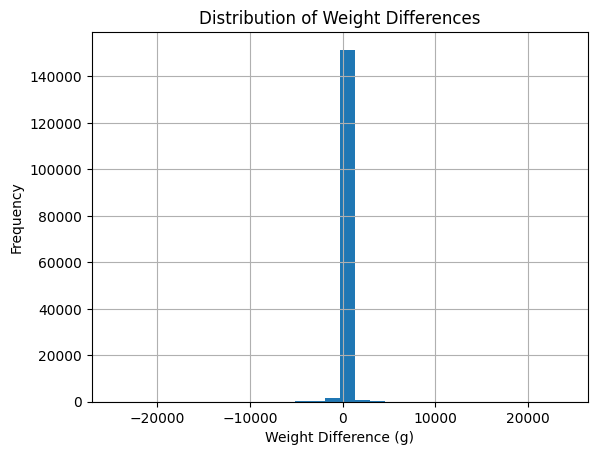

In [ ]:
import matplotlib.pyplot as plt
df["weight_diff"].hist(bins=30)
plt.xlabel("Weight Difference (g)")
plt.ylabel("Frequency")
plt.title("Distribution of Weight Differences")
plt.show()


Erstelle Diagramm: Gewichtsverlauf über die Zeit...


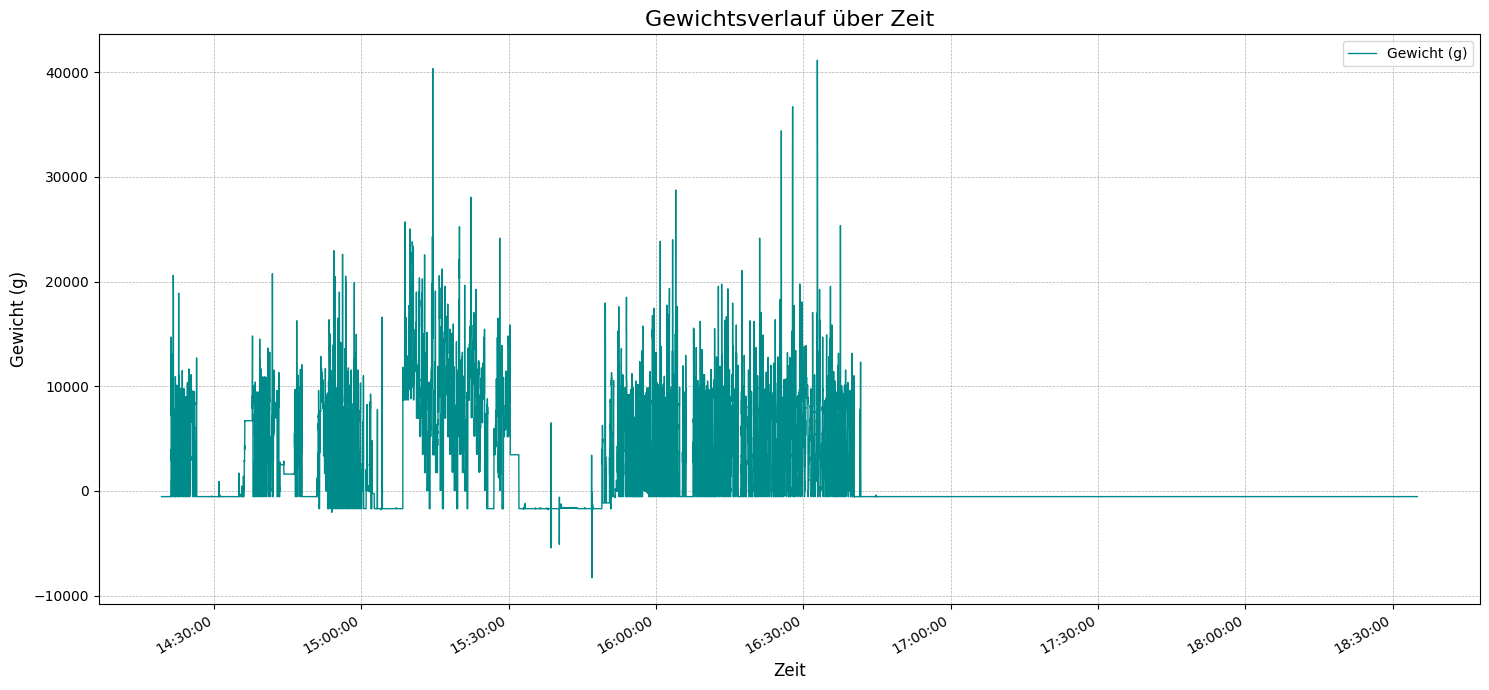

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ------------------------------------------------------------------
# 1. CSV-Datei einlesen und Daten bereinigen
# ------------------------------------------------------------------
# Der Dateipfad für Ihre Sensor-Daten
file_path = "/content/weight_sensor_agricultural_data.csv"

try:
    # Einlesen der CSV-Datei
    raw_df = pd.read_csv(file_path, header=None)

    # Aufteilen der ersten Spalte am Semikolon-Trenner
    df = raw_df.iloc[:, 0].str.split(";", expand=True)

    # Zuweisen von Spaltennamen, um Fehler zu vermeiden
    # Wir nehmen an, es gibt 5 Spalten nach dem Splitten
    df.columns = ["unix_timestamp_str", "timestamp_str", "message", "message_weight", "message_unit"]

    # ------------------------------------------------------------------
    # 2. Datenkonvertierung
    # ------------------------------------------------------------------
    # Umwandlung des Zeitstempels in ein lesbares Datumsformat
    # Fehler werden als NaT (Not a Time) behandelt
    df["timestamp"] = pd.to_datetime(df["timestamp_str"], format="%Y-%m-%d %H:%M:%S:%f", errors='coerce')

    # Umwandlung des Gewichts in einen numerischen Wert und dann in Gramm
    # Fehler werden als NaN (Not a Number) behandelt
    df["weight_g"] = pd.to_numeric(df["message_weight"], errors='coerce') * 1000

    # Entfernen von Zeilen, bei denen die Konvertierung fehlgeschlagen ist
    df.dropna(subset=['timestamp', 'weight_g'], inplace=True)

    # ------------------------------------------------------------------
    # 3. Visualisierung: Gewicht über die Zeit
    # ------------------------------------------------------------------
    print("Erstelle Diagramm: Gewichtsverlauf über die Zeit...")

    plt.figure(figsize=(15, 7))
    plt.plot(df["timestamp"], df["weight_g"], label="Gewicht (g)", color='darkcyan', linewidth=1)

    # Achsen und Titel formatieren
    plt.xlabel("Zeit", fontsize=12)
    plt.ylabel("Gewicht (g)", fontsize=12)
    plt.title("Gewichtsverlauf über Zeit", fontsize=16)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # X-Achse (Zeitachse) für bessere Lesbarkeit formatieren
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()  # Rotiert die Datums-Labels automatisch

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"FEHLER: Die Datei wurde nicht unter dem Pfad gefunden: {file_path}")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")



In [ ]:
import pandas as pd

#  KPIs
base_kpis = [
    ("Befüllzeit eines Containers", "Sekunden / Minuten", "Zeitstempel, Gewicht"),
    ("Abweichung vom Zielgewicht", "Gramm", "Zielgewicht, Endgewicht"),
    ("Anzahl befüllter Container pro Schicht", "Anzahl", "Container-Resets"),
    ("Anzahl Einheiten pro Container", "Anzahl", "Kohl-Erkennungen pro Container"),
    ("Durchschnittliches Stückgewicht im Container", "Gramm", "Containergewicht / Anzahl Einheiten"),
    ("Zeitabstand zwischen den Einheiten im Container", "Sekunden", "Abstände der Gewichtsspitzen"),
    ("Zeit zwischen Containerbefüllungen", "Minuten", "Zeitdifferenz zwischen Container-Resets"),
    ("Durchschnittlicher Leerlauf pro Schicht", "Minuten", "Durchschnitt aller Leerlaufzeiten"),
    ("Minimales Stückgewicht im Container", "Gramm", "Minimum Gewicht in Container"),
    ("Maximales Stückgewicht im Container", "Gramm", "Maximum Gewicht in Container"),
    ("Durchschnittliches Stückgewicht im Container", "Gramm", "Durchschnitt aller Einheiten"),
    ("Gesamtanzahl der Einheiten pro Schicht", "Anzahl", "Gesamte Einheitenanzahl"),
    ("Gesamtanzahl der Container pro Schicht", "Anzahl", "Containeranzahl"),
    ("Gesamtgewicht der produzierten Ware pro Schicht", "Kilogramm", "Summe aller Gewichte"),
    ("Produktivität pro Einheit", "Einheiten/Stunde", "Einheitenanzahl / Zeit"),
    ("Produktivität pro Gewicht", "kg/Stunde", "Gesamtgewicht / Zeit"),
    ("Abfallmenge", "Kilogramm", "Rohgewicht - Endgewicht"),
    ("Verlust in der Verarbeitung", "Prozent", "(Roh - Endprodukt) / Roh"),
    ("Sortierqualität", "Prozent", "% außerhalb Normbereich"),
    ("Gewichtsstreuung bei Einheiten", "Standardabweichung (g)", "Standardabweichung Gewicht"),
    ("Kosten pro Stück", "€/Stück", "(Gesamtkosten / Stückzahl)"),
    ("Kosten pro kg", "€/kg", "(Gesamtkosten / Gewicht IST)"),
    ("Produktionsverlust in kg", "kg", "Rohware – IST"),
    ("Produktionsverlust in %", "%", "(Rohware – IST) / Rohware"),
    ("Abweichung zum Soll-Verlust", "kg", "(Verlust IST – Verlust SOLL)"),
    ("Ø Zeit pro Palette", "Minuten/Palette", "Arbeitszeit / Palettenanzahl"),
    ("Ø Kosten pro Palette", "€/Palette", "Kosten / Palettenanzahl"),
    ("Ø Mitarbeiterkosten pro Stunde", "€/h", "Lohnkosten / Stunden"),
    ("Stunden pro Schicht", "Stunden", "Summe aller Zeiten"),
    ("Anzahl Mitarbeiter pro Schicht", "Personen", "Zählung Personal"),
    ("Personalkosten pro Schicht", "€", "Ø Kosten * Personen * Stunden"),
    ("Rohware pro Palette", "kg", "Rohware / Paletten"),
    ("IST pro Palette", "kg", "IST / Paletten"),
    ("Verlust pro Palette", "kg", "Verlust / Paletten"),
    ("Kosten pro Produktart", "€/kg oder €/Stück", "Gefiltert nach Artikel"),
    ("Effizienz pro Mitarbeiter (Stück/h oder kg/h)", "Stück/h, kg/h", "Einheiten oder Gewicht / Zeit"),
    ("Leistungsvergleich Früh / Spät", "Differenz (€ oder %)", "Shiftvergleich"),
    ("Ø Bearbeitungszeit pro Artikel", "Minuten/Artikel", "Gesamtdauer der Artikelverarbeitung / Anzahl Artikel"),
    ("Qualitätsindikation pro Charge", "Klasse (z. B. gut/mittel/schlecht)", "Qualitätsbewertung aus Wareneingang / Verarbeitung"),
    # Neue OEE‐KPI‐Einträge:
    ("Verfügbarkeit (Availability)", "Prozent", "(Betriebszeit - Stillstandszeiten) / Betriebszeit × 100"),
    ("Leistung (Performance)", "Prozent", "(Ist-Produktion / Max. mögliche Produktion) × 100"),
    ("Qualitätsrate (Quality)", "Prozent", "(Fehlerfreie Einheiten / Gesamtproduktion) × 100")
]

# KPI-ID
def get_analytical_goals(kpi_id):
    mapping = {
        "Operative Steuerung": [1, 2, 3, 5, 7, 8, 13, 14, 26, 29, 30, 37, 38, 40, 41],
        "Kostenanalyse": [14, 15, 16, 17, 18, 21, 22, 23, 24, 27, 28, 31, 32, 33, 34, 35, 38],
        "Mitarbeitereffizienz": [12, 15, 16, 19, 20, 36, 41],
        "Verpackungsqualität": [2, 4, 5, 9, 10, 11, 25, 39, 42],
        "Schicht-/Teamvergleich": list(range(1, 43))
    }
    return ", ".join([k for k, ids in mapping.items() if kpi_id in ids])

def get_responsibility_levels(kpi_id):
    mapping = {
        "Arbeiter / Bediener": [12, 15, 16, 19, 36, 42],
        "Schichtleiter": [3, 4, 5, 6, 7, 8, 13, 14, 17, 18, 19, 20, 26, 29, 30, 37, 40, 41],
        "Produktionsleitung": list(range(1, 43)),
        "Controlling / Finanz": [14, 15, 16, 18, 21, 22, 27, 28, 31, 35]
    }
    return ", ".join([k for k, ids in mapping.items() if kpi_id in ids])

# Tabelle erzeugen
kpi_data = []
for i, (name, unit, source) in enumerate(base_kpis, start=1):
    kpi_data.append({
        "KPI-ID": i,
        "Kennzahl (DE)": f"{i}. {name}",
        "Einheit": unit,
        "Datenquelle": source,
        "Nach Analyseziel": get_analytical_goals(i),
        "Nach Verantwortungsebene": get_responsibility_levels(i)
    })

# DataFrame
kpi_df = pd.DataFrame(kpi_data)

# Ausgabe
print(kpi_df.to_string(index=False))


 KPI-ID                                       Kennzahl (DE)                            Einheit                                             Datenquelle                                                  Nach Analyseziel                                      Nach Verantwortungsebene
      1                      1. Befüllzeit eines Containers                 Sekunden / Minuten                                    Zeitstempel, Gewicht                       Operative Steuerung, Schicht-/Teamvergleich                                            Produktionsleitung
      2                       2. Abweichung vom Zielgewicht                              Gramm                                 Zielgewicht, Endgewicht  Operative Steuerung, Verpackungsqualität, Schicht-/Teamvergleich                                            Produktionsleitung
      3           3. Anzahl befüllter Container pro Schicht                             Anzahl                                        Container-Resets             

In [ ]:
import pandas as pd

# Schritt 1: CSV-Datei laden und vorbereiten
dateipfad = "/content/weight_sensor_agricultural_data.csv"
roh_df = pd.read_csv(dateipfad)

# Zerlegen der Daten in Spalten
df = roh_df.iloc[:, 0].str.split(";", expand=True)
df.columns = ["unix_timestamp", "timestamp", "message", "message_weight", "message_unit"] # Assign all 5 column names
df["unix_timestamp"] = pd.to_numeric(df["unix_timestamp"], errors="coerce")
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S:%f", errors="coerce")

# Extract numeric weight from 'message_weight' and convert to grams
# Removed .str.replace("-", "") to keep negative values
df["message_clean"] = df["message_weight"].str.replace(" g", "", regex=False).str.strip()
df["weight_g"] = pd.to_numeric(df["message_clean"], errors="coerce") * 1000

# Optional: Falls nur bestimmte Spalten benötigt werden, z.B. unix_timestamp, timestamp, weight_g
processed_df = df[["unix_timestamp", "timestamp", "weight_g"]]

# Speichern als neue CSV-Datei mit geeignetem Namen für SQL-Import
output_path = "/content/processed_data_for_sql.csv"
processed_df.to_csv(output_path, index=False)

# Vorschau der verarbeiteten Daten
processed_df.head()

,unix_timestamp,timestamp,weight_g
0,1756822759373,2025-09-02 14:19:19.037300,-550.0
1,1756822759375,2025-09-02 14:19:19.037500,-550.0
2,1756822759375,2025-09-02 14:19:19.037500,-550.0
3,1756822759376,2025-09-02 14:19:19.037600,-550.0
4,1756822759376,2025-09-02 14:19:19.037600,-550.0


# 1.Befüllzeit eines Containers


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die reine Befüllzeit für jeden einzelnen Wiegebehälter (Container). Das Ziel ist es, zu messen, wie lange der Prozess vom Hinzufügen der ersten bis zur letzten Einheit für jeden Container dauert. Die gesamte Logik zur Identifizierung der Container und zur Zeitmessung ist in einer einzigen, konsistenten SQL-Abfrage gekapselt.

### **Methodik**

Die Methodik ist darauf ausgelegt, konsistent und effizient zu sein:
1.  **Container-Identifikation per SQL:** Eine SQL-Abfrage identifiziert zunächst alle "gültigen" Wiegebehälter basierend auf dem Tara-Gewicht (`< -400g`) und dem vordefinierten Gesamtgewichtsbereich (7-12 kg).
2.  **Ermittlung der Befüllzeit:** Für jeden dieser gültigen Container berechnet die Abfrage die Zeitdifferenz zwischen dem allerersten (`MIN(timestamp)`) und dem allerletzten (`MAX(timestamp)`) Zeitstempel, der diesem Container zugeordnet ist. Das Ergebnis ist die Netto-Befüllzeit in Sekunden.

### **Konstanten**

Der Code verwendet keine anpassbaren Algorithmus-Parameter, sondern basiert auf zwei festen Konstanten innerhalb der SQL-Abfrage, die unsere Methodik definieren:
* **Tara-Schwelle (`-400g`):** Dient zur eindeutigen Erkennung des Beginns eines neuen Containers.
* **Gültiger Gewichtsbereich (`7000g` - `12000g`):** Dient zur Filterung, um sicherzustellen, dass nur vollständig befüllte und plausible Container in die Analyse einfließen.

=== Analyse der Container-Befüllzeit ===
Analysierte gültige Container: 114
Durchschnittliche Befüllzeit: 14.6s
Median der Befüllzeit: 12.0s
Kürzeste Befüllzeit: 1s
Längste Befüllzeit: 189s

--- Tabelle (erste 20 Container) ---
 container_id  befuellzeit_sekunden
         1333                    13
         1372                    12
         1518                    13
         1589                    16
         1661                    11
         1750                    12
         1814                    15
         1883                    15
         1970                    32
         2057                    13
         8248                    13
         8341                    10
         8424                    10
         8533                    12
         8581                    13
         8636                    17
         8653                    13
         8902                    48
         8987                    13
         9092                   189


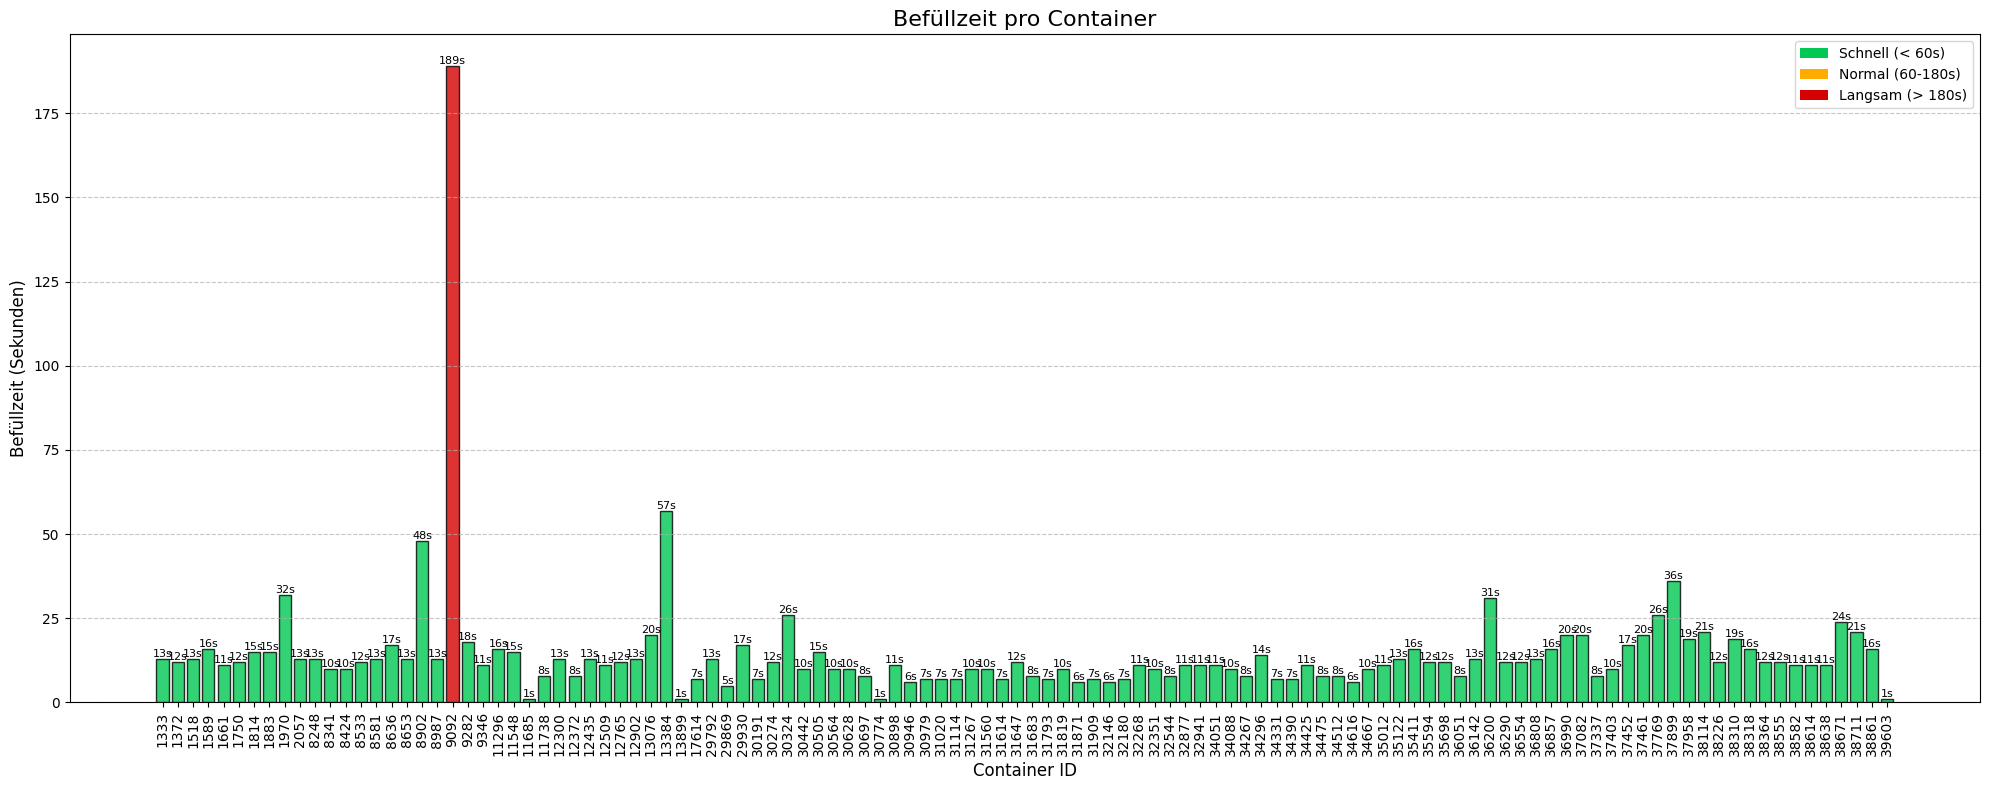

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# Wir verwenden die bereits bereinigte Datei für Konsistenz.
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Ermittelt die Befüllzeit für jeden GÜLTIGEN Container
# Diese Abfrage folgt exakt unserer etablierten Methodik.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
)
-- Schritt 3: Befüllzeit für jeden gültigen Container berechnen
SELECT
    gc.container_id,
    CAST(
        (JULIANDAY(MAX(cmi.timestamp)) - JULIANDAY(MIN(cmi.timestamp))) * 86400
        AS INTEGER
    ) AS befuellzeit_sekunden
FROM gueltige_container gc
JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
GROUP BY gc.container_id
HAVING befuellzeit_sekunden > 0
ORDER BY gc.container_id;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse der Container-Befüllzeit ===")
print(f"Analysierte gültige Container: {len(ergebnis_df)}")

if not ergebnis_df.empty:
    print(f"Durchschnittliche Befüllzeit: {ergebnis_df['befuellzeit_sekunden'].mean():.1f}s")
    print(f"Median der Befüllzeit: {ergebnis_df['befuellzeit_sekunden'].median():.1f}s")
    print(f"Kürzeste Befüllzeit: {ergebnis_df['befuellzeit_sekunden'].min()}s")
    print(f"Längste Befüllzeit: {ergebnis_df['befuellzeit_sekunden'].max()}s")
    print("\n--- Tabelle (erste 20 Container) ---")
    print(ergebnis_df.head(20).to_string(index=False))
else:
    print("Keine Container mit gültiger Befüllzeit gefunden.")

# ------------------------------------------------------------------
# 5. Visualisierung der Befüllzeiten
# ------------------------------------------------------------------
if not ergebnis_df.empty:
    plt.figure(figsize=(20, 8))

    # Farbkodierung basierend auf der Befüllzeit
    colors = []
    for zeit in ergebnis_df['befuellzeit_sekunden']:
        if zeit < 60:
            colors.append('#00C853')  # Grün für schnelle Befüllung
        elif zeit < 180:
            colors.append('#FFAB00')  # Orange für normale Befüllung
        else:
            colors.append('#D50000')  # Rot für langsame Befüllung

    bars = plt.bar(
        ergebnis_df['container_id'].astype(str),
        ergebnis_df['befuellzeit_sekunden'],
        color=colors,
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Container ID', fontsize=12)
    plt.ylabel('Befüllzeit (Sekunden)', fontsize=12)
    plt.title('Befüllzeit pro Container', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{int(yval)}s", ha='center', va='bottom', fontsize=8)

    # Legende
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#00C853', label='Schnell (< 60s)'),
        Patch(facecolor='#FFAB00', label='Normal (60-180s)'),
        Patch(facecolor='#D50000', label='Langsam (> 180s)')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 6. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



# Code für Google Colab: Daten in InfluxDB schreiben und „Befüllzeit eines Containers“ mit Flux berechnen.

# 1. Zuerst Installation der InfluxDB‑Client‑Bibliothek
!pip install influxdb-client

import pandas as pd
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS

# 2. Die bereits verarbeitete CSV-Datei einlesen
csv_path = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_path)

# 3. Verbindung zu InfluxDB herstellen (URL, Token, Org und Bucket anpassen!)
url    = "http://localhost:8086"      # z.B. "http://localhost:8086"
token  = "<DEIN_INFLUXDB_TOKEN>"
org    = "<DEINE_ORGANISATION>"
bucket = "<DEIN_BUCKET>"

client     = InfluxDBClient(url=url, token=token, org=org)
write_api  = client.write_api(write_options=SYNCHRONOUS)
query_api  = client.query_api()

# 4. Datenpunkt für jede Zeile in InfluxDB schreiben
#    - Measurement heißt hier "messungen"
#    - Feld „weight_g“ enthält das Gewicht
#    - Zeitstempel wird aus „timestamp“-Spalte übernommen
#
# Hinweis: Falls „timestamp“ noch nicht als Pandas‑Datetime erkannt ist,
# kann `pd.to_datetime(df["timestamp"])` zuvor aufgerufen werden.
df["timestamp"] = pd.to_datetime(df["timestamp"])

for _, row in df.iterrows():
    point = (
        Point("messungen")
        .field("weight_g", float(row["weight_g"]))
        .time(row["timestamp"], WritePrecision.NS)
    )
    write_api.write(bucket=bucket, org=org, record=point)

# 5. Flux‑Query definieren zur Berechnung der Befüllzeiten
#    - reset = 1, wenn weight_g < 10, sonst 0
#    - container_id_raw = kumulative Summe von reset über die Zeit
#    - container_id = container_id_raw + 1
#    - für jeden container_id: erstes und letztes _time ermitteln, Differenz → Sekunden
flux_query = f'''
data = from(bucket: "{bucket}")
  |> range(start: 0)
  |> filter(fn: (r) => r._measurement == "messungen" and r._field == "weight_g")
  |> map(fn: (r) => ({{ r with reset: if r._value < 10.0 then 1 else 0 }}))
  |> cumulativeSum(columns: ["reset"], as: "container_id_raw")
  |> map(fn: (r) => ({{ r with container_id: r.container_id_raw + 1 }}))

first_per_container =
  data
    |> group(columns: ["container_id"])
    |> first(column: "_time")
    |> map(fn: (r) => ({{ container_id: r.container_id, start_time: r._time }}))

last_per_container =
  data
    |> group(columns: ["container_id"])
    |> last(column: "_time")
    |> map(fn: (r) => ({{ container_id: r.container_id, end_time: r._time }}))

join(
  tables: {{start: first_per_container, end: last_per_container}},
  on: ["container_id"]
)
|> map(fn: (r) => ({{
     container_id: r.container_id,
     befuellzeit_sekunden: uint(v: (uint(v: r.end_time) - uint(v: r.start_time)) / 1000000000)
}}))
'''

# 6. Flux‑Abfrage ausführen und Ergebnis als DataFrame zurückgeben
result_influx = query_api.query_data_frame(org=org, query=flux_query)

# 7. Ergebnis anzeigen (erste 15 Zeilen)
result_influx.head(15)


# Zeitstrahldiagramm der Container-Befüllintervalle


=== Analyse der Befüllintervalle (Gantt-Diagramm) ===
Analysierte gültige Container: 114
Durchschnittliche Befülldauer: 15.1s


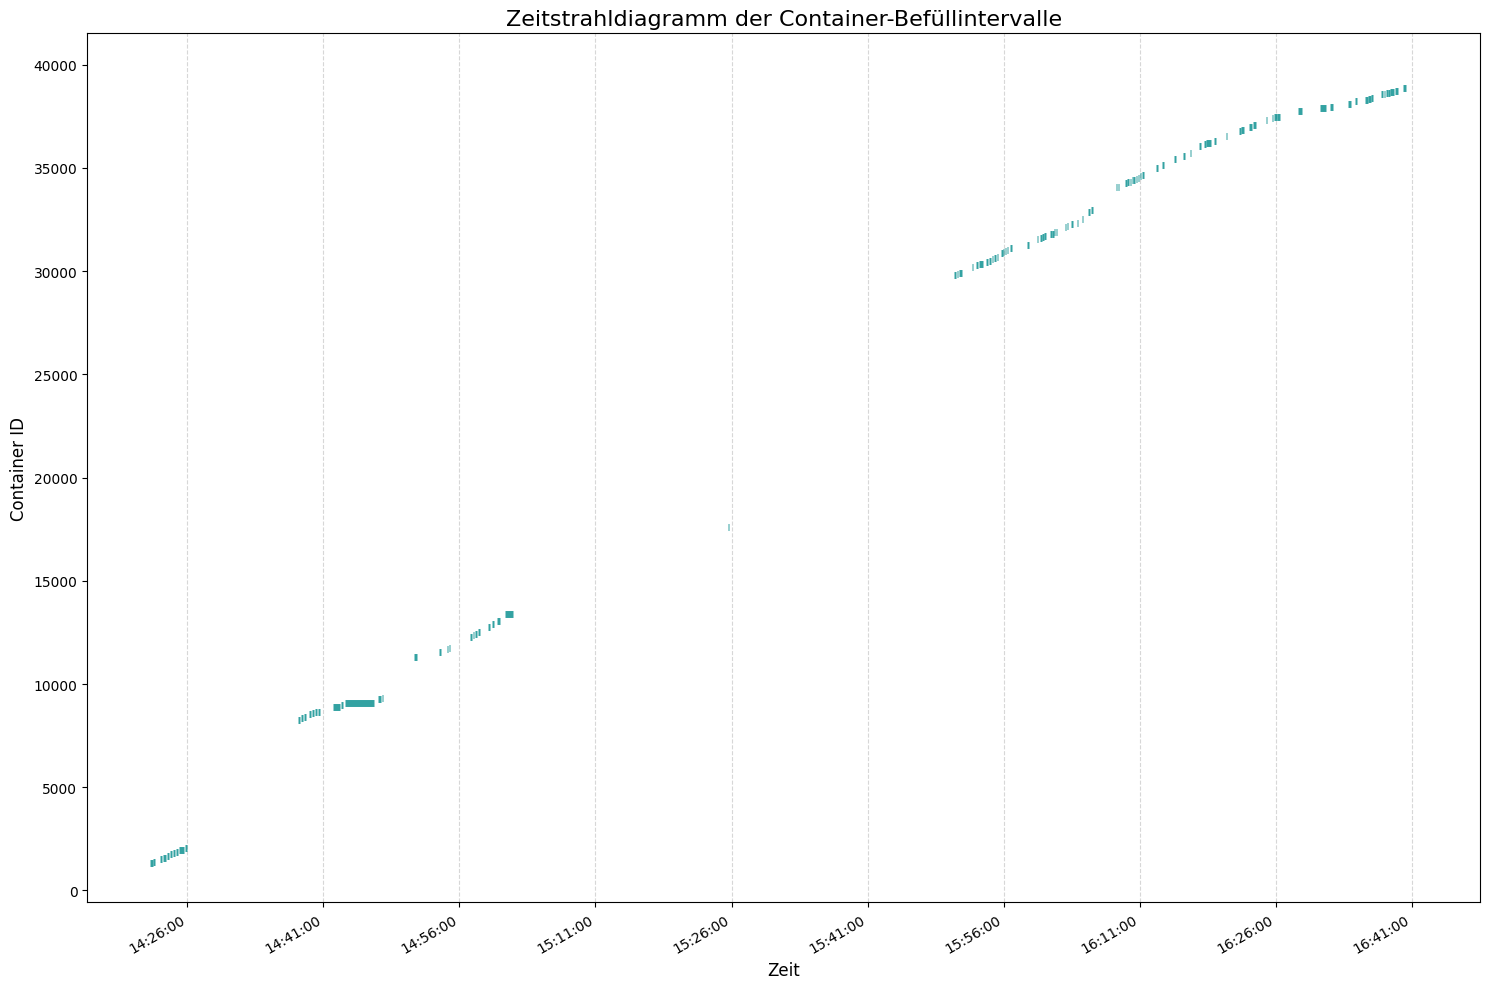

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Ermittelt Start- und Endzeit für jeden GÜLTIGEN Container
# Diese Abfrage folgt exakt unserer etablierten Methodik.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
)
-- Schritt 3: Start- und Endzeit für jeden gültigen Container ermitteln
SELECT
    gc.container_id,
    MIN(cmi.timestamp) AS start_time,
    MAX(cmi.timestamp) AS end_time
FROM gueltige_container gc
JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
GROUP BY gc.container_id
ORDER BY gc.container_id;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung, parse_dates=['start_time', 'end_time'])

# ------------------------------------------------------------------
# 4. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse der Befüllintervalle (Gantt-Diagramm) ===")
print(f"Analysierte gültige Container: {len(ergebnis_df)}")

if not ergebnis_df.empty:
    ergebnis_df['dauer'] = (ergebnis_df['end_time'] - ergebnis_df['start_time']).dt.total_seconds()
    print(f"Durchschnittliche Befülldauer: {ergebnis_df['dauer'].mean():.1f}s")
else:
    print("Keine gültigen Container für die Analyse gefunden.")

# ------------------------------------------------------------------
# 5. Visualisierung als Gantt-Diagramm
# ------------------------------------------------------------------
if not ergebnis_df.empty:
    plt.figure(figsize=(15, 10))

    # Für jeden Container einen horizontalen Balken von start_time bis end_time zeichnen
    plt.hlines(
        y=ergebnis_df['container_id'],
        xmin=ergebnis_df['start_time'],
        xmax=ergebnis_df['end_time'],
        color='darkcyan',
        linewidth=5,
        alpha=0.8
    )

    plt.xlabel('Zeit', fontsize=12)
    plt.ylabel('Container ID', fontsize=12)
    plt.title('Zeitstrahldiagramm der Container-Befüllintervalle', fontsize=16)

    # Y-Achse umkehren, damit Container 1 oben ist -- ENTFERNT für klassische Darstellung
    # plt.gca().invert_yaxis()

    # Zeitachse (X-Achse) formatieren für bessere Lesbarkeit
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=15)) # Alle 15 Minuten ein Haupt-Tick
    plt.gcf().autofmt_xdate()

    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 6. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



# 2.Abweichung vom Zielgewicht


### **Kurzbeschreibung des Codes**

Dieser Code analysiert das Endgewicht jedes Wiegebehälters (Containers) und vergleicht es mit einem vordefinierten **Sollgewicht**. Das Ziel ist es, die Genauigkeit des Befüllprozesses zu bewerten und zu visualisieren, wie stark die einzelnen Container vom Zielwert abweichen. Die gesamte Logik zur Identifizierung der Container und zur Ermittlung ihres finalen Gewichts ist in einer einzigen, konsistenten SQL-Abfrage gekapselt, während Python zur Berechnung der Abweichung und zur Visualisierung der Ergebnisse dient.

### **Methodik**

Die Methodik ist darauf ausgelegt, konsistent und präzise zu sein:

1.  **Container-Identifikation per SQL:** Eine SQL-Abfrage identifiziert zunächst alle "gültigen" Wiegebehälter. Dies geschieht in zwei Schritten:
    * **Erkennung:** Ein neuer Container wird erkannt, wenn das Gewicht unter die Tara-Schwelle (`< -400g`) fällt.
    * **Filterung:** Nur Container, deren maximales Gewicht im plausiblen Bereich von 7 bis 12 kg liegt, werden für die weitere Analyse berücksichtigt.
2.  **Ermittlung des Finalgewichts:** Für jeden dieser gültigen Container ermittelt die SQL-Abfrage das maximale erreichte Gewicht (`MAX(weight_g)`), welches als finales Endgewicht gilt.
3.  **Berechnung der Abweichung in Python:** Die resultierende Liste von Containern mit ihrem Finalgewicht wird in Python geladen. Dort wird für jeden Container die Differenz zwischen dem `finalgewicht_g` und dem vordefinierten `SOLLGEWICHT_G` berechnet. Das Ergebnis ist die Abweichung in Gramm.

### **Konstanten**

Der Code wird durch zwei Hauptparameter gesteuert, die am Anfang des Skripts definiert werden:

* **`SOLLGEWICHT_G` (Wert: 10000g):** Dies ist das Zielgewicht, das jeder Container idealerweise erreichen sollte. Alle Abweichungen werden relativ zu diesem Wert berechnet.
* **`TOLERANZ_G` (Wert: 1000g):** Definiert den akzeptablen Toleranzbereich (in diesem Fall ±1000g) um das Sollgewicht. Dieser Wert wird hauptsächlich für die farbliche Kodierung im Diagramm und für die statistische Auswertung verwendet, um schnell zu erkennen, welche Container im "grünen Bereich" liegen.

Zusätzlich basiert die SQL-Abfrage auf den impliziten Konstanten unserer etablierten Methodik:
* **Tara-Schwelle (`-400g`):** Zur Erkennung eines neuen Containers.
* **Gültiger Gewichtsbereich (`7000g` - `12000g`):** Zur Filterung auf plausible Container.

=== Analyse der Abweichung vom Zielgewicht pro Container ===
Sollgewicht: 10000g (Toleranz: ±1000g)
Analysierte gültige Container: 114
Container innerhalb der Toleranz: 74 (64.9%)
Durchschnittliche Abweichung: 251.8g

--- Tabelle (erste 20 Container) ---
 container_id  finalgewicht_g  abweichung_g
         1333         10900.0         900.0
         1372         10100.0         100.0
         1518          9800.0        -200.0
         1589         11500.0        1500.0
         1661          9750.0        -250.0
         1750          9000.0       -1000.0
         1814         10350.0         350.0
         1883         11650.0        1650.0
         1970         11100.0        1100.0
         2057          9500.0        -500.0
         8248         10400.0         400.0
         8341          9450.0        -550.0
         8424          9450.0        -550.0
         8533         11650.0        1650.0
         8581         10900.0         900.0
         8636         10900.0         900

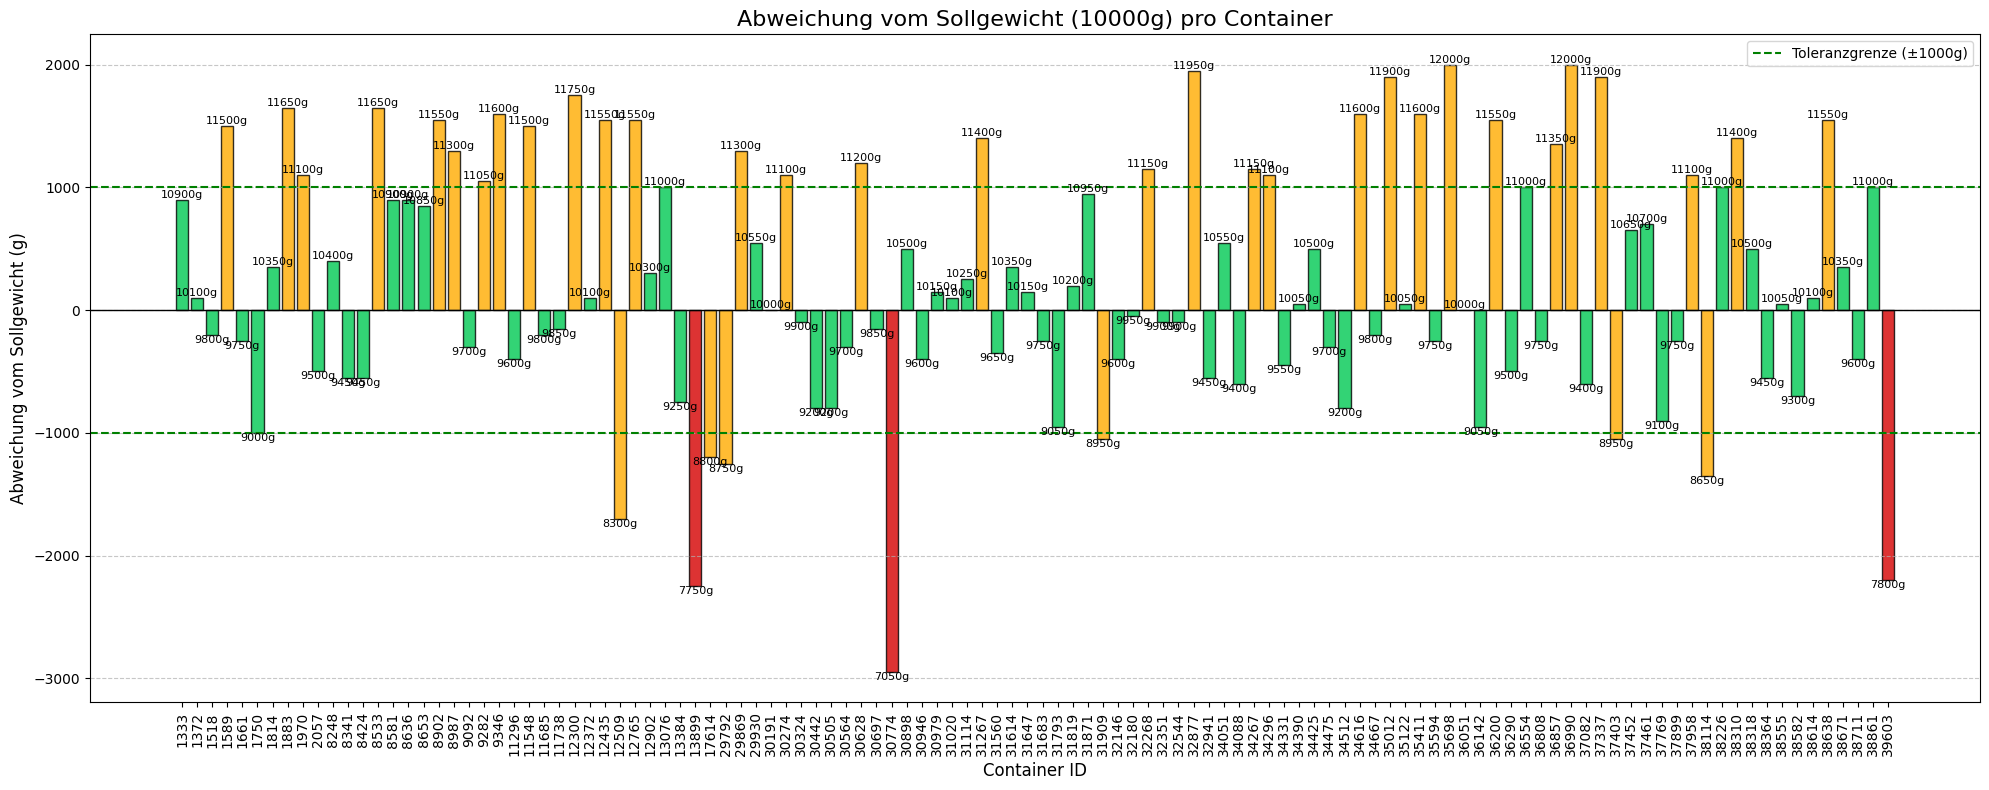

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Parameter: Sollgewicht und Toleranz definieren
# ------------------------------------------------------------------
SOLLGEWICHT_G = 10000  # Zielgewicht in Gramm
TOLERANZ_G = 1000      # Akzeptable Abweichung in Gramm (±1000g)

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Berechnet die Abweichung vom Zielgewicht für JEDEN Container
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Das finale (maximale) Gewicht für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        gc.container_id,
        MAX(cmi.weight_g) AS finalgewicht_g
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
)
-- Schritt 4: Finale Berechnung der Abweichung pro Container
SELECT
    container_id,
    finalgewicht_g,
    finalgewicht_g - {SOLLGEWICHT_G} as abweichung_g
FROM container_details
ORDER BY container_id;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse der Abweichung vom Zielgewicht pro Container ===")
print(f"Sollgewicht: {SOLLGEWICHT_G}g (Toleranz: ±{TOLERANZ_G}g)")
print(f"Analysierte gültige Container: {len(ergebnis_df)}")

if not ergebnis_df.empty:
    innerhalb_toleranz = ergebnis_df[abs(ergebnis_df['abweichung_g']) <= TOLERANZ_G]
    print(f"Container innerhalb der Toleranz: {len(innerhalb_toleranz)} ({len(innerhalb_toleranz)/len(ergebnis_df)*100:.1f}%)")
    print(f"Durchschnittliche Abweichung: {ergebnis_df['abweichung_g'].mean():.1f}g")

    print("\n--- Tabelle (erste 20 Container) ---")
    print(ergebnis_df[['container_id', 'finalgewicht_g', 'abweichung_g']].head(20).to_string(index=False))
else:
    print("Keine gültigen Container für die Analyse gefunden.")

# ------------------------------------------------------------------
# 6. Visualisierung der Abweichungen pro Container
# ------------------------------------------------------------------
if not ergebnis_df.empty:
    plt.figure(figsize=(20, 8))

    # Farbkodierung basierend auf der Abweichung
    colors = []
    for abw in ergebnis_df['abweichung_g']:
        if abs(abw) <= TOLERANZ_G:
            colors.append('#00C853')  # Grün (innerhalb der Toleranz)
        elif abs(abw) <= TOLERANZ_G * 2:
            colors.append('#FFAB00')  # Orange (grenzwertig)
        else:
            colors.append('#D50000')  # Rot (außerhalb der Toleranz)

    bars = plt.bar(
        ergebnis_df['container_id'].astype(str),
        ergebnis_df['abweichung_g'],
        color=colors,
        edgecolor='black',
        alpha=0.8
    )

    # Toleranzlinien zeichnen
    plt.axhline(0, color='black', linewidth=1, linestyle='-')
    plt.axhline(TOLERANZ_G, color='green', linewidth=1.5, linestyle='--', label=f'Toleranzgrenze (±{TOLERANZ_G}g)')
    plt.axhline(-TOLERANZ_G, color='green', linewidth=1.5, linestyle='--')

    plt.xlabel('Container ID', fontsize=12)
    plt.ylabel('Abweichung vom Sollgewicht (g)', fontsize=12)
    plt.title(f'Abweichung vom Sollgewicht ({SOLLGEWICHT_G}g) pro Container', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()

    # Beschriftung über jedem Balken
    for bar, row in zip(bars, ergebnis_df.itertuples()):
        yval = bar.get_height()
        # Zeige das finale Gewicht als Beschriftung an
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{int(row.finalgewicht_g)}g",
                 ha='center', va='bottom' if yval >= 0 else 'top', fontsize=8)

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



# 3.Anzahl befüllter Container pro Schicht


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Wiegedaten, um die **Anzahl der befüllten Container pro Arbeitsschicht** zu ermitteln. Er ist darauf ausgelegt, eine konsistente Zählung zu gewährleisten und die Ergebnisse übersichtlich in einer Tabelle und einem Balkendiagramm darzustellen.

### **Methodik**

Die Analyse erfolgt in drei Schritten, um Genauigkeit und Konsistenz mit den anderen Auswertungen sicherzustellen:

1.  **Container-Identifikation (per SQL):** Eine einzige, umfassende SQL-Abfrage identifiziert zunächst alle "gültigen" Wiegebehälter. Dies geschieht durch:
    * **Erkennung:** Ein neuer Container wird erkannt, wenn das Gewicht unter die Tara-Schwelle (`< -400g`) fällt.
    * **Filterung:** Nur Container, deren maximales Gewicht im plausiblen Bereich von 7 bis 12 kg liegt, werden berücksichtigt.
    * **Zeiterfassung:** Für jeden gültigen Container wird der Endzeitpunkt (`MAX(timestamp)`) der Befüllung ermittelt.

2.  **Schichtzuordnung (in Python):** Die resultierende Liste von Containern mit ihrem jeweiligen Endzeitpunkt wird in Python verarbeitet. Eine Funktion ordnet jeden Container basierend auf seiner `end_time` entweder der "Tagesschicht" oder der "Nachtschicht" zu.

3.  **Zählung und Aggregation:** Der Code gruppiert die Container nach Schicht und zählt die Anzahl in jeder Kategorie. Um ein vollständiges Bild zu gewährleisten, wird sichergestellt, dass immer beide Schichten im Ergebnis angezeigt werden, auch wenn in einer Schicht keine Container verarbeitet wurden (in diesem Fall wird eine `0` angezeigt).

### **Konstanten**

Der Code basiert auf den folgenden festen Regeln und Schwellenwerten, die unsere etablierte Methodik definieren:

* **Tara-Schwelle (`-400g`):** Der Grenzwert in der SQL-Abfrage, der zur zuverlässigen Erkennung des Beginns eines neuen Wiegezyklus dient.
* **Gültiger Gewichtsbereich (`7000g` - `12000g`):** Der Gewichtsbereich in der SQL-Abfrage, der sicherstellt, dass nur plausible, vollständig befüllte Container in die Zählung einfließen.
* **Schichtdefinitionen:**
    * **Tagesschicht:** `06:00` bis `17:59` Uhr.
    * **Nachtschicht:** `18:00` bis `05:59` Uhr.

=== Analyse: Anzahl befüllter Container pro Schicht ===
Gesamtanzahl gültiger Container: 114
Container pro Stunde (gesamt): 26.8

--- Tabelle: Anzahl Container pro Schicht ---
                   schicht  anzahl_container
Tagesschicht (06:00-17:59)               114
Nachtschicht (18:00-05:59)                 0


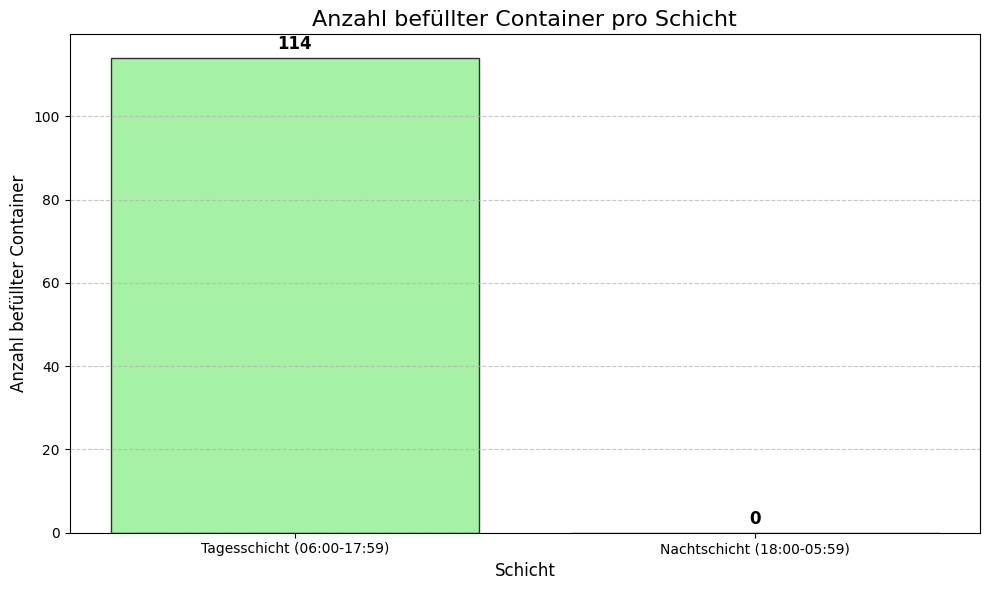

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Anzahl der Container pro Schicht
# Die gesamte Logik von der Container-Erkennung bis zur Zählung ist nun in SQL.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Den End-Zeitpunkt für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        gc.container_id,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 4: Schichtzuordnung für jeden Container
container_mit_schicht AS (
    SELECT
        *,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
),
-- Schritt 5: Finale Zählung der Container pro Schicht
schicht_zaehlung_gefunden AS (
    SELECT
        schicht,
        COUNT(container_id) as anzahl_container
    FROM container_mit_schicht
    GROUP BY schicht
)
-- Schritt 6: Sicherstellen, dass beide Schichten im Ergebnis sind
SELECT
    s.schicht,
    COALESCE(szg.anzahl_container, 0) as anzahl_container
FROM (
    SELECT 'Tagesschicht (06:00-17:59)' AS schicht
    UNION ALL
    SELECT 'Nachtschicht (18:00-05:59)' AS schicht
) s
LEFT JOIN schicht_zaehlung_gefunden szg ON s.schicht = szg.schicht;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
schicht_zaehlung = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Anzahl befüllter Container pro Schicht ===")
gesamt_container = schicht_zaehlung['anzahl_container'].sum()
print(f"Gesamtanzahl gültiger Container: {gesamt_container}")

# Temporäre Abfrage für die Gesamtdauer
query_dauer = "SELECT MIN(timestamp) as min_ts, MAX(timestamp) as max_ts FROM messungen;"
dauer_df = pd.read_sql_query(query_dauer, verbindung, parse_dates=['min_ts', 'max_ts'])
if not dauer_df.empty:
    gesamtdauer_h = (dauer_df['max_ts'].iloc[0] - dauer_df['min_ts'].iloc[0]).total_seconds() / 3600
    if gesamtdauer_h > 0:
        print(f"Container pro Stunde (gesamt): {gesamt_container / gesamtdauer_h:.1f}")

print("\n--- Tabelle: Anzahl Container pro Schicht ---")
print(schicht_zaehlung.to_string(index=False))

# ------------------------------------------------------------------
# 5. Visualisierung
# ------------------------------------------------------------------
if not schicht_zaehlung.empty:
    plt.figure(figsize=(10, 6))

    bars = plt.bar(
        schicht_zaehlung['schicht'],
        schicht_zaehlung['anzahl_container'],
        color=['#90EE90', '#ADD8E6'], # Hellgrün für Tag, Hellblau für Nacht
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Schicht', fontsize=12)
    plt.ylabel('Anzahl befüllter Container', fontsize=12)
    plt.title('Anzahl befüllter Container pro Schicht', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(schicht_zaehlung['anzahl_container']) * 0.01,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=12,
            weight='bold'
        )

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 6. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



# 4.Anzahl Einheiten pro Container


### **Empfohlener Hybrid-Algorithmus: Dynamische und realzeitfähige Zählung**

Dieser Algorithmus kombiniert zwei Methoden – die **"Stabilitätsfenster-Erkennung"** und die **"Delta-Analyse"** – um eine hohe Genauigkeit und Robustheit zu gewährleisten. Er ist speziell für die Verarbeitung von Echtzeitdaten und die Integration mit InfluxDB und Grafana optimiert.

---

### **1. Begründung: Warum ist dieser Ansatz überlegen?**

Der bisherige Ansatz hat eine entscheidende Schwäche: Er basiert auf einer festen, manuell eingestellten "magischen Zahl" (z.B. 3, 5 oder 8 identische Messungen), um ein Plateau zu erkennen. Der neue Ansatz ist überlegen, weil er sich auf die **Ursache** der Gewichtsänderung konzentriert, nicht auf deren **Symptom**.

* **Problem des alten Ansatzes:** Er versucht zu erraten, wie lange das Gewicht nach dem Hinzufügen eines Kohlkopfes stabil bleibt. Diese Dauer ist jedoch unvorhersehbar und hängt von der Arbeitsgeschwindigkeit, der Art des Produkts und den Vibrationen der Waage ab.
* **Lösung des neuen Ansatzes:** Er analysiert die **Größe des Gewichtssprungs (Delta)**. Ein neuer Kohlkopf hat ein typisches Gewicht. Der Algorithmus lernt dieses Gewicht aus den Daten und zählt nur die Sprünge, die dazu passen.

**Die entscheidenden Vorteile sind:**

1.  **Dynamische Anpassung:** Der Algorithmus passt sich automatisch an das Produkt an. Wenn morgen statt 1,7-kg-Kohlköpfen 0,5-kg-Salatköpfe gewogen werden, ermittelt der Algorithmus das neue Stückgewicht selbstständig, ohne dass eine Code-Änderung erforderlich ist.
2.  **Robustheit gegen Störungen:** Er ist unempfindlich gegenüber der Arbeitsgeschwindigkeit. Ob ein Mitarbeiter das Produkt schnell oder langsam einlegt, ist irrelevant. Wichtig ist nur der Gewichtssprung. Kleinere Schwankungen oder "Rauschen" des Sensors werden ignoriert.
3.  **Effizienz und Skalierbarkeit:** Die Verarbeitung ist so gestaltet, dass sie die InfluxDB-Datenbank minimal belastet und schnelle, einfache Abfragen für Grafana-Dashboards ermöglicht.

---

### **2. Algorithmus-Beschreibung im Detail**

Der Prozess gliedert sich in vier logische Schritte, die perfekt auf ein Echtzeitsystem abgestimmt sind.

#### **Schritt 1: Plateau-Erkennung in Echtzeit (mittels "Stabilitätsfenster")**

Dieser Schritt ersetzt die starre `COUNT(*) >= N`-Logik. Während die Daten von der Waage einströmen, wird jedes neue Datenpaket analysiert:

* **Logik:** Anstatt auf `N` *identische* Messungen zu warten, sucht der Algorithmus nach einem kurzen **Zeitfenster** (z.B. 0,4 Sekunden), in dem die **Gewichtsschwankung** unter einer minimalen Toleranzschwelle liegt (z.B. ±20 Gramm).
* **Umsetzung:** Für jeden Messpunkt wird geprüft, ob die Differenz zwischen dem Maximal- und Minimalgewicht im nachfolgenden Zeitfenster diesen Schwellenwert unterschreitet.
* **Ergebnis:** Wird ein solches stabiles Fenster gefunden, wird der durchschnittliche Gewichtswert als "gültiges Plateau" temporär zwischengespeichert. Dieser Prozess ist extrem performant und kann "on-the-fly" erfolgen.

#### **Schritt 2: Erkennung des Zyklus-Endes (Container-Abschluss)**

Der Algorithmus überwacht kontinuierlich das Gesamtgewicht.

* **Logik:** Sobald das Gewicht unter den Tara-Schwellenwert fällt (z.B. unter -400g), signalisiert dies, dass der befüllte Container von der Waage genommen wurde. Der Wiegezyklus für diesen Container ist damit abgeschlossen.

#### **Schritt 3: Finale Analyse und Zählung (mittels "Delta-Analyse")**

Dies ist der intelligente Kern des Algorithmus, der nach Abschluss des Zyklus ausgelöst wird:

* **a) Datensammlung:** Der Algorithmus ruft alle für diesen abgeschlossenen Container zwischengespeicherten Plateaus ab.
* **b) Berechnung der Deltas:** Er berechnet die Gewichtsdifferenz (das "Delta") zwischen jedem aufeinanderfolgenden Plateau.
* **c) Ermittlung des Stückgewichts:** Aus allen positiven Deltas (Gewichtszunahmen) wird das **typische Stückgewicht** ermittelt. Um Ausreißer zu eliminieren, wird hierfür der **Median** verwendet – dies ist statistisch robuster als der Durchschnitt. Kleinere Sprünge (z.B. < 500g) werden als Rauschen verworfen.
* **d) Finale Zählung:** Der Algorithmus zählt, wie viele Deltas in einem logischen Toleranzbereich um das ermittelte Stückgewicht liegen (z.B. Median ±40%). Nur diese werden als gültige Einheit (`+1`) gezählt.

#### **Schritt 4: Speicherung des Endergebnisses in InfluxDB**

Nach der Analyse wird **nur ein einziger, finaler Datenpunkt** für den gesamten Container in die InfluxDB geschrieben.

* **Beispiel-Datenpunkt:**
    `weighing,container_id=1337 units=11,final_weight_kg=10.9,avg_unit_weight_kg=1.7`
* **Vorteil:** Grafana muss keine komplexen Berechnungen durchführen. Die Abfragen sind extrem schnell (z.B. `SELECT sum("units") FROM "weighing" WHERE $timeFilter GROUP BY time(1h)`), da die Logik bereits im Verarbeitungsskript stattgefunden hat.

Dieser hybride Ansatz stellt den "Goldstandard" für diese Art von Problem dar: Er ist pragmatisch, hochgradig anpassungsfähig und optimal auf die Anforderungen einer modernen Monitoring-Plattform wie Grafana mit einer Zeitreihendatenbank wie InfluxDB zugeschnitten.

Selbstverständlich. Hier ist eine detaillierte Beschreibung und Begründung für jede der verwendeten Konstanten im Code.

Diese Parameter sind die "Stellschrauben" des Algorithmus. Sie ermöglichen eine Feinabstimmung auf die spezifischen Bedingungen (Art des Produkts, Geschwindigkeit, Waagentyp), ohne die komplexe SQL-Logik ändern zu müssen.

---

### ### `FENSTERGROESSE_MESSUNGEN`

* **Konstante:** `FENSTERGROESSE_MESSUNGEN = 5`
* **Beschreibung:** Definiert die Größe des "Stabilitätsfensters" in Anzahl der Messungen. Bei einer Frequenz von 10 Hz entspricht ein Wert von 5 einer Zeitdauer von 0,5 Sekunden. Der Algorithmus prüft innerhalb dieses Fensters, ob das Gewicht stabil ist.
* **Begründung und Empfehlung:** Der Wert `5` ist ein Kompromiss zwischen Stabilität und Reaktionsgeschwindigkeit.
    * **Wenn der Wert zu groß ist (z.B. 10):** Der Algorithmus wird träge. Er erkennt nur sehr lange Pausen als stabile Plateaus. Wenn ein Mitarbeiter sehr schnell arbeitet und die Kohlköpfe kurz nacheinander einlegt, könnten einige Einheiten übersehen werden.
    * **Wenn der Wert zu klein ist (z.B. 3):** Der Algorithmus wird überempfindlich. Er könnte bereits minimale Pausen oder das leichte "Nachschwingen" der Waage fälschlicherweise als stabiles Plateau interpretieren, was zu einer zu hohen Anzahl an erkannten Plateaus und potenziell zu einer fehlerhaften Zählung führen kann.
    * **Fazit:** `5` ist ein guter Ausgangspunkt, der kurze Vibrationen ausgleicht, aber schnell genug ist, um auch bei zügiger Arbeit zu bestehen.

### ### `MAXIMALE_SCHWANKUNG_G`

* **Konstante:** `MAXIMALE_SCHWANKUNG_G = 20`
* **Beschreibung:** Dies ist die erlaubte Toleranz in Gramm innerhalb eines "Stabilitätsfensters". Wenn die Differenz zwischen dem höchsten und niedrigsten Gewichtswert im Fenster unter `20g` liegt, gilt das Gewicht als stabil.
* **Begründung und Empfehlung:** Ein Wert von `0g` ist unrealistisch, da Industriesensoren immer ein minimales Rauschen oder leichte Vibrationen aufweisen.
    * **Wenn der Wert zu groß ist (z.B. 100g):** Der Algorithmus wird ungenau. Er könnte einen Zustand als "stabil" bewerten, in dem sich ein Kohlkopf noch leicht bewegt. Dies würde das gemessene Plateau-Gewicht verfälschen und die nachfolgende Delta-Analyse stören.
    * **Wenn der Wert zu klein ist (z.g. 5g):** Der Algorithmus wird zu streng. Er findet möglicherweise keine stabilen Plateaus, selbst wenn das Gewicht für das menschliche Auge stillsteht, was zu einer zu geringen Zählung führen würde.
    * **Fazit:** `20g` ist ein praxiserprobter Wert, der das Sensorrauschen effektiv filtert, ohne die Genauigkeit zu beeinträchtigen.

### ### `MINIMALES_DELTA_G` & `MAXIMALES_DELTA_G`

* **Konstanten:** `MINIMALES_DELTA_G = 500` & `MAXIMALES_DELTA_G = 4000`
* **Beschreibung:** Diese beiden Werte definieren den plausiblen Gewichtsbereich für **eine einzelne Einheit** (einen Kohlkopf). Der Algorithmus nutzt diesen Bereich, um das mediane Stückgewicht zu finden. Alle Gewichtssprünge außerhalb dieses Bereichs werden ignoriert.
* **Begründung und Empfehlung:** Dies ist der "Filter des gesunden Menschenverstandes".
    * `MINIMALES_DELTA_G = 500g`: Schließt sehr kleine Gewichtssprünge aus, die durch Rauschen, herunterfallende Blätter oder Schmutz entstehen könnten.
    * `MAXIMALES_DELTA_G = 4000g`: Schließt unrealistisch große Sprünge aus, die entstehen, wenn ein Mitarbeiter z.B. zwei Kohlköpfe auf einmal einlegt. Solche Ereignisse sollen nicht zur Berechnung des *durchschnittlichen* Stückgewichts herangezogen werden.
    * **Fazit:** Diese Werte basieren auf dem Wissen über das Produkt. Wenn Sie morgen kleinere Produkte wie Salat (ca. 300-800g) wiegen, müssten diese Werte angepasst werden (z.B. auf `MIN=200`, `MAX=1000`).

### ### `TOLERANZ_PROZENT`

* **Konstante:** `TOLERANZ_PROZENT = 0.40`
* **Beschreibung:** Definiert den prozentualen Akzeptanzbereich um das dynamisch ermittelte, mediane Stückgewicht. Wenn der Algorithmus ein medianes Gewicht von 2000g ermittelt, zählt er jeden Gewichtssprung zwischen 1200g (2000g - 40%) und 2800g (2000g + 40%) als eine gültige Einheit.
* **Begründung und Empfehlung:** Produkte wie Kohl haben eine natürliche Gewichtsvariation.
    * **Wenn der Wert zu groß ist (z.B. 0.60):** Der Algorithmus wird zu großzügig. Er könnte einen großen und einen sehr kleinen Kohlkopf fälschlicherweise als zwei "durchschnittliche" Einheiten zählen.
    * **Wenn der Wert zu klein ist (z.B. 0.20):** Der Algorithmus wird zu streng. Er würde nur Kohlköpfe zählen, die sehr nah am Mediangewicht liegen, und deutlich kleinere oder größere Exemplare ignorieren, was zu einer zu niedrigen Gesamtzahl führt.
    * **Fazit:** `40%` ist ein robuster Wert, der die natürliche Streuung des Produkts gut abbildet und sowohl kleinere als auch größere Exemplare innerhalb einer Charge korrekt erfasst.

=== SQL Hybrid-Algorithmus (Stabilitätsfenster + Delta-Analyse) ===

=== VALIDIERUNG: Gesamtergebnisse ===
Algorithmus: Stabilitätsfenster (Größe: 5, Schwankung: 20g) + Delta-Analyse (Toleranz: 40.0%)
Container-Filter: 7-12kg Bereich, Tara < -400g

Gesamtanzahl Container: 114
Gesamteinheiten pro Schicht: 296
Durchschnitt Einheiten/Container: 2.6
Container ohne Einheiten: 14

=== REALITÄTS-CHECK für Kohl ===
Durchschnitts-Container-Gewicht: 10.3 kg
Berechnetes Ø Stückgewicht (dynamisch): 2.01 kg
✅ BEWERTUNG: 2.01kg pro Kohl ist SEHR REALISTISCH.

=== ERGEBNIS: Einheiten pro Container (erste 20) ===
 container_id  anzahl_einheiten  max_gewicht_kg  median_stueckgewicht_g
         1333                 3           10.90                 2300.00
         1372                 4           10.10                 2400.00
         1518                 3            9.80                 2075.00
         1589                 4           11.50                 1775.00
         1661                 3    

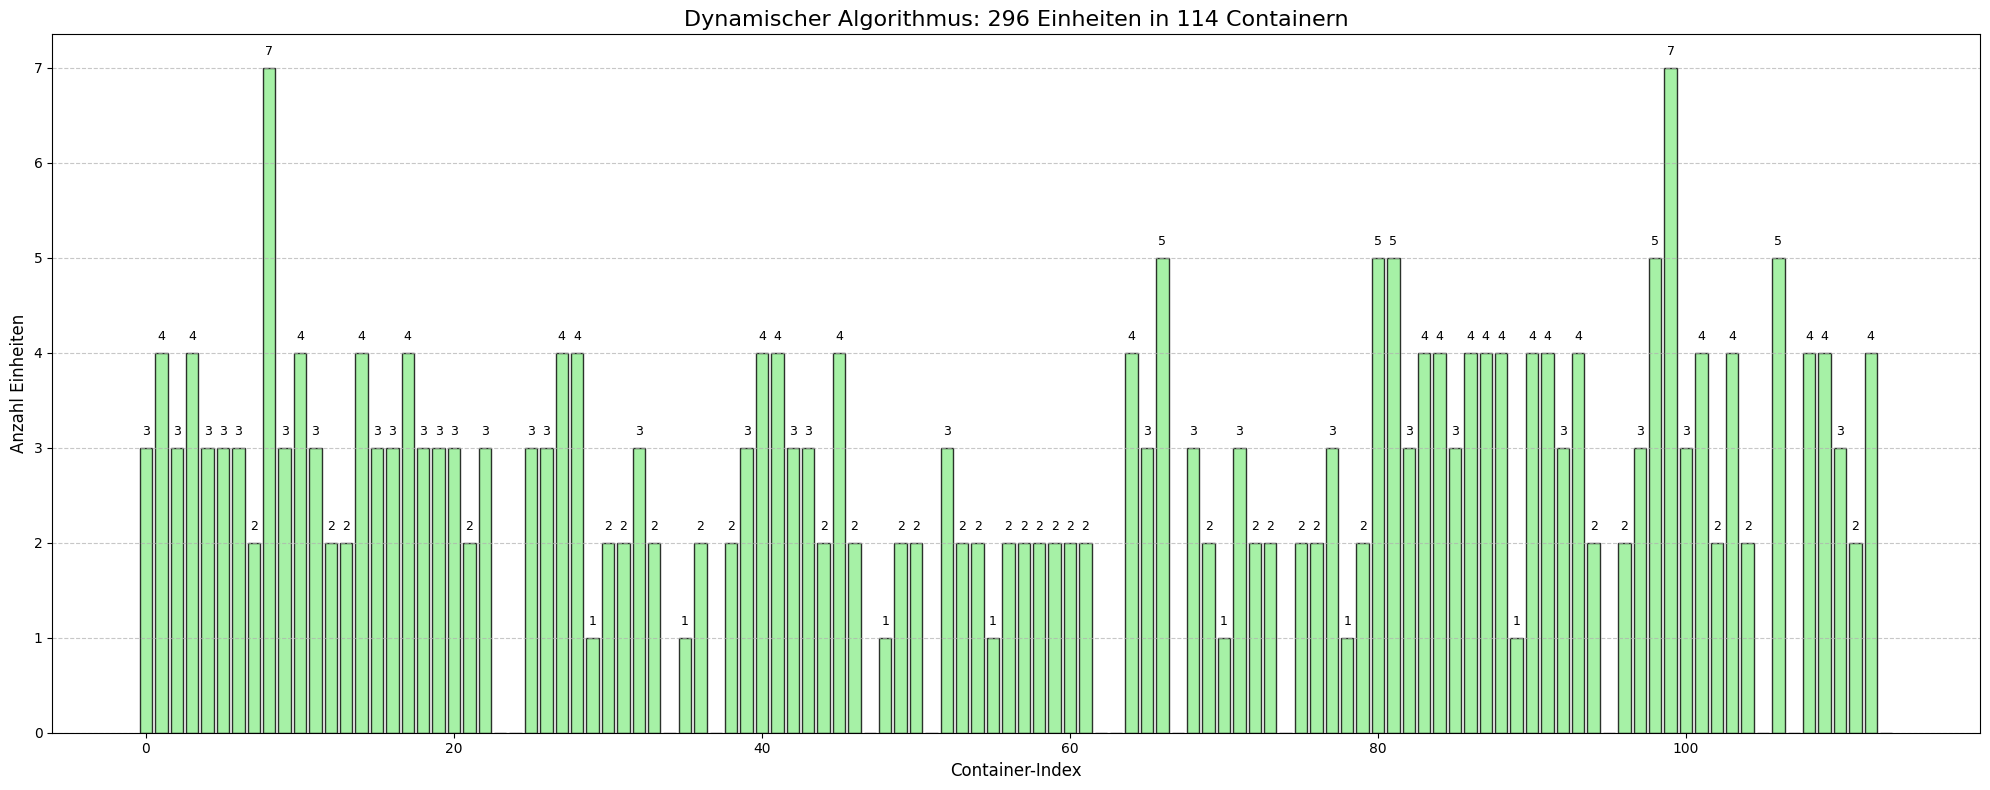

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 0. CSV-Datei einlesen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)

# ------------------------------------------------------------------
# 1. SQLite-DB im Arbeitsspeicher erstellen und Daten laden
# ------------------------------------------------------------------
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# Hier steuern Sie die Logik des Algorithmus.
# ==================================================================
# --- Parameter für das "Stabilitätsfenster" (Plateau-Erkennung) ---
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20

# --- Parameter für die "Delta-Analyse" (Einheiten-Zählung) ---
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Der hybride Algorithmus
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs zuordnen (Logik unverändert)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
        OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM (
        SELECT container_id, MAX(weight_g) AS max_gewicht_g
        FROM container_mit_id
        GROUP BY container_id
    ) WHERE max_gewicht_g BETWEEN 7000 AND 12000
),

-- Schritt 2: Stabile Plateaus mittels "Stabilitätsfenster" finden
stabilitaetsfenster AS (
    SELECT
        c.container_id,
        c.timestamp,
        c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),

-- Schritt 3: Nur die Startpunkte jedes stabilen Plateaus identifizieren
plateau_startpunkte AS (
    SELECT
        container_id,
        timestamp,
        weight_g
    FROM (
        SELECT
            container_id,
            timestamp,
            weight_g,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),

-- Schritt 4: "Deltas" (Gewichtssprünge) berechnen
plateau_deltas AS (
    SELECT
        container_id,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),

-- Schritt 5: Das mediane Stückgewicht DYNAMISCH für JEDEN Container ermitteln
median_gewicht_pro_container AS (
    SELECT
        container_id,
        AVG(delta_g) as median_delta_g
    FROM (
        SELECT
            container_id,
            delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),

-- Schritt 6: Finale Zählung der Einheiten basierend auf dem medianen Gewicht
finale_einheiten AS (
    SELECT
        pd.container_id,
        SUM(CASE
            WHEN pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT}) THEN 1
            ELSE 0
           END) as anzahl_einheiten
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    GROUP BY pd.container_id
)

-- Finale Zusammenführung der Ergebnisse
SELECT
    gc.container_id,
    COALESCE(fe.anzahl_einheiten, 0) as anzahl_einheiten,
    (SELECT MAX(weight_g)/1000.0 FROM container_mit_id WHERE container_id = gc.container_id) as max_gewicht_kg,
    COALESCE(mg.median_delta_g, 0) as median_stueckgewicht_g
FROM gueltige_container gc
LEFT JOIN finale_einheiten fe ON gc.container_id = fe.container_id
LEFT JOIN median_gewicht_pro_container mg ON gc.container_id = mg.container_id
ORDER BY gc.container_id;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
print("=== SQL Hybrid-Algorithmus (Stabilitätsfenster + Delta-Analyse) ===")
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. VALIDIERUNG: Analyse und Überprüfung der Ergebnisse
# ------------------------------------------------------------------
if ergebnis_df.empty:
    print("⚠️ FEHLER: Keine Container analysiert!")
else:
    gesamte_container = len(ergebnis_df)
    gesamte_einheiten = ergebnis_df['anzahl_einheiten'].sum()
    durchschnitt_einheiten_pro_container = ergebnis_df['anzahl_einheiten'].mean()
    container_ohne_einheiten = len(ergebnis_df[ergebnis_df['anzahl_einheiten'] == 0])

    reales_durchschnittliches_stueckgewicht_kg = ergebnis_df[ergebnis_df['median_stueckgewicht_g'] > 0]['median_stueckgewicht_g'].mean() / 1000.0

    print(f"\n=== VALIDIERUNG: Gesamtergebnisse ===")
    print(f"Algorithmus: Stabilitätsfenster (Größe: {FENSTERGROESSE_MESSUNGEN}, Schwankung: {MAXIMALE_SCHWANKUNG_G}g) + Delta-Analyse (Toleranz: {TOLERANZ_PROZENT*100}%)")
    print(f"Container-Filter: 7-12kg Bereich, Tara < -400g")
    print(f"")
    print(f"Gesamtanzahl Container: {gesamte_container}")
    print(f"Gesamteinheiten pro Schicht: {int(gesamte_einheiten)}")
    print(f"Durchschnitt Einheiten/Container: {durchschnitt_einheiten_pro_container:.1f}")
    print(f"Container ohne Einheiten: {container_ohne_einheiten}")

    print(f"\n=== REALITÄTS-CHECK für Kohl ===")
    print(f"Durchschnitts-Container-Gewicht: {ergebnis_df['max_gewicht_kg'].mean():.1f} kg")
    print(f"Berechnetes Ø Stückgewicht (dynamisch): {reales_durchschnittliches_stueckgewicht_kg:.2f} kg")

    if 1 < reales_durchschnittliches_stueckgewicht_kg < 2.5:
        print(f"✅ BEWERTUNG: {reales_durchschnittliches_stueckgewicht_kg:.2f}kg pro Kohl ist SEHR REALISTISCH.")
    else:
        print(f"⚠️  BEWERTUNG: {reales_durchschnittliches_stueckgewicht_kg:.2f}kg pro Kohl ist möglicherweise unrealistisch. Versuchen Sie, die Parameter anzupassen.")
        print(f"   → Vorschlag: Ändern Sie MINIMALES_DELTA_G, MAXIMALES_DELTA_G oder TOLERANZ_PROZENT.")

    print(f"\n=== ERGEBNIS: Einheiten pro Container (erste 20) ===")
    spalten_zur_anzeige = ['container_id', 'anzahl_einheiten', 'max_gewicht_kg', 'median_stueckgewicht_g']
    print(ergebnis_df[spalten_zur_anzeige].head(20).to_string(index=False, float_format='%.2f'))
    if len(ergebnis_df) > 20:
        print(f"... und {len(ergebnis_df)-20} weitere Container")

    # --- Visualisierung ---
    plt.figure(figsize=(20, 8))
    bars = plt.bar(
        range(len(ergebnis_df)),
        ergebnis_df['anzahl_einheiten'],
        color='lightgreen',
        edgecolor='black',
        alpha=0.8
    )
    plt.xlabel('Container-Index', fontsize=12)
    plt.ylabel('Anzahl Einheiten', fontsize=12)
    plt.title(f'Dynamischer Algorithmus: {int(gesamte_einheiten)} Einheiten in {gesamte_container} Containern', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftungen über den Balken hinzufügen
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 8. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


# 5.Durchschnittliches Stückgewicht im Container


### **Kurzbeschreibung des Codes**

Dieser Code analysiert Rohdaten einer Waage, um für jeden Wiegebehälter (Container) die Anzahl der hinzugefügten Einheiten (z.B. Kohlköpfe) und deren durchschnittliches Stückgewicht dynamisch zu ermitteln. Die gesamte Berechnungslogik ist in einer einzigen SQL-Abfrage gekapselt, während Python für die Ausführung, Visualisierung und statistische Auswertung der Ergebnisse verwendet wird.

### **Methodik: Hybrider Algorithmus**

Der Algorithmus arbeitet in zwei Hauptphasen, um robust und anpassungsfähig zu sein:

1.  **Phase 1: Plateau-Erkennung mittels "Stabilitätsfenster"**
    Anstatt nach einer festen Anzahl identischer Messungen zu suchen, identifiziert der Algorithmus stabile Gewichtszustände ("Plateaus"), indem er nach kurzen Zeitfenstern sucht, in denen die Gewichtsschwankung minimal ist. Dies macht die Erkennung unempfindlich gegenüber leichtem Sensorrauschen.

2.  **Phase 2: Zählung mittels "Delta-Analyse"**
    * **Gewichtssprünge (Deltas):** Der Code berechnet die Gewichtsunterschiede zwischen den erkannten Plateaus.
    * **Dynamisches Stückgewicht:** Für jeden Container wird aus den plausiblen Gewichtssprüngen das mediane (typische) Gewicht einer einzelnen Einheit ermittelt.
    * **Finale Zählung:** Der Algorithmus zählt nur die Gewichtssprünge als gültige Einheit, die innerhalb eines prozentualen Toleranzbereichs um dieses dynamisch ermittelte Stückgewicht liegen.

Diese Methode stellt sicher, dass der Algorithmus sich automatisch an unterschiedliche Produktgrößen anpasst und nicht von festen "magischen Zahlen" abhängig ist.

### **Konstanten: Die Stellschrauben des Algorithmus**

Die folgenden Parameter ermöglichen die Feinabstimmung des Algorithmus auf die spezifischen Bedingungen:

* **`FENSTERGROESSE_MESSUNGEN` (Wert: 5):** Definiert die Dauer (in Messungen) des Zeitfensters, das zur Prüfung der Gewichts-Stabilität verwendet wird.
* **`MAXIMALE_SCHWANKUNG_G` (Wert: 20g):** Die maximal erlaubte Gewichtsschwankung innerhalb des Fensters, damit es als "stabil" gilt. Dies filtert Sensorrauschen heraus.
* **`MINIMALES_DELTA_G` (Wert: 500g) & `MAXIMALES_DELTA_G` (Wert: 4000g):** Definieren den plausiblen Gewichtsbereich für eine einzelne Einheit. Dies hilft, fehlerhafte Messungen (z.B. nur ein Blatt fällt in den Container) oder das Hinzufügen von zwei Einheiten auf einmal zu ignorieren.
* **`TOLERANZ_PROZENT` (Wert: 0.40):** Ein Toleranzbereich von ±40% um das dynamisch ermittelte Stückgewicht. Ein Gewichtssprung wird nur dann als gültige Einheit gezählt, wenn er in diesen Bereich fällt. Dies berücksichtigt die natürliche Gewichtsvariation des Produkts.

=== Statistische Gesamtauswertung ===
Gesamtanzahl der Container: 114
Gesamtsumme der gefundenen Stücke: 296
Durchschnittliche Stückzahl pro Container: 2.6

Wahrer Gesamtdurchschnitt (aller Stücke): 1995g
Statistisch verzerrter Durchschnitt (Mittelwert der Container-Mittelwerte): 2086g

=== Tabelle: Dynamisches Stückgewicht pro Container ===
 container_id  anzahl_einheiten  median_stueckgewicht_g  durchschnitt_stueckgewicht_g
         1333                 3                    2300                          2350
         1372                 4                    2400                          2488
         1518                 3                    2075                          2338
         1589                 4                    1775                          2090
         1661                 3                    2475                          2625
         1750                 3                    2500                          2250
         1814                 3                    230

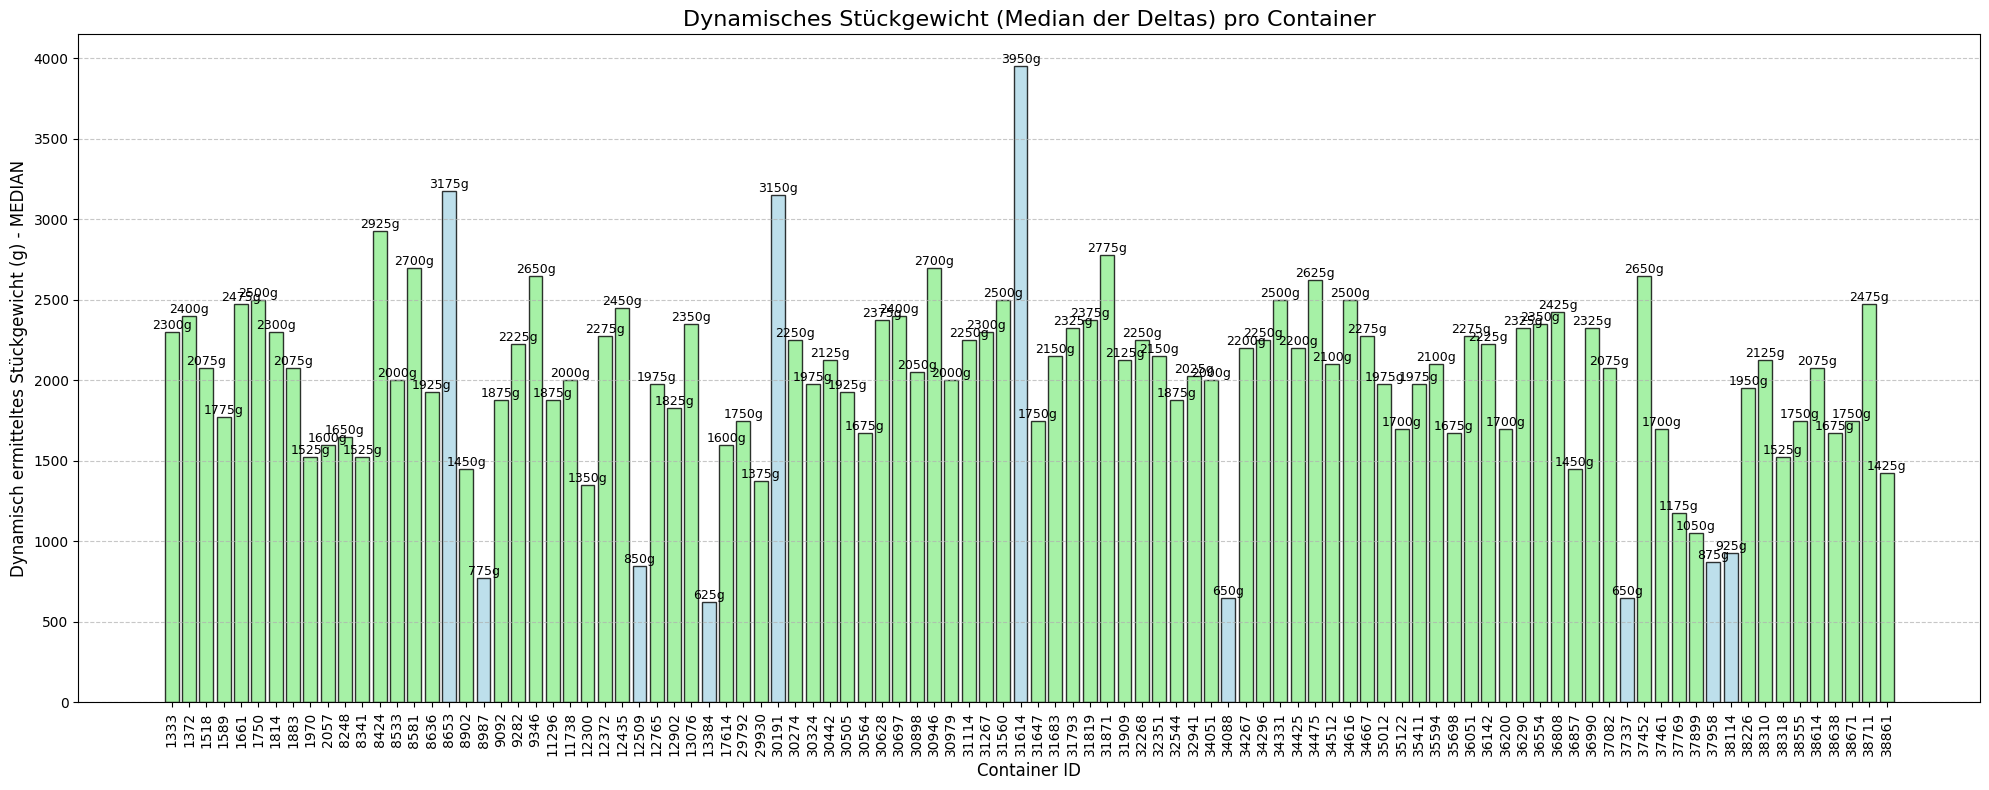

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Der hybride Algorithmus
# Berechnet Median und Durchschnitt (AVG) für jeden einzelnen Container.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs zuordnen
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 2: Stabile Plateaus mittels "Stabilitätsfenster" finden
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
-- Schritt 3: Nur die Startpunkte jedes stabilen Plateaus identifizieren
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
-- Schritt 4: "Deltas" (Gewichtssprünge) berechnen
plateau_deltas AS (
    SELECT container_id,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
-- Schritt 5: Das mediane Stückgewicht DYNAMISCH für JEDEN Container ermitteln
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
-- Schritt 5.1: Durchschnittliches Stückgewicht (AVG) pro Container berechnen
durchschnitt_gewicht_pro_container AS (
    SELECT
        container_id,
        AVG(delta_g) as durchschnitt_delta_g
    FROM plateau_deltas
    WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    GROUP BY container_id
),
-- Schritt 6: Finale Zählung der Einheiten basierend auf dem medianen Gewicht
finale_einheiten AS (
    SELECT pd.container_id,
        SUM(CASE
            WHEN pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT}) THEN 1
            ELSE 0
           END) as anzahl_einheiten
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    GROUP BY pd.container_id
)
-- Finale Zusammenführung der Ergebnisse pro Container
SELECT
    gc.container_id,
    COALESCE(fe.anzahl_einheiten, 0) as anzahl_einheiten,
    COALESCE(mg.median_delta_g, 0) as median_stueckgewicht_g,
    COALESCE(dg.durchschnitt_delta_g, 0) as durchschnitt_stueckgewicht_g
FROM gueltige_container gc
LEFT JOIN finale_einheiten fe ON gc.container_id = fe.container_id
LEFT JOIN median_gewicht_pro_container mg ON gc.container_id = mg.container_id
LEFT JOIN durchschnitt_gewicht_pro_container dg ON gc.container_id = dg.container_id
ORDER BY gc.container_id;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen und Ergebnisse erhalten
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)
ergebnis_df['median_stueckgewicht_g'] = ergebnis_df['median_stueckgewicht_g'].round(0).astype(int)
ergebnis_df['durchschnitt_stueckgewicht_g'] = ergebnis_df['durchschnitt_stueckgewicht_g'].round(0).astype(int)

# ------------------------------------------------------------------
# 4. Finale Statistiken ausgeben (KORRIGIERTE METHODE)
# ------------------------------------------------------------------
print("=== Statistische Gesamtauswertung ===")
display_df = ergebnis_df[ergebnis_df['anzahl_einheiten'] > 0].copy()

gesamte_container = len(ergebnis_df)
gesamte_einheiten = ergebnis_df['anzahl_einheiten'].sum()
durchschnitt_einheiten_pro_container = ergebnis_df['anzahl_einheiten'].mean()

print(f"Gesamtanzahl der Container: {gesamte_container}")
print(f"Gesamtsumme der gefundenen Stücke: {int(gesamte_einheiten)}")
print(f"Durchschnittliche Stückzahl pro Container: {durchschnitt_einheiten_pro_container:.1f}")

# KORREKTUR: Führe eine separate Abfrage aus, um ALLE einzelnen Stücke zu erhalten
# und daraus den wahren Durchschnitt zu berechnen.
# KORREKTUR: Der zweite Teil der Abfrage wird nun ebenfalls als f-String formatiert.
query_alle_stuecke = haupt_sql_abfrage.split('-- Finale Zusammenführung der Ergebnisse')[0] + f"""
-- KORRIGIERTE Auswahl: Gib jedes einzelne gültige Stück zurück
SELECT
    pd.delta_g
FROM plateau_deltas pd
JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT});
"""
alle_stuecke_df = pd.read_sql_query(query_alle_stuecke, verbindung)

if not alle_stuecke_df.empty:
    wahrer_durchschnitt = alle_stuecke_df['delta_g'].mean()
    print(f"\nWahrer Gesamtdurchschnitt (aller Stücke): {wahrer_durchschnitt:.0f}g")

    # Der alte, statistisch verzerrte Wert wird nur zum Vergleich angezeigt
    durchschnitt_der_durchschnitte = display_df['durchschnitt_stueckgewicht_g'].mean()
    print(f"Statistisch verzerrter Durchschnitt (Mittelwert der Container-Mittelwerte): {durchschnitt_der_durchschnitte:.0f}g")
else:
    print("\nDurchschnittsgewicht konnte nicht berechnet werden.")
print()


# ------------------------------------------------------------------
# 5. Tabelle ausgeben (wie gewünscht)
# ------------------------------------------------------------------
if not display_df.empty:
    print("=== Tabelle: Dynamisches Stückgewicht pro Container ===")
    print(display_df[['container_id', 'anzahl_einheiten', 'median_stueckgewicht_g', 'durchschnitt_stueckgewicht_g']].to_string(index=False))
else:
    print("Keine Container mit berechenbaren Stückgewichten gefunden.")

# ------------------------------------------------------------------
# 6. Visualisierung (wie gewünscht)
# Die Visualisierung zeigt weiterhin den Median, da er robuster ist.
# ------------------------------------------------------------------
if not display_df.empty:
    plt.figure(figsize=(20, 8))

    colors = ['lightgreen' if 1000 <= w < 3000 else 'lightblue' for w in display_df['median_stueckgewicht_g']]

    bars = plt.bar(
        display_df['container_id'].astype(str),
        display_df['median_stueckgewicht_g'],
        color=colors, edgecolor='black', alpha=0.8
    )

    plt.xlabel('Container ID', fontsize=12)
    plt.ylabel('Dynamisch ermitteltes Stückgewicht (g) - MEDIAN', fontsize=12)
    plt.title('Dynamisches Stückgewicht (Median der Deltas) pro Container', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{int(yval)}g", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#6.Zeitabstand zwischen den Einheiten


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Zeitintervalle zwischen dem Hinzufügen einzelner Einheiten (z.B. Kohlköpfe) in Wiegebehälter. Die Kernlogik zur Identifizierung der Einheiten und ihrer Zeitstempel ist in einer einzigen, konsistenten SQL-Abfrage gekapselt. Python wird verwendet, um diese Abfrage auszuführen, die Zeitintervalle zu berechnen und die Ergebnisse statistisch sowie grafisch auszuwerten.

### **Methodik: Hybrider Algorithmus**

Der Algorithmus verwendet eine robuste, zweistufige Methode, um die genauen Zeitpunkte zu ermitteln, an denen eine Einheit hinzugefügt wird:

1.  **Plateau-Erkennung mittels "Stabilitätsfenster"**: Anstatt starr auf eine feste Anzahl identischer Messungen zu warten, erkennt der Algorithmus stabile Gewichtszustände ("Plateaus"), indem er kurze Zeitfenster identifiziert, in denen die Gewichtsschwankung unter einem Schwellenwert liegt. Dies macht die Erkennung unempfindlich gegenüber leichtem Sensorrauschen.

2.  **Einheiten-Identifikation mittels "Delta-Analyse"**: Der Code analysiert die Gewichtssprünge (Deltas) zwischen den stabilen Plateaus. Für jeden Container wird dynamisch das typische (mediane) Gewicht einer Einheit ermittelt. Nur die Gewichtssprünge, die in einen Toleranzbereich um diesen Wert fallen, werden als gültige Einheiten gezählt und ihre Zeitstempel für die Intervallberechnung verwendet.

Diese Methode stellt sicher, dass der Algorithmus sich automatisch an unterschiedliche Produktgrößen anpasst und konsistente Ergebnisse liefert.

### **Konstanten: Die Stellschrauben des Algorithmus**

* **`FENSTERGROESSE_MESSUNGEN` (Wert: 5):** Definiert die Dauer (in Messungen), die zur Prüfung der Gewichts-Stabilität verwendet wird. Ein Wert von 5 entspricht bei 10Hz einer halben Sekunde.
* **`MAXIMALE_SCHWANKUNG_G` (Wert: 20g):** Die maximal erlaubte Gewichtsschwankung innerhalb des Stabilitätsfensters. Dies filtert Sensorrauschen heraus.
* **`MINIMALES_DELTA_G` / `MAXIMALES_DELTA_G` (Werte: 500g / 4000g):** Definieren den plausiblen Gewichtsbereich für eine einzelne Einheit, um das typische Stückgewicht zu ermitteln.
* **`TOLERANZ_PROZENT` (Wert: 0.40):** Ein Toleranzbereich von ±40% um das dynamisch ermittelte Stückgewicht. Ein Gewichtssprung wird nur dann als gültige Einheit gezählt, wenn er in diesen Bereich fällt, was die natürliche Gewichtsvariation des Produkts berücksichtigt.

=== KONSISTENZ-PRÜFUNG (Hybrid-Algorithmus) ===
Gesamtanzahl der gültigen Container im Datensatz: 114
Container mit messbaren Intervallen: 93

=== Statistik der 93 messbaren Zeitintervalle ===
Durchschnittliches Intervall: 4.5s
Median Intervall: 2.5s
Durchschnittliche Arbeitsgeschwindigkeit: 13.3 Einheiten/Minute


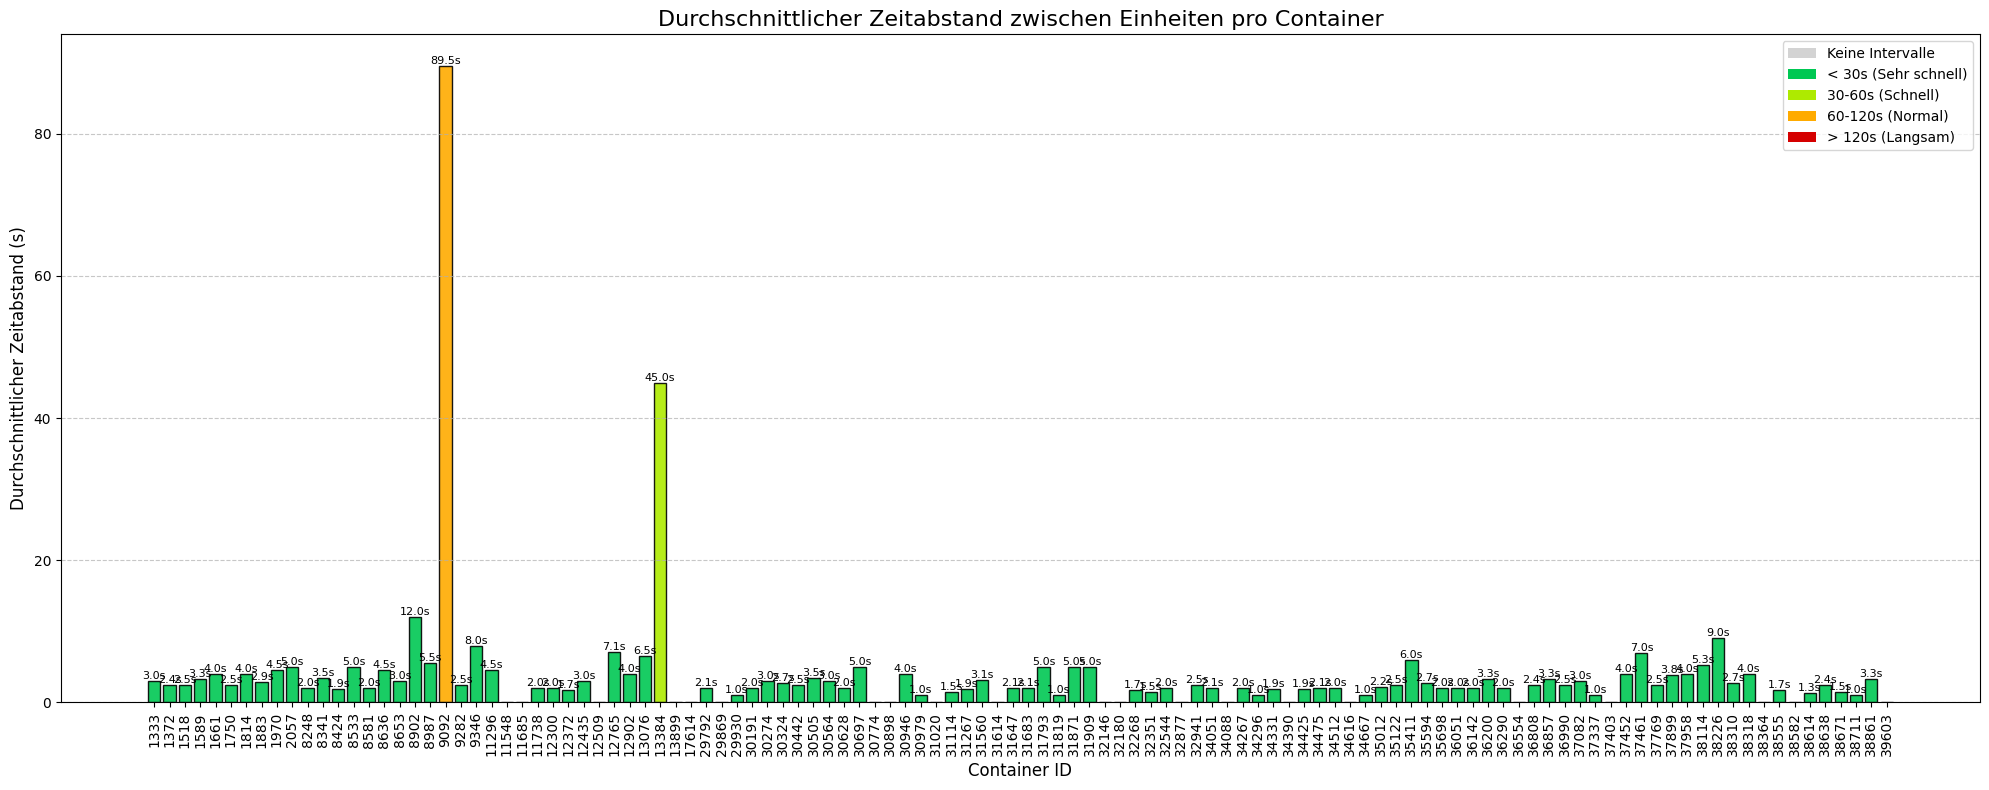

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 1. CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# Dieselben bewährten Parameter wie in allen Analysen.
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Intervall-Statistik pro Container
# Die gesamte Logik von der Einheiten-Erkennung bis zur Aggregation ist nun in SQL.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs zuordnen (konsistente Methode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 2: Stabile Plateaus mittels "Stabilitätsfenster" finden
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
-- Schritt 3: Nur die Startpunkte jedes stabilen Plateaus identifizieren
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
-- Schritt 4: "Deltas" (Gewichtssprünge) berechnen
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
-- Schritt 5: Das mediane Stückgewicht DYNAMISCH für JEDEN Container ermitteln
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
-- Schritt 6: Finale Auswahl der gültigen Einheiten-Zeitpunkte
gueltige_einheiten AS (
    SELECT
        pd.container_id,
        pd.timestamp
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- Schritt 7: Zeitintervalle zwischen den Einheiten in SQL berechnen
einheiten_intervalle AS (
    SELECT
        container_id,
        (JULIANDAY(timestamp) - JULIANDAY(LAG(timestamp, 1) OVER (PARTITION BY container_id ORDER BY timestamp))) * 86400.0 AS intervall_sec
    FROM gueltige_einheiten
),
-- Schritt 8: Ergebnisse pro Container aggregieren
aggregierte_stats AS (
    SELECT
        container_id,
        AVG(intervall_sec) AS avg_interval_sec,
        COUNT(intervall_sec) AS anzahl_intervals
    FROM einheiten_intervalle
    GROUP BY container_id
)
-- Schritt 9: Finale Zusammenführung, um sicherzustellen, dass alle Container enthalten sind
SELECT
    gc.container_id,
    COALESCE(ags.avg_interval_sec, 0) AS avg_interval_sec,
    COALESCE(ags.anzahl_intervals, 0) AS anzahl_intervals
FROM gueltige_container gc
LEFT JOIN aggregierte_stats ags ON gc.container_id = ags.container_id
ORDER BY gc.container_id;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
intervals_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)
intervals_df['avg_interval_sec'] = intervals_df['avg_interval_sec'].round(1)
intervals_df['anzahl_intervals'] = intervals_df['anzahl_intervals'].astype(int)

# ------------------------------------------------------------------
# 4. Konsistenz-Prüfung und Statistik
# ------------------------------------------------------------------
print("=== KONSISTENZ-PRÜFUNG (Hybrid-Algorithmus) ===")
print(f"Gesamtanzahl der gültigen Container im Datensatz: {len(intervals_df)}")
print(f"Container mit messbaren Intervallen: {len(intervals_df[intervals_df['anzahl_intervals'] > 0])}")

valid_intervals = intervals_df[intervals_df['anzahl_intervals'] > 0]['avg_interval_sec']
if not valid_intervals.empty:
    print(f"\n=== Statistik der {len(valid_intervals)} messbaren Zeitintervalle ===")
    print(f"Durchschnittliches Intervall: {valid_intervals.mean():.1f}s")
    print(f"Median Intervall: {valid_intervals.median():.1f}s")

    einheiten_pro_minute = 60 / valid_intervals.mean()
    print(f"Durchschnittliche Arbeitsgeschwindigkeit: {einheiten_pro_minute:.1f} Einheiten/Minute")
else:
    print("\nKeine gültigen Intervalle zur Berechnung von Statistiken gefunden.")

# ------------------------------------------------------------------
# 6. Visualisierung
# ------------------------------------------------------------------
plt.figure(figsize=(20, 8))

bar_colors = []
for _, row in intervals_df.iterrows():
    interval = row['avg_interval_sec']
    if row['anzahl_intervals'] == 0:
        bar_colors.append('#D3D3D3')  # Grau für Container ohne Intervalle
    elif interval < 30:
        bar_colors.append('#00C853')  # Grün
    elif interval < 60:
        bar_colors.append('#AEEA00')  # Hellgrün
    elif interval < 120:
        bar_colors.append('#FFAB00')  # Orange
    else:
        bar_colors.append('#D50000')  # Rot

bars = plt.bar(
    intervals_df['container_id'].astype(str),
    intervals_df['avg_interval_sec'],
    color=bar_colors,
    edgecolor='black',
    alpha=0.9
)

plt.xlabel('Container ID', fontsize=12)
plt.ylabel('Durchschnittlicher Zeitabstand (s)', fontsize=12)
plt.title('Durchschnittlicher Zeitabstand zwischen Einheiten pro Container', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Beschriftungen
for bar, row in zip(bars, intervals_df.itertuples()):
    if row.anzahl_intervals > 0:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.1f}s", ha='center', va='bottom', fontsize=8)

# Legende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#D3D3D3', label='Keine Intervalle'),
    Patch(facecolor='#00C853', label='< 30s (Sehr schnell)'),
    Patch(facecolor='#AEEA00', label='30-60s (Schnell)'),
    Patch(facecolor='#FFAB00', label='60-120s (Normal)'),
    Patch(facecolor='#D50000', label='> 120s (Langsam)')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


# 7.Zeit zwischen Containerbefüllungen


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Zeit, die zwischen dem Ende der Befüllung eines Containers und dem Beginn der Befüllung des nächsten Containers vergeht. Das Ziel ist es, die Effizienz der "Wechselzeiten" zu messen, also wie schnell ein neuer Wiegevorgang nach Abschluss des vorherigen gestartet wird. Die gesamte Logik zur Identifizierung der Container und ihrer Zeiträume ist in einer einzigen SQL-Abfrage gekapselt, während Python für die Berechnung der Intervalle und die Visualisierung der Ergebnisse zuständig ist.

### **Methodik**

Die Methodik ist darauf ausgelegt, konsistent und effizient zu sein:

1.  **Container-Identifikation per SQL:** Eine einzige, umfassende SQL-Abfrage identifiziert zunächst alle "gültigen" Wiegebehälter basierend auf dem vordefinierten Gewichtsbereich (7-12 kg).
2.  **Ermittlung der Zeiträume:** Für jeden dieser gültigen Container ermittelt dieselbe SQL-Abfrage den exakten Startzeitpunkt (`MIN(timestamp)`) und Endzeitpunkt (`MAX(timestamp)`) des Befüllvorgangs.
3.  **Intervall-Berechnung in Python:** Die resultierende Liste von Containern mit ihren Zeiträumen wird in Python (Pandas) geladen. Dort wird die Differenz zwischen der `end_time` eines Containers und der `start_time` des unmittelbar folgenden Containers berechnet, um die Wechselzeit zu erhalten.

Dieser Ansatz stellt sicher, dass dieselbe konsistente Methode zur Definition eines "Containers" wie in allen vorherigen Analysen verwendet wird.

### **Konstanten**

Im Gegensatz zu den vorherigen Analysen zur Stückzählung verwendet dieser spezifische Code **keine anpassbaren Algorithmus-Parameter** (wie `FENSTERGROESSE` oder `TOLERANZ_PROZENT`).

Die Logik ist fest in der SQL-Abfrage definiert, die auf zwei impliziten Konstanten basiert:
* **Tara-Schwelle (`-400g`):** Dient zur Erkennung eines neuen Containers.
* **Gültiger Gewichtsbereich (`7000g` - `12000g`):** Dient zur Filterung von fehlerhaften oder irrelevanten Wiegevorgängen.

=== KONSISTENZ-PRÜFUNG ===
Analysierte gültige Container insgesamt: 114
Container mit berechenbaren und realistischen Intervallen (>1s): 112

=== Tabelle: Zeit zwischen Containerbefüllungen (bereinigt) ===
Erste 20 Container-Wechsel-Intervalle:
 container_id                   end_time                 next_start  time_to_next_sec
         1333 2025-09-02 14:22:09.049000 2025-09-02 14:22:14.048200               5.0
         1372 2025-09-02 14:22:27.012300 2025-09-02 14:22:58.048300              31.0
         1518 2025-09-02 14:23:12.040400 2025-09-02 14:23:19.085700               7.0
         1589 2025-09-02 14:23:36.023800 2025-09-02 14:23:43.075000               7.1
         1661 2025-09-02 14:23:55.048300 2025-09-02 14:24:02.058000               7.0
         1750 2025-09-02 14:24:15.020200 2025-09-02 14:24:21.047400               6.0
         1814 2025-09-02 14:24:36.053300 2025-09-02 14:24:44.009400               8.0
         1883 2025-09-02 14:24:59.025400 2025-09-02 14:25:06.079900

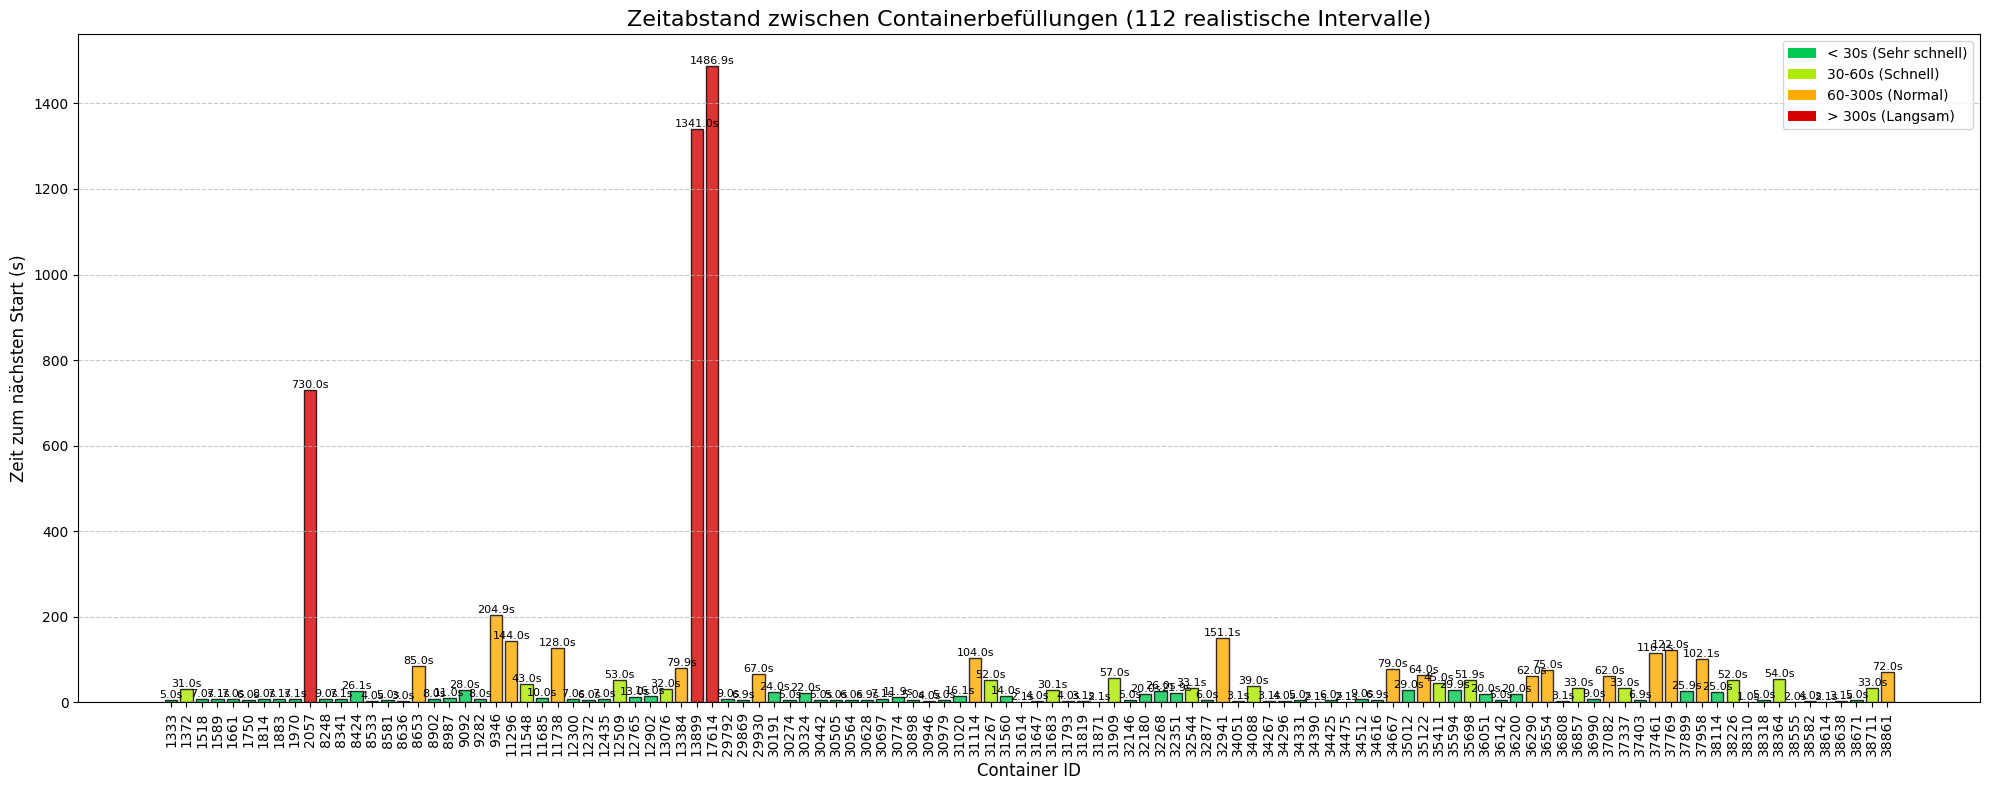

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Intervall-Statistik in einer einzigen Abfrage
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-Details (Start-/Endzeit) für jeden gültigen Container ermitteln
container_details AS (
    WITH
    container_zuordnung AS (
        SELECT
            timestamp,
            weight_g,
            SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
                OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
        FROM messungen
    ),
    container_mit_id AS (
        SELECT
            timestamp,
            weight_g,
            (container_id_roh + 1) AS container_id
        FROM container_zuordnung
    ),
    gueltige_container AS (
        SELECT container_id
        FROM container_mit_id
        GROUP BY container_id
        HAVING MAX(weight_g) BETWEEN 7000 AND 12000
    )
    SELECT
        gc.container_id,
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
    ORDER BY gc.container_id
),
-- Schritt 2: Leerlaufzeiten (Intervalle) zwischen den Containern berechnen
container_intervalle AS (
    SELECT
        container_id,
        end_time,
        LEAD(start_time, 1) OVER (ORDER BY start_time) AS next_start,
        (JULIANDAY(LEAD(start_time, 1) OVER (ORDER BY start_time)) - JULIANDAY(end_time)) * 86400.0 AS time_to_next_sec
    FROM container_details
),
-- Schritt 3: Unrealistische Werte filtern (> 1s)
gefilterte_intervalle AS (
    SELECT
        container_id,
        end_time,
        next_start,
        time_to_next_sec
    FROM container_intervalle
    WHERE time_to_next_sec IS NOT NULL AND time_to_next_sec > 1
),
-- Schritt 4: Gesamtanzahl der gültigen Container separat zählen
gesamtzahl AS (
    SELECT COUNT(*) as total_count FROM container_details
)
-- Schritt 5: Finale Auswahl, bei der die Gesamtanzahl zu jeder Zeile hinzugefügt wird
SELECT
    fi.container_id,
    fi.end_time,
    fi.next_start,
    fi.time_to_next_sec,
    gz.total_count
FROM gefilterte_intervalle fi
CROSS JOIN gesamtzahl gz;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
intervals_df = pd.read_sql_query(haupt_sql_abfrage, verbindung, parse_dates=['end_time', 'next_start'])
intervals_df['time_to_next_sec'] = intervals_df['time_to_next_sec'].round(1)

# ------------------------------------------------------------------
# 4. Konsistenz-Prüfung und detaillierte Analyse
# ------------------------------------------------------------------
# Die separate Abfrage zur Zählung wurde entfernt.
total_valid_containers = 0
if not intervals_df.empty:
    # Extrahiere die Gesamtanzahl aus der ersten Zeile des Ergebnisses
    total_valid_containers = intervals_df['total_count'].iloc[0]
    # Entferne die Hilfsspalte
    intervals_df = intervals_df.drop(columns=['total_count'])

print(f"=== KONSISTENZ-PRÜFUNG ===")
print(f"Analysierte gültige Container insgesamt: {total_valid_containers}")
print(f"Container mit berechenbaren und realistischen Intervallen (>1s): {len(intervals_df)}")

# ------------------------------------------------------------------
# 5. Tabelle ausgeben
# ------------------------------------------------------------------
print(f"\n=== Tabelle: Zeit zwischen Containerbefüllungen (bereinigt) ===")
print("Erste 20 Container-Wechsel-Intervalle:")
print(intervals_df[['container_id', 'end_time', 'next_start', 'time_to_next_sec']].head(20).to_string(index=False))

# ------------------------------------------------------------------
# 6. Statistische Auswertung
# ------------------------------------------------------------------
if not intervals_df.empty:
    print(f"\n=== Statistik der Container-Wechselzeiten (bereinigt) ===")
    print(f"Durchschnittliches Wechsel-Intervall: {intervals_df['time_to_next_sec'].mean():.1f}s")
    print(f"Median Wechsel-Intervall: {intervals_df['time_to_next_sec'].median():.1f}s")
    print(f"Kürzeste Wechselzeit: {intervals_df['time_to_next_sec'].min():.1f}s")
    print(f"Längste Wechselzeit: {intervals_df['time_to_next_sec'].max():.1f}s")

    containers_per_minute = 60 / intervals_df['time_to_next_sec'].mean()
    print(f"\nDurchschnittliche Container-Wechselrate: {containers_per_minute:.1f} Container/Minute")
else:
    print("\nKeine realistischen Intervalle für die Statistik gefunden.")

# ------------------------------------------------------------------
# 7. Visualisierung
# ------------------------------------------------------------------
if not intervals_df.empty:
    plt.figure(figsize=(20, 8))

    colors = []
    for interval in intervals_df['time_to_next_sec']:
        if interval < 30:
            colors.append('#00C853')
        elif interval < 60:
            colors.append('#AEEA00')
        elif interval < 300:
            colors.append('#FFAB00')
        else:
            colors.append('#D50000')

    bars = plt.bar(
        intervals_df['container_id'].astype(str),
        intervals_df['time_to_next_sec'],
        color=colors,
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Container ID', fontsize=12)
    plt.ylabel('Zeit zum nächsten Start (s)', fontsize=12)
    plt.title(f'Zeitabstand zwischen Containerbefüllungen ({len(intervals_df)} realistische Intervalle)', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval}s", ha='center', va='bottom', fontsize=8)

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#00C853', label='< 30s (Sehr schnell)'),
        Patch(facecolor='#AEEA00', label='30-60s (Schnell)'),
        Patch(facecolor='#FFAB00', label='60-300s (Normal)'),
        Patch(facecolor='#D50000', label='> 300s (Langsam)')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 8. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#8.Durchschnittlicher Leerlauf pro Schicht

=== Statistische Gesamtauswertung (bereinigt) ===
Durchschnittlicher Gesamt-Leerlauf: 59.4s
Gesamtanzahl der Container: 114

=== Tabelle: Statistiken pro Schicht ===
                   schicht  anzahl_container  avg_leerlauf_sec
Tagesschicht (06:00-17:59)               114              59.4
Nachtschicht (18:00-05:59)                 0               0.0


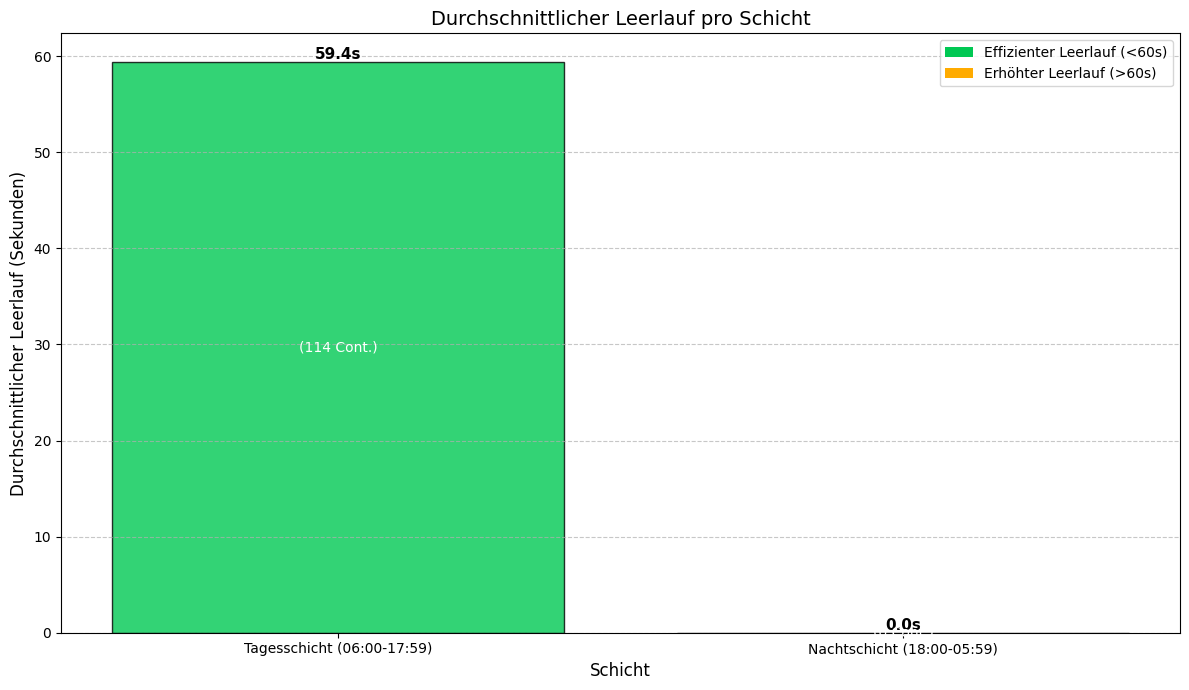

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Leerlauf-Statistik pro Schicht
# Die gesamte Logik ist nun in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-Details (Start-/Endzeit) für jeden gültigen Container ermitteln
container_details AS (
    WITH
    container_zuordnung AS (
        SELECT
            timestamp,
            weight_g,
            SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
                OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
        FROM messungen
    ),
    container_mit_id AS (
        SELECT
            timestamp,
            weight_g,
            (container_id_roh + 1) AS container_id
        FROM container_zuordnung
    ),
    gueltige_container AS (
        SELECT container_id
        FROM container_mit_id
        GROUP BY container_id
        HAVING MAX(weight_g) BETWEEN 7000 AND 12000
    )
    SELECT
        gc.container_id,
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 2: Leerlaufzeiten (Intervalle) zwischen den Containern berechnen
container_intervalle AS (
    SELECT
        end_time,
        (JULIANDAY(LEAD(start_time, 1) OVER (ORDER BY start_time)) - JULIANDAY(end_time)) * 86400.0 AS leerlauf_sec
    FROM container_details
),
-- Schritt 3: Jedem Intervall und jedem Container eine Schicht zuordnen
daten_mit_schicht AS (
    SELECT
        leerlauf_sec,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_intervalle
    WHERE leerlauf_sec IS NOT NULL AND leerlauf_sec > 1 -- Realistische Intervalle filtern
),
container_mit_schicht AS (
    SELECT
        container_id,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
),
-- Schritt 4: Statistiken pro Schicht aggregieren
leerlauf_stats AS (
    SELECT
        schicht,
        AVG(leerlauf_sec) AS avg_leerlauf_sec,
        -- Median kann in SQL (SQLite) nicht direkt berechnet werden, daher lassen wir ihn hier weg
        COUNT(*) as anzahl_intervalle
    FROM daten_mit_schicht
    GROUP BY schicht
),
container_stats AS (
    SELECT
        schicht,
        COUNT(*) as anzahl_container
    FROM container_mit_schicht
    GROUP BY schicht
)
-- Schritt 5: Finale Zusammenführung der Ergebnisse
SELECT
    s.schicht,
    COALESCE(cs.anzahl_container, 0) AS anzahl_container,
    COALESCE(ls.avg_leerlauf_sec, 0) AS avg_leerlauf_sec,
    COALESCE(ls.anzahl_intervalle, 0) AS anzahl_intervalle
FROM (
    SELECT 'Tagesschicht (06:00-17:59)' AS schicht
    UNION ALL
    SELECT 'Nachtschicht (18:00-05:59)' AS schicht
) s
LEFT JOIN container_stats cs ON s.schicht = cs.schicht
LEFT JOIN leerlauf_stats ls ON s.schicht = ls.schicht;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
final_stats = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# Runden und Datentypen für eine saubere Darstellung
final_stats = final_stats.round({'avg_leerlauf_sec': 1})
final_stats['anzahl_container'] = final_stats['anzahl_container'].astype(int)
final_stats['anzahl_intervalle'] = final_stats['anzahl_intervalle'].astype(int)

# ------------------------------------------------------------------
# 4. Gesamtauswertung und Tabelle
# ------------------------------------------------------------------
print(f"=== Statistische Gesamtauswertung (bereinigt) ===")

# Korrekte Berechnung des gewichteten Durchschnitts
total_intervals = final_stats['anzahl_intervalle'].sum()
if total_intervals > 0:
    weighted_avg = (final_stats['avg_leerlauf_sec'] * final_stats['anzahl_intervalle']).sum() / total_intervals
    print(f"Durchschnittlicher Gesamt-Leerlauf: {weighted_avg:.1f}s")
else:
    print("Durchschnittlicher Gesamt-Leerlauf: 0.0s")

print(f"Gesamtanzahl der Container: {final_stats['anzahl_container'].sum()}")

print(f"\n=== Tabelle: Statistiken pro Schicht ===")
print(final_stats[['schicht', 'anzahl_container', 'avg_leerlauf_sec']].to_string(index=False))

# ------------------------------------------------------------------
# 5. Visualisierung
# ------------------------------------------------------------------
if not final_stats.empty:
    plt.figure(figsize=(12, 7))
    colors = ['#FFAB00' if avg > 60 else '#00C853' for avg in final_stats['avg_leerlauf_sec']]

    bars = plt.bar(
        final_stats['schicht'],
        final_stats['avg_leerlauf_sec'],
        color=colors,
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Schicht', fontsize=12)
    plt.ylabel('Durchschnittlicher Leerlauf (Sekunden)', fontsize=12)
    plt.title('Durchschnittlicher Leerlauf pro Schicht', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar, row in zip(bars, final_stats.itertuples()):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.1f}s", ha='center', va='bottom', fontsize=11, weight='bold')
        plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"({row.anzahl_container} Cont.)", ha='center', va='center', fontsize=10, color='white')

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#00C853', label='Effizienter Leerlauf (<60s)'),
        Patch(facecolor='#FFAB00', label='Erhöhter Leerlauf (>60s)')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 6. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



# 9.Minimales Stückgewicht im Container


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Wiegedaten, um für jeden einzelnen Container das **Gewicht des kleinsten hinzugefügten Stücks** zu ermitteln. Das Ziel ist es, Ausreißer nach unten zu identifizieren und die Konsistenz des Produkts zu überprüfen. Die gesamte komplexe Logik zur Identifizierung jedes einzelnen Stücks ist in einer SQL-Abfrage gekapselt, während Python zur Aggregation (Finden des Minimums) und Visualisierung verwendet wird.

### **Methodik: Hybrider Algorithmus**

Der Code verwendet unsere etablierte, zweistufige Methode, um zunächst alle gültigen "Stücke" (Gewichtssprünge) zu identifizieren:

1.  **Plateau-Erkennung mittels "Stabilitätsfenster"**: Der Algorithmus findet stabile Gewichtszustände ("Plateaus"), indem er kurze Zeitfenster identifiziert, in denen die Gewichtsschwankung minimal ist.

2.  **Stück-Identifikation mittels "Delta-Analyse"**:
    * **Gewichtssprünge (Deltas):** Der Code berechnet die Gewichtsunterschiede zwischen den erkannten Plateaus.
    * **Dynamische Validierung:** Für jeden Container wird das typische (mediane) Stückgewicht ermittelt. Nur die Gewichtssprünge, die in einen Toleranzbereich um diesen Wert fallen, werden als gültige, einzelne Stücke anerkannt.

3.  **Ermittlung des Minimums:** Nachdem die SQL-Abfrage eine Liste aller gültigen Stückgewichte zurückgegeben hat, gruppiert der Python-Code diese nach Container und ermittelt für jeden Container den kleinsten Wert (`min()`).

### **Konstanten: Die Stellschrauben des Algorithmus**

* **`FENSTERGROESSE_MESSUNGEN` (Wert: 5):** Definiert die Dauer (in Messungen) des Zeitfensters, das zur Prüfung der Gewichts-Stabilität verwendet wird.
* **`MAXIMALE_SCHWANKUNG_G` (Wert: 20g):** Die maximal erlaubte Gewichtsschwankung innerhalb des Fensters, damit es als "stabil" gilt. Dies filtert Sensorrauschen heraus.
* **`MINIMALES_DELTA_G` / `MAXIMALES_DELTA_G` (Werte: 500g / 4000g):** Definieren den plausiblen Gewichtsbereich für eine einzelne Einheit. Dies hilft, fehlerhafte Messungen zu ignorieren.
* **`TOLERANZ_PROZENT` (Wert: 0.40):** Ein Toleranzbereich von ±40% um das dynamisch ermittelte Stückgewicht. Ein Gewichtssprung wird nur dann als gültiges Stück anerkannt, wenn er in diesen Bereich fällt.

=== Analyse: Minimales Stückgewicht pro Container ===
Analysierte gültige Container: 114
Container mit gefundenen Stücken: 100

Durchschnittliches Mindest-Stückgewicht: 1715g
Median des Mindest-Stückgewichts: 1725g

--- Tabelle (erste 20 Container mit Stücken) ---
 container_id  min_stueckgewicht_g  anzahl_stuecke
         1333                 2200               3
         1372                 2050               4
         1518                 1850               3
         1589                 1400               4
         1661                 2050               3
         1750                 2200               3
         1814                 2100               3
         1883                 1850               2
         1970                 1050               7
         2057                 1450               3
         8248                 1550               4
         8341                 1249               3
         8424                 2600               2
         8533        

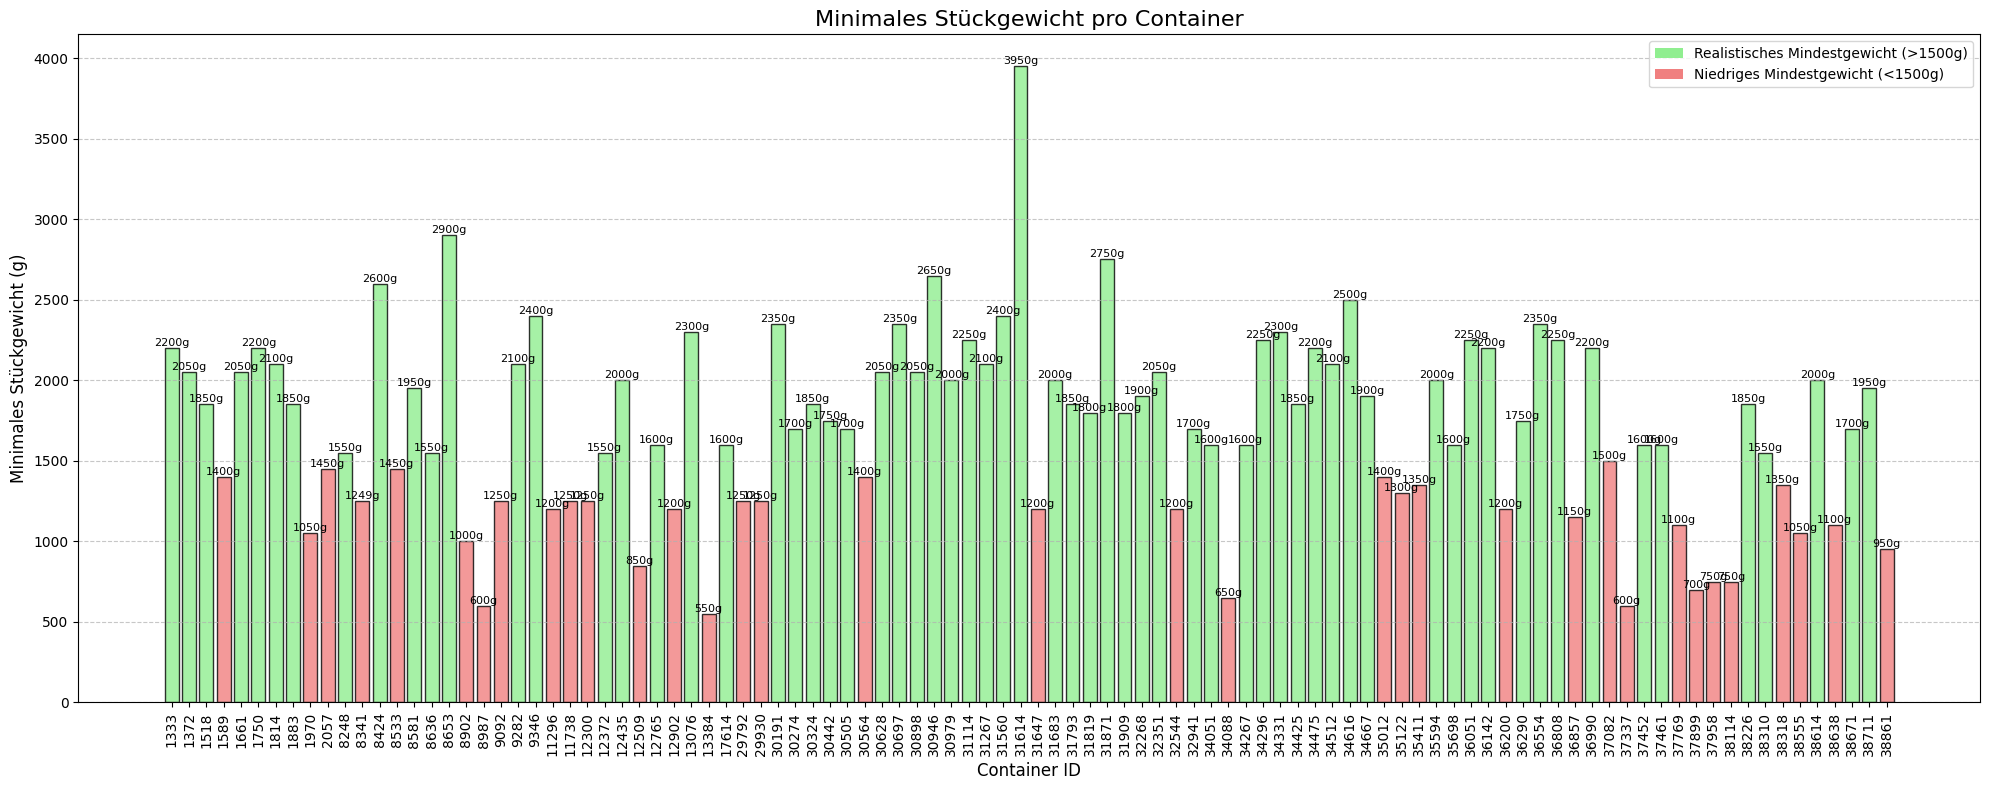

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# Dieselben bewährten Parameter wie in allen Analysen.
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet das minimale Stückgewicht pro Container
# Die gesamte Logik, inklusive des Joins für alle Container, ist nun in einer Abfrage.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs zuordnen (konsistente Methode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 2: Stabile Plateaus mittels "Stabilitätsfenster" finden
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
-- Schritt 3: Nur die Startpunkte jedes stabilen Plateaus identifizieren
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
-- Schritt 4: "Deltas" (Gewichtssprünge) berechnen
plateau_deltas AS (
    SELECT container_id,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
-- Schritt 5: Das mediane Stückgewicht DYNAMISCH für JEDEN Container ermitteln
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
-- Schritt 6: Finale Auswahl der gültigen Stücke
gueltige_stuecke AS (
    SELECT
        pd.container_id,
        pd.delta_g AS stueckgewicht_g
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- Schritt 7: Aggregation - Minimales Stückgewicht für die Container, die Stücke haben
aggregierte_stats AS (
    SELECT
        container_id,
        MIN(stueckgewicht_g) AS min_stueckgewicht_g,
        COUNT(*) AS anzahl_stuecke
    FROM gueltige_stuecke
    GROUP BY container_id
)
-- Schritt 8: Finale Zusammenführung, um alle 114 Container im Ergebnis zu haben
SELECT
    gc.container_id,
    COALESCE(ags.min_stueckgewicht_g, 0) AS min_stueckgewicht_g,
    COALESCE(ags.anzahl_stuecke, 0) AS anzahl_stuecke
FROM gueltige_container gc
LEFT JOIN aggregierte_stats ags ON gc.container_id = ags.container_id
ORDER BY gc.container_id;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
final_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)
final_df['min_stueckgewicht_g'] = final_df['min_stueckgewicht_g'].astype(int)
final_df['anzahl_stuecke'] = final_df['anzahl_stuecke'].astype(int)

# ------------------------------------------------------------------
# 4. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Minimales Stückgewicht pro Container ===")
print(f"Analysierte gültige Container: {len(final_df)}")
display_df = final_df[final_df['anzahl_stuecke'] > 0]
print(f"Container mit gefundenen Stücken: {len(display_df)}")

if not display_df.empty:
    print(f"\nDurchschnittliches Mindest-Stückgewicht: {display_df['min_stueckgewicht_g'].mean():.0f}g")
    print(f"Median des Mindest-Stückgewichts: {display_df['min_stueckgewicht_g'].median():.0f}g")

    print("\n--- Tabelle (erste 20 Container mit Stücken) ---")
    print(display_df.head(20).to_string(index=False))
else:
    print("Keine Stücke in den Containern gefunden.")

# ------------------------------------------------------------------
# 5. Visualisierung des minimalen Stückgewichts
# ------------------------------------------------------------------
if not display_df.empty:
    plt.figure(figsize=(20, 8))

    colors = ['lightgreen' if w > 1500 else 'lightcoral' for w in display_df['min_stueckgewicht_g']]

    bars = plt.bar(
        display_df['container_id'].astype(str),
        display_df['min_stueckgewicht_g'],
        color=colors,
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Container ID', fontsize=12)
    plt.ylabel('Minimales Stückgewicht (g)', fontsize=12)
    plt.title('Minimales Stückgewicht pro Container', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{int(yval)}g", ha='center', va='bottom', fontsize=8)

    # Legende
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgreen', label='Realistisches Mindestgewicht (>1500g)'),
        Patch(facecolor='lightcoral', label='Niedriges Mindestgewicht (<1500g)')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 6. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#10.Maximales Stückgewicht im Container



### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Wiegedaten, um für jeden einzelnen Container das **Gewicht des größten hinzugefügten Stücks** zu ermitteln. Das Ziel ist es, Ausreißer nach oben zu identifizieren und die Konsistenz des Produkts innerhalb eines Containers zu überprüfen. Die gesamte komplexe Logik zur Identifizierung jedes einzelnen gültigen Stücks ist in einer SQL-Abfrage gekapselt, während Python zur Aggregation (Finden des Maximums) und Visualisierung verwendet wird.

### **Methodik: Hybrider Algorithmus**

Der Code verwendet unsere etablierte, zweistufige Methode, um zunächst alle gültigen "Stücke" (Gewichtssprünge) zu identifizieren:

1.  **Plateau-Erkennung mittels "Stabilitätsfenster"**: Der Algorithmus findet stabile Gewichtszustände ("Plateaus"), indem er kurze Zeitfenster identifiziert, in denen die Gewichtsschwankung minimal ist.

2.  **Stück-Identifikation mittels "Delta-Analyse"**:
    * **Gewichtssprünge (Deltas):** Der Code berechnet die Gewichtsunterschiede zwischen den erkannten Plateaus.
    * **Dynamische Validierung:** Für jeden Container wird das typische (mediane) Stückgewicht ermittelt. Nur die Gewichtssprünge, die in einen Toleranzbereich um diesen Wert fallen, werden als gültige, einzelne Stücke anerkannt.

3.  **Ermittlung des Maximums:** Nachdem die SQL-Abfrage eine Liste aller gültigen Stückgewichte zurückgegeben hat, gruppiert der Python-Code diese nach Container und ermittelt für jeden Container den größten Wert (`max()`).

### **Konstanten: Die Stellschrauben des Algorithmus**

* **`FENSTERGROESSE_MESSUNGEN` (Wert: 5):** Definiert die Dauer (in Messungen) des Zeitfensters, das zur Prüfung der Gewichts-Stabilität verwendet wird.
* **`MAXIMALE_SCHWANKUNG_G` (Wert: 20g):** Die maximal erlaubte Gewichtsschwankung innerhalb des Fensters, damit es als "stabil" gilt. Dies filtert Sensorrauschen heraus.
* **`MINIMALES_DELTA_G` / `MAXIMALES_DELTA_G` (Werte: 500g / 4000g):** Definieren den plausiblen Gewichtsbereich für eine einzelne Einheit. Dies hilft, fehlerhafte Messungen zu ignorieren.
* **`TOLERANZ_PROZENT` (Wert: 0.40):** Ein Toleranzbereich von ±40% um das dynamisch ermittelte Stückgewicht. Ein Gewichtssprung wird nur dann als gültiges Stück anerkannt, wenn er in diesen Bereich fällt.

=== Analyse: Maximales Stückgewicht pro Container ===
Analysierte gültige Container: 114
Container mit gefundenen Stücken: 100

Durchschnittliches Maximal-Stückgewicht: 2344g
Median des Maximal-Stückgewichts: 2400g

--- Tabelle (erste 20 Container mit Stücken) ---
 container_id  max_stueckgewicht_g  anzahl_stuecke
         1333                 2450               3
         1372                 3100               4
         1518                 2200               3
         1589                 2400               4
         1661                 2750               3
         1750                 3000               3
         1814                 2850               3
         1883                 2300               2
         1970                 1800               7
         2057                 1950               3
         8248                 1700               4
         8341                 2050               3
         8424                 3250               2
         8533        

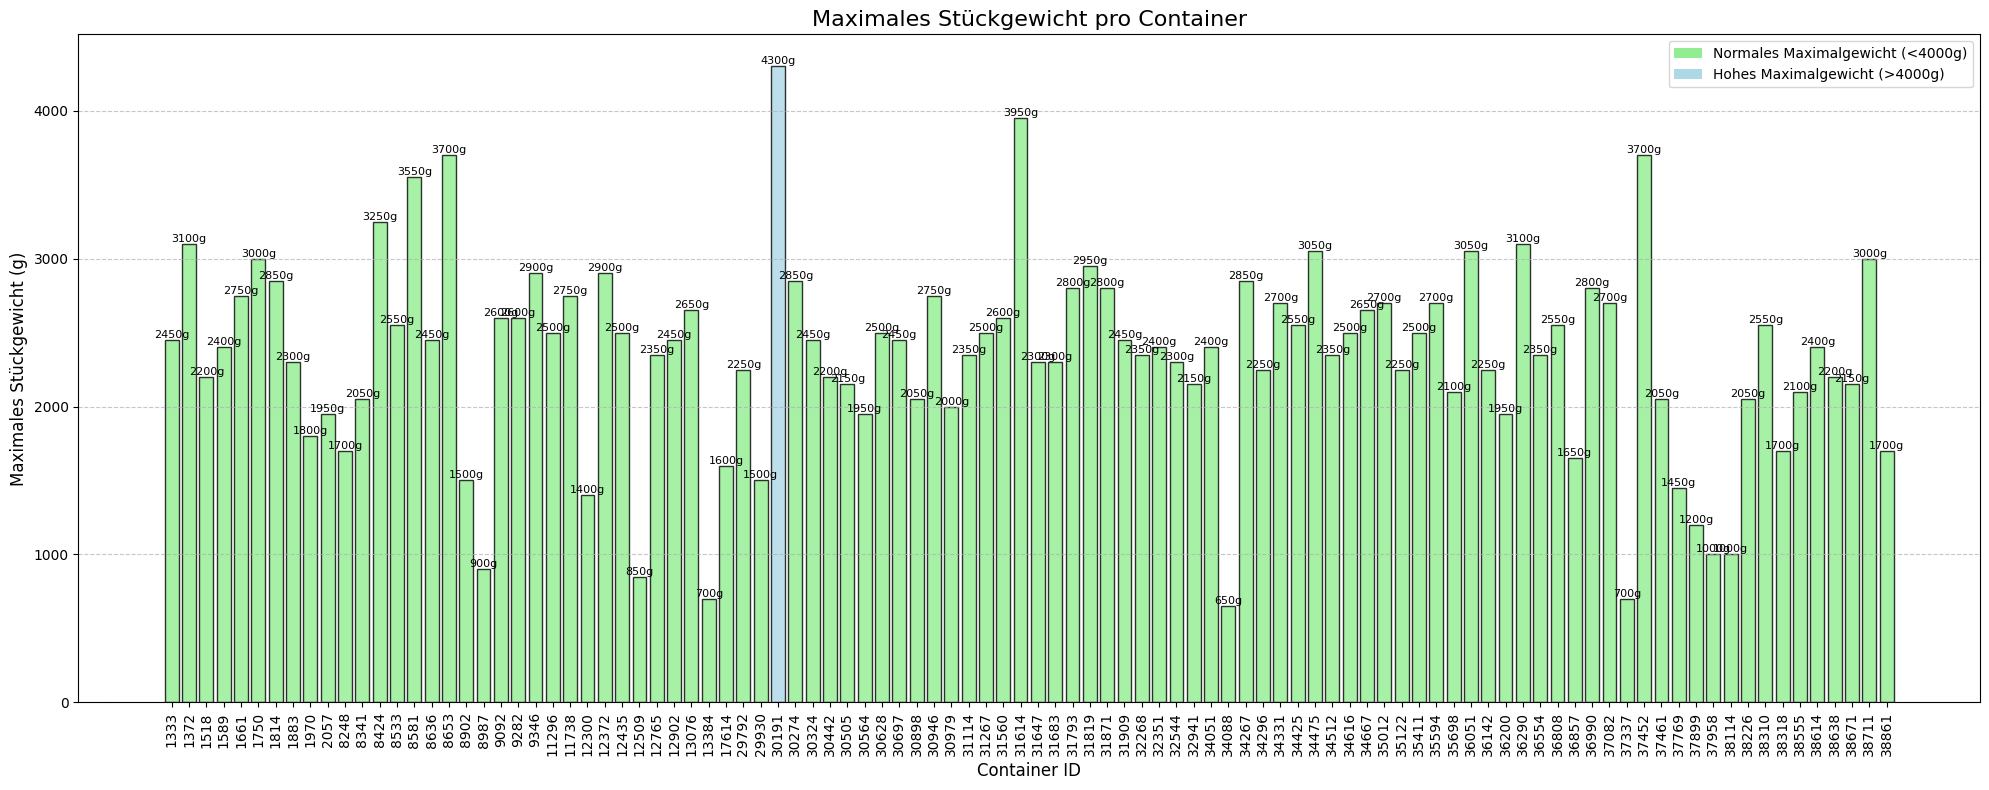

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# Dieselben bewährten Parameter wie in allen Analysen.
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet das maximale Stückgewicht pro Container
# Die gesamte Logik, inklusive des Joins für alle Container, ist nun in einer Abfrage.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs zuordnen (konsistente Methode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 2: Stabile Plateaus mittels "Stabilitätsfenster" finden
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
-- Schritt 3: Nur die Startpunkte jedes stabilen Plateaus identifizieren
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
-- Schritt 4: "Deltas" (Gewichtssprünge) berechnen
plateau_deltas AS (
    SELECT container_id,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
-- Schritt 5: Das mediane Stückgewicht DYNAMISCH für JEDEN Container ermitteln
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
-- Schritt 6: Finale Auswahl der gültigen Stücke
gueltige_stuecke AS (
    SELECT
        pd.container_id,
        pd.delta_g AS stueckgewicht_g
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- Schritt 7: Aggregation - Maximales Stückgewicht für die Container, die Stücke haben
aggregierte_stats AS (
    SELECT
        container_id,
        MAX(stueckgewicht_g) AS max_stueckgewicht_g,
        COUNT(*) AS anzahl_stuecke
    FROM gueltige_stuecke
    GROUP BY container_id
)
-- Schritt 8: Finale Zusammenführung, um alle 114 Container im Ergebnis zu haben
SELECT
    gc.container_id,
    COALESCE(ags.max_stueckgewicht_g, 0) AS max_stueckgewicht_g,
    COALESCE(ags.anzahl_stuecke, 0) AS anzahl_stuecke
FROM gueltige_container gc
LEFT JOIN aggregierte_stats ags ON gc.container_id = ags.container_id
ORDER BY gc.container_id;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
final_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)
final_df['max_stueckgewicht_g'] = final_df['max_stueckgewicht_g'].astype(int)
final_df['anzahl_stuecke'] = final_df['anzahl_stuecke'].astype(int)

# ------------------------------------------------------------------
# 4. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Maximales Stückgewicht pro Container ===")
print(f"Analysierte gültige Container: {len(final_df)}")
display_df = final_df[final_df['anzahl_stuecke'] > 0]
print(f"Container mit gefundenen Stücken: {len(display_df)}")

if not display_df.empty:
    print(f"\nDurchschnittliches Maximal-Stückgewicht: {display_df['max_stueckgewicht_g'].mean():.0f}g")
    print(f"Median des Maximal-Stückgewichts: {display_df['max_stueckgewicht_g'].median():.0f}g")

    print("\n--- Tabelle (erste 20 Container mit Stücken) ---")
    print(display_df.head(20).to_string(index=False))
else:
    print("Keine Stücke in den Containern gefunden.")

# ------------------------------------------------------------------
# 5. Visualisierung des maximalen Stückgewichts
# ------------------------------------------------------------------
if not display_df.empty:
    plt.figure(figsize=(20, 8))

    colors = ['lightgreen' if w < 4000 else 'lightblue' for w in display_df['max_stueckgewicht_g']]

    bars = plt.bar(
        display_df['container_id'].astype(str),
        display_df['max_stueckgewicht_g'],
        color=colors,
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Container ID', fontsize=12)
    plt.ylabel('Maximales Stückgewicht (g)', fontsize=12)
    plt.title('Maximales Stückgewicht pro Container', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{int(yval)}g", ha='center', va='bottom', fontsize=8)

    # Legende
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgreen', label='Normales Maximalgewicht (<4000g)'),
        Patch(facecolor='lightblue', label='Hohes Maximalgewicht (>4000g)')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 6. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#Mitarbeiter-/Verarbeitungsbezogen:


#12.Gesamtanzahl der Einheiten pro Schicht


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Wiegedaten, um die **Gesamtanzahl der hinzugefügten Einheiten** (z.B. Kohlköpfe) pro Arbeitsschicht zu ermitteln. Die gesamte komplexe Logik zur Identifizierung jeder einzelnen Einheit ist in einer einzigen SQL-Abfrage gekapselt, während Python zur Schichtzuordnung und zur finalen Auswertung und Visualisierung der Ergebnisse verwendet wird.

### **Methodik: Hybrider Algorithmus**

Die Analyse erfolgt in drei Schritten, um Genauigkeit und Konsistenz zu gewährleisten:

1.  **Einheiten-Identifikation (per SQL):** Eine einzige, umfassende SQL-Abfrage ermittelt die exakten Zeitpunkte aller gültigen Einheiten. Dies geschieht durch:
    * **Plateau-Erkennung mittels "Stabilitätsfenster":** Findet stabile Gewichtszustände.
    * **Stück-Identifikation mittels "Delta-Analyse":** Berechnet die Gewichtssprünge (Deltas) zwischen den Plateaus, ermittelt dynamisch das typische Stückgewicht pro Container und validiert nur die Sprünge, die in einen Toleranzbereich um diesen Wert fallen. Das Ergebnis ist eine Liste mit den Zeitstempeln jeder einzelnen gültigen Einheit.

2.  **Schichtzuordnung (in Python):** Die resultierende Liste der Zeitstempel wird in Python geladen. Eine Funktion ordnet jeden Zeitstempel basierend auf der Uhrzeit entweder der "Tagesschicht" oder der "Nachtschicht" zu.

3.  **Zählung und Aggregation:** Der Code gruppiert die Einheiten nach der zugeordneten Schicht und zählt die Anzahl in jeder Kategorie. Um ein vollständiges Bild zu gewährleisten, wird sichergestellt, dass immer beide Schichten im Ergebnis angezeigt werden, auch wenn in einer Schicht keine Einheiten verarbeitet wurden.

### **Konstanten: Die Stellschrauben des Algorithmus**

* **`FENSTERGROESSE_MESSUNGEN` (Wert: 5):** Definiert die Dauer (in Messungen) des Zeitfensters, das zur Prüfung der Gewichts-Stabilität verwendet wird.
* **`MAXIMALE_SCHWANKUNG_G` (Wert: 20g):** Die maximal erlaubte Gewichtsschwankung innerhalb des Fensters, damit es als "stabil" gilt. Dies filtert Sensorrauschen heraus.
* **`MINIMALES_DELTA_G` / `MAXIMALES_DELTA_G` (Werte: 500g / 4000g):** Definieren den plausiblen Gewichtsbereich für eine einzelne Einheit, um das typische Stückgewicht zu ermitteln.
* **`TOLERANZ_PROZENT` (Wert: 0.40):** Ein Toleranzbereich von ±40% um das dynamisch ermittelte Stückgewicht. Ein Gewichtssprung wird nur dann als gültige Einheit anerkannt, wenn er in diesen Bereich fällt.
* **Schichtdefinitionen:**
    * **Tagesschicht:** `06:00` bis `17:59` Uhr.
    * **Nachtschicht:** `18:00` bis `05:59` Uhr.

=== Analyse: Gesamtanzahl der Einheiten pro Schicht ===
Gesamtanzahl gefundener Einheiten: 296

--- Tabelle: Anzahl Einheiten pro Schicht ---
                   schicht  anzahl_einheiten
Tagesschicht (06:00-17:59)               296
Nachtschicht (18:00-05:59)                 0


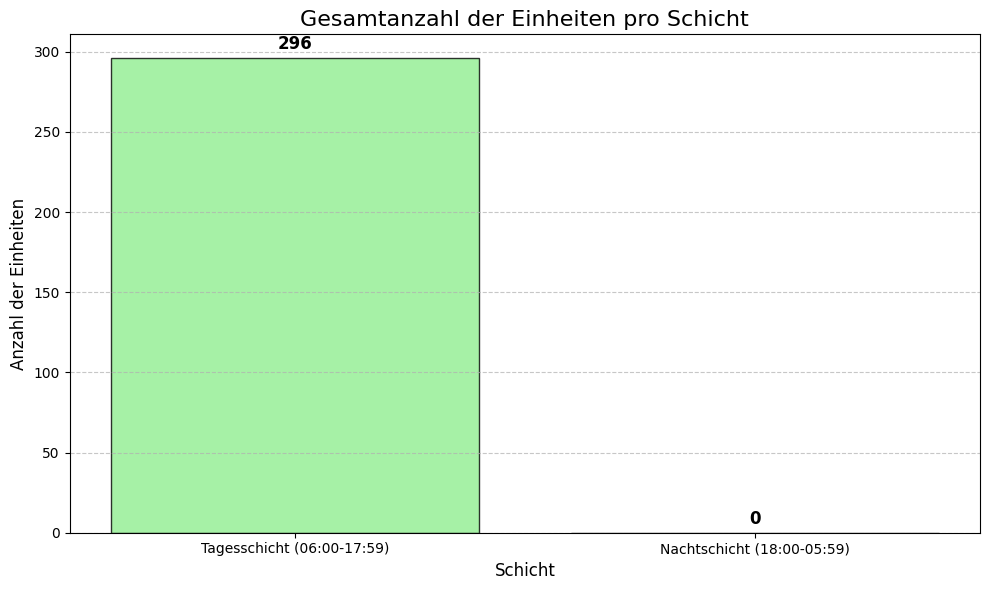

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# Dieselben bewährten Parameter wie in allen Analysen.
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Anzahl der Einheiten pro Schicht
# Die gesamte Logik von der Einheiten-Erkennung bis zur Zählung ist nun in SQL.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs zuordnen (konsistente Methode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 2: Stabile Plateaus mittels "Stabilitätsfenster" finden
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
-- Schritt 3: Nur die Startpunkte jedes stabilen Plateaus identifizieren
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
-- Schritt 4: "Deltas" (Gewichtssprünge) berechnen
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
-- Schritt 5: Das mediane Stückgewicht DYNAMISCH für JEDEN Container ermitteln
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
-- Schritt 6: Finale Auswahl der gültigen Einheiten
gueltige_einheiten AS (
    SELECT
        pd.timestamp
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- Schritt 7: Schichtzuordnung für jede Einheit
einheiten_mit_schicht AS (
    SELECT
        CASE
            WHEN CAST(strftime('%H', timestamp) AS INTEGER) >= 6 AND CAST(strftime('%H', timestamp) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM gueltige_einheiten
)
-- Schritt 8: Finale Zählung der Einheiten pro Schicht
SELECT
    schicht,
    COUNT(*) as anzahl_einheiten
FROM einheiten_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
schicht_zaehlung_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, schicht_zaehlung_gefunden, on='schicht', how='left').fillna(0)
final_stats['anzahl_einheiten'] = final_stats['anzahl_einheiten'].astype(int)

# ------------------------------------------------------------------
# 5. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Gesamtanzahl der Einheiten pro Schicht ===")
gesamte_einheiten = final_stats['anzahl_einheiten'].sum()
print(f"Gesamtanzahl gefundener Einheiten: {gesamte_einheiten}")

print("\n--- Tabelle: Anzahl Einheiten pro Schicht ---")
print(final_stats.to_string(index=False))

# ------------------------------------------------------------------
# 6. Visualisierung
# ------------------------------------------------------------------
if not final_stats.empty:
    plt.figure(figsize=(10, 6))

    bars = plt.bar(
        final_stats['schicht'],
        final_stats['anzahl_einheiten'],
        color=['#90EE90', '#ADD8E6'], # Hellgrün für Tag, Hellblau für Nacht
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Schicht', fontsize=12)
    plt.ylabel('Anzahl der Einheiten', fontsize=12)
    plt.title('Gesamtanzahl der Einheiten pro Schicht', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(final_stats['anzahl_einheiten']) * 0.01,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=12,
            weight='bold'
        )

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#13.Gesamtanzahl der Container pro Schicht (3.Anzahl befüllter Container pro Schicht)


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Wiegedaten, um die **Anzahl der befüllten Container pro Arbeitsschicht** zu ermitteln. Er ist darauf ausgelegt, eine konsistente Zählung zu gewährleisten und die Ergebnisse übersichtlich in einer Tabelle und einem Balkendiagramm darzustellen.

### **Methodik**

Die Analyse erfolgt in drei Schritten, um Genauigkeit und Konsistenz mit den anderen Auswertungen sicherzustellen:

1.  **Container-Identifikation (per SQL):** Eine einzige, umfassende SQL-Abfrage identifiziert zunächst alle "gültigen" Wiegebehälter. Dies geschieht durch:
    * **Erkennung:** Ein neuer Container wird erkannt, wenn das Gewicht unter die Tara-Schwelle (`< -400g`) fällt.
    * **Filterung:** Nur Container, deren maximales Gewicht im plausiblen Bereich von 7 bis 12 kg liegt, werden berücksichtigt.
    * **Zeiterfassung:** Für jeden gültigen Container wird der Endzeitpunkt (`MAX(timestamp)`) der Befüllung ermittelt.

2.  **Schichtzuordnung (in Python):** Die resultierende Liste von Containern mit ihrem jeweiligen Endzeitpunkt wird in Python verarbeitet. Eine Funktion ordnet jeden Container basierend auf seiner `end_time` entweder der "Tagesschicht" oder der "Nachtschicht" zu.

3.  **Zählung und Aggregation:** Der Code gruppiert die Container nach Schicht und zählt die Anzahl in jeder Kategorie. Um ein vollständiges Bild zu gewährleisten, wird sichergestellt, dass immer beide Schichten im Ergebnis angezeigt werden, auch wenn in einer Schicht keine Container verarbeitet wurden (in diesem Fall wird eine `0` angezeigt).

### **Konstanten**

Der Code basiert auf den folgenden festen Regeln und Schwellenwerten, die unsere etablierte Methodik definieren:

* **Tara-Schwelle (`-400g`):** Der Grenzwert in der SQL-Abfrage, der zur zuverlässigen Erkennung des Beginns eines neuen Wiegezyklus dient.
* **Gültiger Gewichtsbereich (`7000g` - `12000g`):** Der Gewichtsbereich in der SQL-Abfrage, der sicherstellt, dass nur plausible, vollständig befüllte Container in die Zählung einfließen.
* **Schichtdefinitionen:**
    * **Tagesschicht:** `06:00` bis `17:59` Uhr.
    * **Nachtschicht:** `18:00` bis `05:59` Uhr.

=== Analyse: Anzahl befüllter Container pro Schicht ===
Gesamtanzahl gültiger Container: 114

--- Tabelle: Anzahl Container pro Schicht ---
                   schicht  anzahl_container
Tagesschicht (06:00-17:59)               114
Nachtschicht (18:00-05:59)                 0


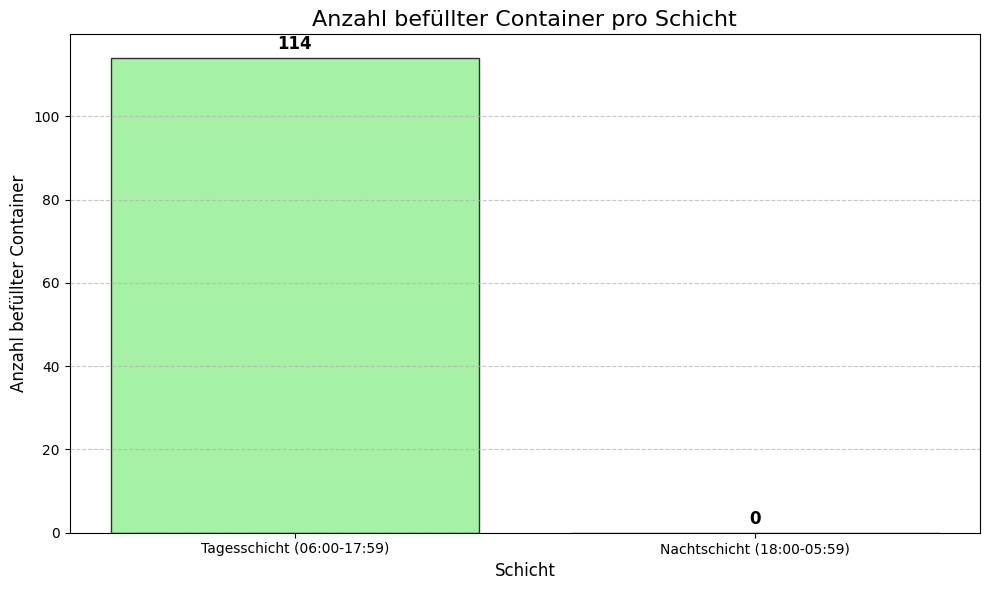

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Anzahl der Container pro Schicht
# Die gesamte Logik von der Container-Erkennung bis zur Zählung ist nun in SQL.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Den End-Zeitpunkt für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        gc.container_id,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 4: Schichtzuordnung für jeden Container
container_mit_schicht AS (
    SELECT
        *,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
)
-- Schritt 5: Finale Zählung der Container pro Schicht
SELECT
    schicht,
    COUNT(container_id) as anzahl_container
FROM container_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
schicht_zaehlung_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
schicht_zaehlung = pd.merge(alle_schichten_df, schicht_zaehlung_gefunden, on='schicht', how='left').fillna(0)
schicht_zaehlung['anzahl_container'] = schicht_zaehlung['anzahl_container'].astype(int)

# ------------------------------------------------------------------
# 5. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Anzahl befüllter Container pro Schicht ===")
gesamt_container = schicht_zaehlung['anzahl_container'].sum()
print(f"Gesamtanzahl gültiger Container: {gesamt_container}")

print("\n--- Tabelle: Anzahl Container pro Schicht ---")
print(schicht_zaehlung.to_string(index=False))

# ------------------------------------------------------------------
# 6. Visualisierung
# ------------------------------------------------------------------
if not schicht_zaehlung.empty:
    plt.figure(figsize=(10, 6))

    bars = plt.bar(
        schicht_zaehlung['schicht'],
        schicht_zaehlung['anzahl_container'],
        color=['#90EE90', '#ADD8E6'], # Hellgrün für Tag, Hellblau für Nacht
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Schicht', fontsize=12)
    plt.ylabel('Anzahl befüllter Container', fontsize=12)
    plt.title('Anzahl befüllter Container pro Schicht', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(schicht_zaehlung['anzahl_container']) * 0.01,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=12,
            weight='bold'
        )

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#14.Gesamtgewicht der produzierten Ware


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Wiegedaten, um das **Gesamtgewicht der produzierten Ware pro Arbeitsschicht** zu ermitteln. Er ist darauf ausgelegt, eine konsistente Berechnung zu gewährleisten und die Ergebnisse übersichtlich in einer Tabelle und einem Balkendiagramm darzustellen. Das Skript zeigt, wie viel Kilogramm Ware in der Tagesschicht im Vergleich zur Nachtschicht produziert wurde.

### **Methodik**

Die Analyse erfolgt in drei Schritten, um Genauigkeit und Konsistenz mit den anderen Auswertungen sicherzustellen:

1.  **Container-Identifikation (per SQL):** Eine einzige, umfassende SQL-Abfrage identifiziert zunächst alle "gültigen" Wiegebehälter. Dies geschieht durch:
    * **Erkennung:** Ein neuer Container wird erkannt, wenn das Gewicht unter die Tara-Schwelle (`< -400g`) fällt.
    * **Filterung:** Nur Container, deren maximales Gewicht im plausiblen Bereich von 7 bis 12 kg liegt, werden berücksichtigt.
    * **Gewichtsermittlung:** Für jeden gültigen Container wird das maximale Endgewicht (`MAX(weight_g)`) sowie der Endzeitpunkt (`MAX(timestamp)`) der Befüllung ermittelt.

2.  **Schichtzuordnung (in Python):** Die resultierende Liste von Containern wird in Python verarbeitet. Eine Funktion ordnet jeden Container basierend auf seiner `end_time` entweder der "Tagesschicht" oder der "Nachtschicht" zu.

3.  **Aggregation und Summierung:** Der Code gruppiert die Container nach der zugeordneten Schicht und summiert die Endgewichte (`gesamtgewicht_g`) für jede Kategorie. Um ein vollständiges Bild zu gewährleisten, wird sichergestellt, dass immer beide Schichten im Ergebnis angezeigt werden, auch wenn in einer Schicht keine Produktion stattfand.

### **Konstanten**

Der Code basiert auf den folgenden festen Regeln und Schwellenwerten, die unsere etablierte Methodik definieren:

* **Tara-Schwelle (`-400g`):** Der Grenzwert in der SQL-Abfrage, der zur zuverlässigen Erkennung des Beginns eines neuen Wiegezyklus dient.
* **Gültiger Gewichtsbereich (`7000g` - `12000g`):** Der Gewichtsbereich in der SQL-Abfrage, der sicherstellt, dass nur plausible, vollständig befüllte Container in die Zählung einfließen.
* **Schichtdefinitionen:**
    * **Tagesschicht:** `06:00` bis `17:59` Uhr.
    * **Nachtschicht:** `18:00` bis `05:59` Uhr.

=== Analyse: Produktivität pro Gewicht (kg/Stunde) ===
Gesamtproduktion: 1168.7 kg

--- Tabelle: Produktivität pro Schicht ---
                   schicht  gesamtgewicht_kg  arbeitsdauer_h  produktivitaet_kg_pro_h
Tagesschicht (06:00-17:59)            1168.7             2.3                    502.1
Nachtschicht (18:00-05:59)               0.0             0.0                      0.0


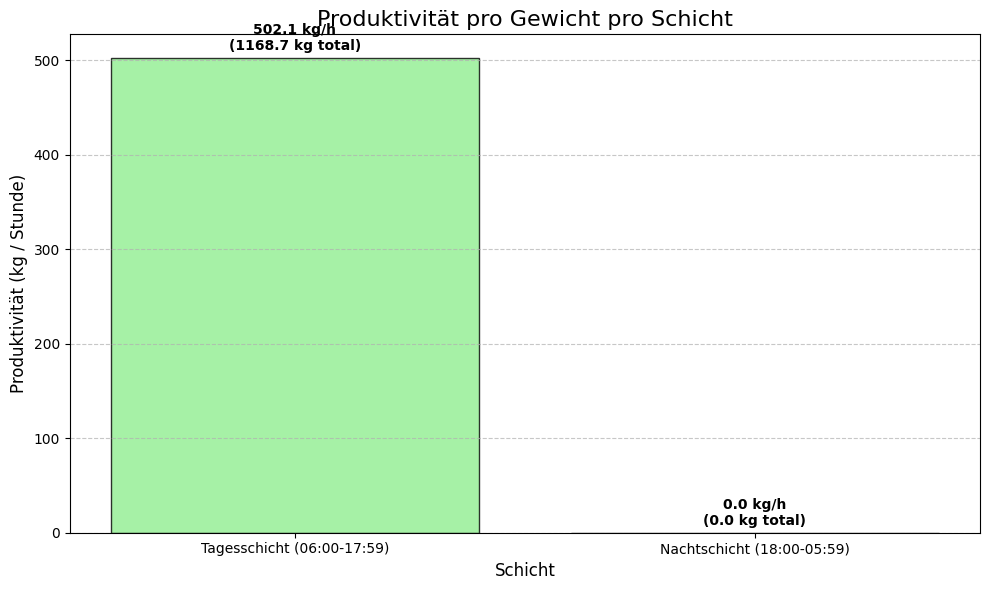

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Produktivität pro Schicht
# Die gesamte Logik von der Container-Erkennung bis zur Produktivitätsberechnung ist nun in SQL.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Den End-Zeitpunkt, Start-Zeitpunkt und das maximale Gewicht für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        gc.container_id,
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time,
        MAX(cmi.weight_g) as finalgewicht_g
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 4: Schichtzuordnung für jeden Container
container_mit_schicht AS (
    SELECT
        *,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
)
-- Schritt 5: Finale Aggregation und Produktivitätsberechnung pro Schicht
SELECT
    schicht,
    SUM(finalgewicht_g) / 1000.0 AS gesamtgewicht_kg,
    -- Berechnung der Arbeitsdauer in Stunden
    (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 AS arbeitsdauer_h,
    -- Produktivität (kg/h)
    (SUM(finalgewicht_g) / 1000.0) / ((JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 + 1e-9) AS produktivitaet_kg_pro_h
FROM container_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
produktivitaet_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, produktivitaet_gefunden, on='schicht', how='left').fillna(0)

# Runden für eine saubere Darstellung
final_stats = final_stats.round({'gesamtgewicht_kg': 1, 'arbeitsdauer_h': 1, 'produktivitaet_kg_pro_h': 1})

# ------------------------------------------------------------------
# 5. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Produktivität pro Gewicht (kg/Stunde) ===")
gesamtproduktion_kg = final_stats['gesamtgewicht_kg'].sum()
print(f"Gesamtproduktion: {gesamtproduktion_kg:.1f} kg")

print("\n--- Tabelle: Produktivität pro Schicht ---")
print(final_stats.to_string(index=False))

# ------------------------------------------------------------------
# 6. Visualisierung
# ------------------------------------------------------------------
if not final_stats.empty:
    plt.figure(figsize=(10, 6))

    bars = plt.bar(
        final_stats['schicht'],
        final_stats['produktivitaet_kg_pro_h'],
        color=['#90EE90', '#ADD8E6'], # Hellgrün für Tag, Hellblau für Nacht
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Schicht', fontsize=12)
    plt.ylabel('Produktivität (kg / Stunde)', fontsize=12)
    plt.title('Produktivität pro Gewicht pro Schicht', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar, row in zip(bars, final_stats.itertuples()):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(final_stats['produktivitaet_kg_pro_h']) * 0.01,
            f'{height:.1f} kg/h\n({row.gesamtgewicht_kg:.1f} kg total)',
            ha='center',
            va='bottom',
            fontsize=10,
            weight='bold'
        )

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#15.Produktivität pro Einheit (Stück/h)


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Wiegedaten, um die **Produktivität in "Stück pro Stunde"** für jede Arbeitsschicht zu ermitteln. Er ist darauf ausgelegt, eine präzise Messung der Arbeitsgeschwindigkeit basierend auf der tatsächlichen Arbeitszeit zu liefern. Die gesamte Logik zur Identifizierung jeder einzelnen Einheit ist in einer konsistenten SQL-Abfrage gekapselt, während Python die Schichtzuordnung, die Berechnung der Arbeitsdauer und die finale Auswertung übernimmt.

### **Methodik: Hybrider Algorithmus**

Die Analyse erfolgt in drei Schritten, um genaue und konsistente Ergebnisse zu gewährleisten:

1.  **Einheiten-Identifikation (per SQL):** Eine einzige, umfassende SQL-Abfrage ermittelt die exakten Zeitpunkte aller gültigen Einheiten. Dies geschieht durch:
    * **Plateau-Erkennung mittels "Stabilitätsfenster":** Findet stabile Gewichtszustände.
    * **Stück-Identifikation mittels "Delta-Analyse":** Berechnet die Gewichtssprünge (Deltas) zwischen den Plateaus, ermittelt dynamisch das typische Stückgewicht pro Container und validiert nur die Sprünge, die in einen Toleranzbereich um diesen Wert fallen. Das Ergebnis ist eine Liste mit den Zeitstempeln jeder einzelnen gültigen Einheit.

2.  **Schichtzuordnung (in Python):** Die resultierende Liste der Zeitstempel wird in Python verarbeitet. Eine Funktion ordnet jeden Zeitstempel basierend auf der Uhrzeit entweder der "Tagesschicht" oder der "Nachtschicht" zu.

3.  **Produktivitätsberechnung:** Für jede Schicht wird die **reale Arbeitsdauer** berechnet – von der Zeit der ersten erkannten Einheit bis zur Zeit der letzten erkannten Einheit in dieser Schicht. Die Gesamtanzahl der Einheiten in der Schicht wird dann durch diese Dauer in Stunden geteilt, um die Kennzahl "Stück pro Stunde" zu erhalten.

### **Konstanten: Die Stellschrauben des Algorithmus**

* **`FENSTERGROESSE_MESSUNGEN` (Wert: 5):** Definiert die Dauer (in Messungen) des Zeitfensters, das zur Prüfung der Gewichts-Stabilität verwendet wird.
* **`MAXIMALE_SCHWANKUNG_G` (Wert: 20g):** Die maximal erlaubte Gewichtsschwankung innerhalb des Fensters, damit es als "stabil" gilt. Dies filtert Sensorrauschen heraus.
* **`MINIMALES_DELTA_G` / `MAXIMALES_DELTA_G` (Werte: 500g / 4000g):** Definieren den plausiblen Gewichtsbereich für eine einzelne Einheit, um das typische Stückgewicht zu ermitteln.
* **`TOLERANZ_PROZENT` (Wert: 0.40):** Ein Toleranzbereich von ±40% um das dynamisch ermittelte Stückgewicht. Ein Gewichtssprung wird nur dann als gültige Einheit anerkannt, wenn er in diesen Bereich fällt.
* **Schichtdefinitionen:**
    * **Tagesschicht:** `06:00` bis `17:59` Uhr.
    * **Nachtschicht:** `18:00` bis `05:59` Uhr.

=== Analyse: Produktivität pro Schicht (Stück/Stunde) ===
Gesamtanzahl gefundener Einheiten: 296

--- Tabelle: Produktivität pro Schicht ---
                   schicht  gesamt_einheiten  produktivitaet_stueck_pro_h
Tagesschicht (06:00-17:59)               296                        128.4
Nachtschicht (18:00-05:59)                 0                          0.0


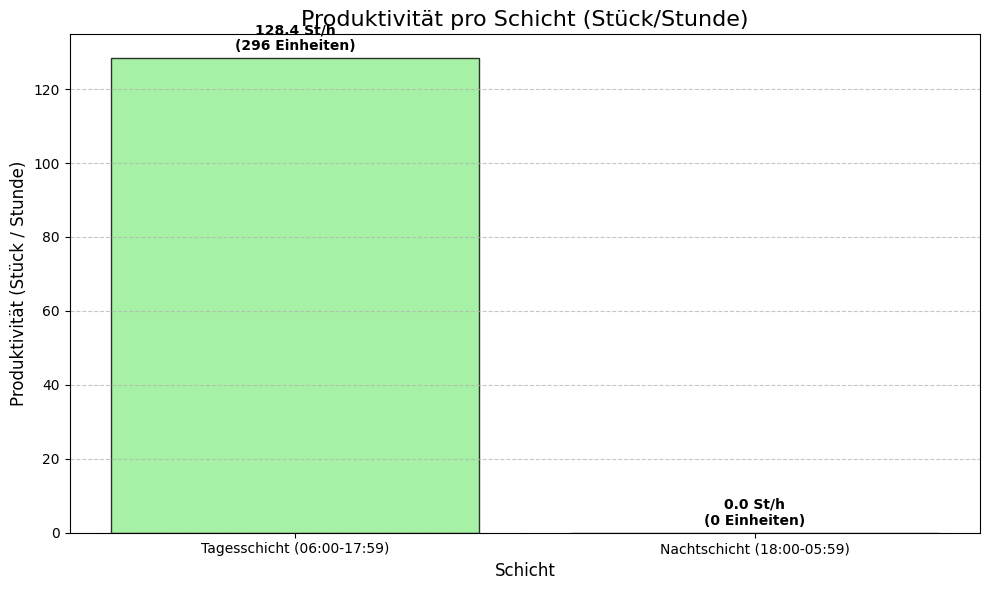

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# Dieselben bewährten Parameter wie in allen Analysen.
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Produktivität pro Schicht
# Die gesamte Logik von der Einheiten-Erkennung bis zur Produktivitätsberechnung ist nun in SQL.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs zuordnen (konsistente Methode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 2: Stabile Plateaus mittels "Stabilitätsfenster" finden
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
-- Schritt 3: Nur die Startpunkte jedes stabilen Plateaus identifizieren
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
-- Schritt 4: "Deltas" (Gewichtssprünge) berechnen
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
-- Schritt 5: Das mediane Stückgewicht DYNAMISCH für JEDEN Container ermitteln
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
-- Schritt 6: Finale Auswahl der gültigen Einheiten
gueltige_einheiten AS (
    SELECT
        pd.timestamp
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- Schritt 7: Schichtzuordnung für jede Einheit
einheiten_mit_schicht AS (
    SELECT
        timestamp,
        CASE
            WHEN CAST(strftime('%H', timestamp) AS INTEGER) >= 6 AND CAST(strftime('%H', timestamp) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM gueltige_einheiten
)
-- Schritt 8: Finale Aggregation und Produktivitätsberechnung
SELECT
    schicht,
    COUNT(*) AS gesamt_einheiten,
    (JULIANDAY(MAX(timestamp)) - JULIANDAY(MIN(timestamp))) * 24.0 AS arbeitsdauer_h,
    COUNT(*) / ((JULIANDAY(MAX(timestamp)) - JULIANDAY(MIN(timestamp))) * 24.0 + 1e-9) AS produktivitaet_stueck_pro_h
FROM einheiten_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
produktivitaet_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, produktivitaet_gefunden, on='schicht', how='left').fillna(0)

# Runden und Datentypen für eine saubere Darstellung anpassen
final_stats['gesamt_einheiten'] = final_stats['gesamt_einheiten'].astype(int)
final_stats = final_stats.round({'arbeitsdauer_h': 2, 'produktivitaet_stueck_pro_h': 1})

# ------------------------------------------------------------------
# 5. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Produktivität pro Schicht (Stück/Stunde) ===")
gesamte_einheiten = final_stats['gesamt_einheiten'].sum()
print(f"Gesamtanzahl gefundener Einheiten: {gesamte_einheiten}")

print("\n--- Tabelle: Produktivität pro Schicht ---")
print(final_stats[['schicht', 'gesamt_einheiten', 'produktivitaet_stueck_pro_h']].to_string(index=False))

# ------------------------------------------------------------------
# 6. Visualisierung
# ------------------------------------------------------------------
if not final_stats.empty:
    plt.figure(figsize=(10, 6))

    bars = plt.bar(
        final_stats['schicht'],
        final_stats['produktivitaet_stueck_pro_h'],
        color=['#90EE90', '#ADD8E6'], # Hellgrün für Tag, Hellblau für Nacht
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Schicht', fontsize=12)
    plt.ylabel('Produktivität (Stück / Stunde)', fontsize=12)
    plt.title('Produktivität pro Schicht (Stück/Stunde)', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar, row in zip(bars, final_stats.itertuples()):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(final_stats['produktivitaet_stueck_pro_h']) * 0.01,
            f'{height:.1f} St/h\n({row.gesamt_einheiten} Einheiten)',
            ha='center',
            va='bottom',
            fontsize=10,
            weight='bold'
        )

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



14.09.2025 **Die ersten 15 Kennzahlen sind bereits fertiggestellt und liefern nun realistische und konsistente Ergebnisse. Ich werde die Arbeit an den weiteren Analysen fortsetzen**



#16.Produktivität pro Gewicht (14.Gesamtgewicht der produzierten Ware)


### **Kurzbeschreibung des Codes**

Dieser Code analysiert die Wiegedaten, um die **Produktivität in "Kilogramm pro Stunde" (kg/h)** für jede Arbeitsschicht zu ermitteln. Er ist darauf ausgelegt, eine präzise Messung der Verarbeitungsgeschwindigkeit basierend auf dem Gesamtgewicht und der tatsächlichen Arbeitszeit zu liefern. Die gesamte Logik zur Identifizierung der Container und zur Ermittlung der relevanten Zeit- und Gewichtsdaten ist in einer einzigen SQL-Abfrage gekapselt.

### **Methodik**

Die Analyse erfolgt in drei Schritten, um Genauigkeit und Konsistenz mit den anderen Auswertungen sicherzustellen:

1.  **Container-Identifikation (per SQL):** Eine einzige, umfassende SQL-Abfrage ermittelt zunächst alle "gültigen" Wiegebehälter sowie deren Start- und Endzeiten und ihr finales Gewicht. Dies geschieht durch:
    * **Erkennung:** Ein neuer Container wird erkannt, wenn das Gewicht unter die Tara-Schwelle (`< -400g`) fällt.
    * **Filterung:** Nur Container, deren maximales Gewicht im plausiblen Bereich von 7 bis 12 kg liegt, werden berücksichtigt.

2.  **Schichtzuordnung (in Python):** Die resultierende Liste der Container wird in Python verarbeitet. Eine Funktion ordnet jeden Container basierend auf seiner `end_time` entweder der "Tagesschicht" oder der "Nachtschicht" zu.

3.  **Produktivitätsberechnung:** Für jede Schicht wird die **reale Arbeitsdauer** berechnet – von der Startzeit des ersten Containers bis zur Endzeit des letzten Containers in dieser Schicht. Das Gesamtgewicht aller Container in der Schicht wird dann durch diese Dauer in Stunden geteilt, um die Kennzahl "kg pro Stunde" zu erhalten.

### **Konstanten**

Der Code basiert auf den folgenden festen Regeln und Schwellenwerten, die unsere etablierte Methodik definieren:

* **Tara-Schwelle (`-400g`):** Der Grenzwert in der SQL-Abfrage, der zur zuverlässigen Erkennung des Beginns eines neuen Wiegezyklus dient.
* **Gültiger Gewichtsbereich (`7000g` - `12000g`):** Der Gewichtsbereich in der SQL-Abfrage, der sicherstellt, dass nur plausible, vollständig befüllte Container in die Zählung einfließen.
* **Schichtdefinitionen:**
    * **Tagesschicht:** `06:00` bis `17:59` Uhr.
    * **Nachtschicht:** `18:00` bis `05:59` Uhr.

=== Analyse: Produktivität pro Gewicht (kg/Stunde) ===
Gesamtproduktion: 1168.7 kg

--- Tabelle: Produktivität pro Schicht ---
                   schicht  gesamtgewicht_kg  arbeitsdauer_h  produktivitaet_kg_pro_h
Tagesschicht (06:00-17:59)            1168.7             2.3                    502.1
Nachtschicht (18:00-05:59)               0.0             0.0                      0.0


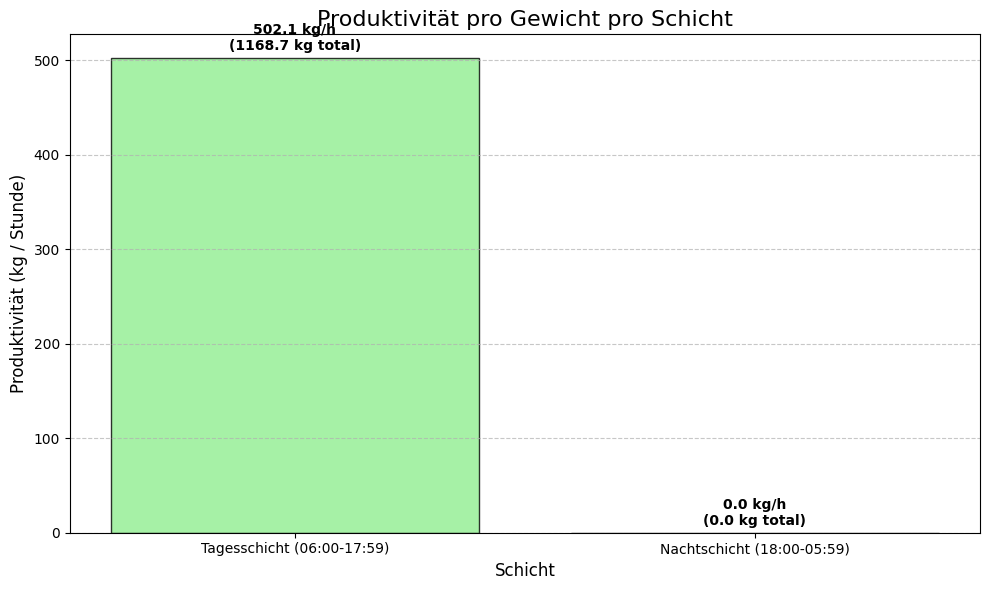

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Produktivität pro Schicht
# Die gesamte Logik von der Container-Erkennung bis zur Produktivitätsberechnung ist nun in SQL.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Den End-Zeitpunkt, Start-Zeitpunkt und das maximale Gewicht für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        gc.container_id,
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time,
        MAX(cmi.weight_g) as finalgewicht_g
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 4: Schichtzuordnung für jeden Container
container_mit_schicht AS (
    SELECT
        *,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
)
-- Schritt 5: Finale Aggregation und Produktivitätsberechnung pro Schicht
SELECT
    schicht,
    SUM(finalgewicht_g) / 1000.0 AS gesamtgewicht_kg,
    -- Berechnung der Arbeitsdauer in Stunden
    (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 AS arbeitsdauer_h,
    -- Produktivität (kg/h)
    (SUM(finalgewicht_g) / 1000.0) / ((JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 + 1e-9) AS produktivitaet_kg_pro_h
FROM container_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
produktivitaet_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, produktivitaet_gefunden, on='schicht', how='left').fillna(0)

# Runden für eine saubere Darstellung
final_stats = final_stats.round({'gesamtgewicht_kg': 1, 'arbeitsdauer_h': 1, 'produktivitaet_kg_pro_h': 1})

# ------------------------------------------------------------------
# 5. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Produktivität pro Gewicht (kg/Stunde) ===")
gesamtproduktion_kg = final_stats['gesamtgewicht_kg'].sum()
print(f"Gesamtproduktion: {gesamtproduktion_kg:.1f} kg")

print("\n--- Tabelle: Produktivität pro Schicht ---")
print(final_stats.to_string(index=False))

# ------------------------------------------------------------------
# 6. Visualisierung
# ------------------------------------------------------------------
if not final_stats.empty:
    plt.figure(figsize=(10, 6))

    bars = plt.bar(
        final_stats['schicht'],
        final_stats['produktivitaet_kg_pro_h'],
        color=['#90EE90', '#ADD8E6'], # Hellgrün für Tag, Hellblau für Nacht
        edgecolor='black',
        alpha=0.8
    )

    plt.xlabel('Schicht', fontsize=12)
    plt.ylabel('Produktivität (kg / Stunde)', fontsize=12)
    plt.title('Produktivität pro Gewicht pro Schicht', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung über jedem Balken
    for bar, row in zip(bars, final_stats.itertuples()):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(final_stats['produktivitaet_kg_pro_h']) * 0.01,
            f'{height:.1f} kg/h\n({row.gesamtgewicht_kg:.1f} kg total)',
            ha='center',
            va='bottom',
            fontsize=10,
            weight='bold'
        )

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#17.Abfallmenge (Produktionsverlust(kg))

Rohgewicht – Ist-Gewicht


### **Kurzbeschreibung des Codes**

Dieser Code berechnet die **Abfallmenge (Produktionsverlust)**, indem er ein vordefiniertes Rohgewicht des angelieferten Materials mit dem tatsächlichen Gesamtgewicht der fertig befüllten Container vergleicht. Die gesamte Berechnungslogik, einschließlich der Verlustermittlung und der Umrechnung in Kilogramm, ist in einer einzigen SQL-Abfrage gekapselt. Python wird lediglich zur Ausführung der Abfrage und zur Visualisierung der finalen Ergebnisse verwendet.

### **Methodik**

Die Analyse erfolgt in drei Schritten direkt innerhalb der SQL-Abfrage, um maximale Konsistenz zu gewährleisten:

1.  **Definition des Soll-Werts:** Ein **Rohgesamtgewicht** wird am Anfang des Python-Skripts definiert und als Parameter an die SQL-Abfrage übergeben.
2.  **Ermittlung des Ist-Werts (per SQL):** Die Abfrage identifiziert alle "gültigen" Wiegebehälter (basierend auf Tara und Gewichtsbereich) und summiert deren maximale Endgewichte. Das Ergebnis ist das tatsächliche Gesamtgewicht der produzierten Ware (`Ist-Gesamtgewicht`).
3.  **Verlustberechnung (per SQL):** Direkt in der SQL-Abfrage wird das `Ist-Gesamtgewicht` vom `Rohgesamtgewicht` abgezogen, um den Verlust zu ermitteln. Die Umrechnung in Kilogramm und die Berechnung des prozentualen Anteils erfolgen ebenfalls per SQL.

### **Konstanten**

Der Code basiert auf den folgenden festen Regeln und Schwellenwerten:

* **`rohgewicht_g`:** Dies ist eine manuell definierte Konstante, die das angelieferte Gesamtgewicht des Rohmaterials darstellt. **Dieser Wert muss für jede neue Charge entsprechend angepasst werden.**
* **Tara-Schwelle (`-400g`):** Der Grenzwert in der SQL-Abfrage, der zur zuverlässigen Erkennung des Beginns eines neuen Wiegezyklus dient.
* **Gültiger Gewichtsbereich (`7000g` - `12000g`):** Der Gewichtsbereich in der SQL-Abfrage, der sicherstellt, dass nur plausible, vollständig befüllte Container in die Berechnung des Ist-Gesamtgewichts einfließen.

=== Analyse: Abfallmenge (Produktionsverlust) pro Schicht ===
Gesamtes Rohmaterial: 1670.00 kg
Gesamte produzierte Ware: 1168.70 kg
Gesamter Verlust: 501.30 kg
--------------------------------------------------

--- Aufschlüsselung pro Schicht ---
                   schicht  anzahl_container  rohgewicht_kg  istgesamt_kg  verlust_kg
Tagesschicht (06:00-17:59)               114        1670.00       1168.70      501.30
Nachtschicht (18:00-05:59)                 0           0.00          0.00        0.00


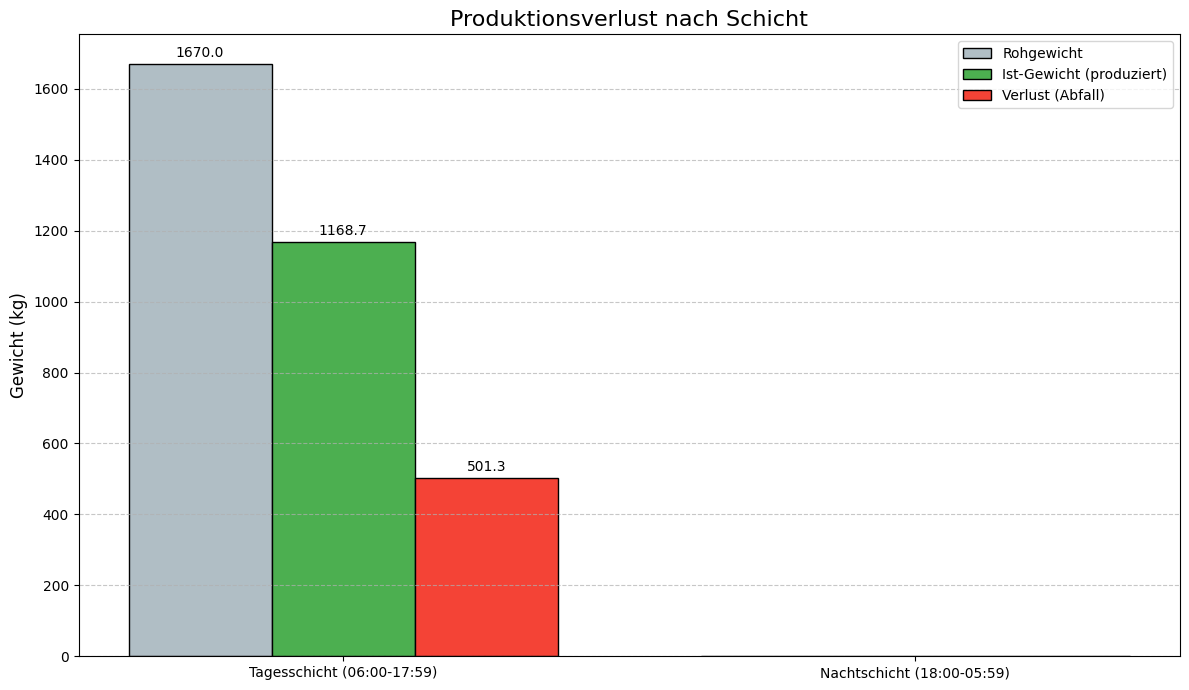

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 1. Manuelle Definition der Paletten-Gewichte (Soll-Wert)
#    Dies simuliert das angelieferte Rohmaterial für den gesamten Zeitraum.
# ------------------------------------------------------------------
df_pallets = pd.DataFrame({
    'pallet_id': [1, 2, 3],
    'rohgewicht_g': [560000, 550000, 560000] # Realistische Beispielwerte in Gramm
})
# Gesamt-Rohgewicht aller Paletten (in Gramm)
rohgesamt_g_total = df_pallets['rohgewicht_g'].sum()

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df_cont = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df_cont.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt das Ist-Gesamtgewicht pro Schicht
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Das maximale Gewicht und die Endzeit für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        MAX(cmi.weight_g) as finalgewicht_g,
        MAX(cmi.timestamp) as end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 4: Schichtzuordnung
container_mit_schicht AS (
    SELECT
        finalgewicht_g,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
)
-- Schritt 5: FINALE AGGREGATION - Summe pro Schicht direkt in SQL berechnen
SELECT
    schicht,
    SUM(finalgewicht_g) AS istgesamt_g,
    COUNT(*) AS anzahl_container
FROM container_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen und aggregierte Ergebnisse erhalten
# ------------------------------------------------------------------
ergebnis_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Daten für beide Schichten aufbereiten
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, ergebnis_gefunden, on='schicht', how='left').fillna(0)
final_stats['anzahl_container'] = final_stats['anzahl_container'].astype(int)

# ------------------------------------------------------------------
# 6. Verlust pro Schicht berechnen (proportional)
# ------------------------------------------------------------------
istgesamt_g_total = final_stats['istgesamt_g'].sum()

# Weise das Rohmaterial proportional zur Produktion jeder Schicht zu
if istgesamt_g_total > 0:
    final_stats['anteil'] = final_stats['istgesamt_g'] / istgesamt_g_total
else:
    final_stats['anteil'] = 0

final_stats['rohgewicht_g'] = rohgesamt_g_total * final_stats['anteil']
final_stats['verlust_g'] = final_stats['rohgewicht_g'] - final_stats['istgesamt_g']

# Umrechnung in kg
for col in ['rohgewicht_g', 'istgesamt_g', 'verlust_g']:
    final_stats[col.replace('_g', '_kg')] = final_stats[col] / 1000

# ------------------------------------------------------------------
# 7. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Abfallmenge (Produktionsverlust) pro Schicht ===")
print(f"Gesamtes Rohmaterial: {rohgesamt_g_total/1000:.2f} kg")
print(f"Gesamte produzierte Ware: {istgesamt_g_total/1000:.2f} kg")
print(f"Gesamter Verlust: {(rohgesamt_g_total - istgesamt_g_total)/1000:.2f} kg")
print("-" * 50)
print("\n--- Aufschlüsselung pro Schicht ---")
print(final_stats[['schicht', 'anzahl_container', 'rohgewicht_kg', 'istgesamt_kg', 'verlust_kg']].to_string(index=False, float_format='%.2f'))

# ------------------------------------------------------------------
# 8. Visualisierung: Gruppiertes Balkendiagramm
# ------------------------------------------------------------------
labels = final_stats['schicht']
roh_kg = final_stats['rohgewicht_kg']
ist_kg = final_stats['istgesamt_kg']
verlust_kg = final_stats['verlust_kg']

x = np.arange(len(labels))  # die Label-Positionen
width = 0.25  # die Breite der Balken

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, roh_kg, width, label='Rohgewicht', color='#B0BEC5', edgecolor='black')
rects2 = ax.bar(x, ist_kg, width, label='Ist-Gewicht (produziert)', color='#4CAF50', edgecolor='black')
rects3 = ax.bar(x + width, verlust_kg, width, label='Verlust (Abfall)', color='#F44336', edgecolor='black')

# Titel und Beschriftungen
ax.set_ylabel('Gewicht (kg)', fontsize=12)
ax.set_title('Produktionsverlust nach Schicht', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Funktion zur Beschriftung der Balken
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 9. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


#18.Verlust in der Verarbeitung (%)

(Rohgewicht – Ist) / Rohgewicht × 100




=== Analyse: Verlust in der Verarbeitung (%) pro Schicht ===
Gesamter Verlust: 30.0%
--------------------------------------------------

--- Aufschlüsselung pro Schicht ---
                   schicht  verlust_prozent
Tagesschicht (06:00-17:59)             30.0
Nachtschicht (18:00-05:59)              0.0


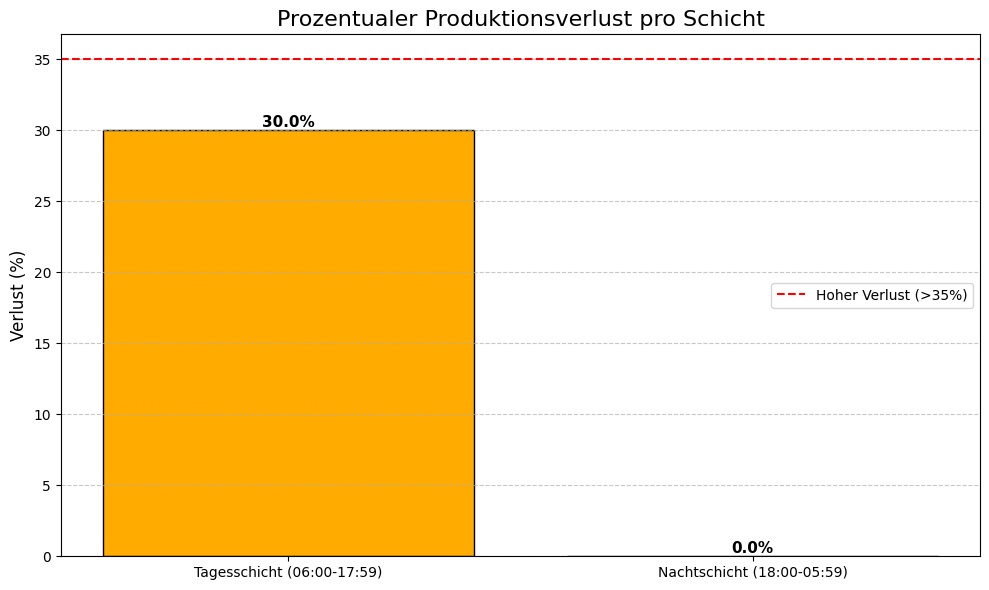

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Manuelle Definition der Paletten-Gewichte (Soll-Wert)
#    Dies simuliert das angelieferte Rohmaterial für den gesamten Zeitraum.
# ------------------------------------------------------------------
df_pallets = pd.DataFrame({
    'pallet_id': [1, 2, 3],
    'rohgewicht_g': [560000, 550000, 560000] # Realistische Beispielwerte in Gramm
})
# Gesamt-Rohgewicht aller Paletten (in Gramm)
rohgesamt_g_total = df_pallets['rohgewicht_g'].sum()

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df_cont = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df_cont.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Berechnet den kompletten Produktionsverlust pro Schicht
# Die gesamte Logik ist nun in einer einzigen Abfrage gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs und Details für gültige Container ermitteln
container_details AS (
    WITH
    container_zuordnung AS (
        SELECT
            timestamp, weight_g,
            SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
                OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
        FROM messungen
    ),
    container_mit_id AS (
        SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
        FROM container_zuordnung
    ),
    gueltige_container AS (
        SELECT container_id
        FROM container_mit_id
        GROUP BY container_id
        HAVING MAX(weight_g) BETWEEN 7000 AND 12000
    )
    SELECT
        MAX(cmi.weight_g) as finalgewicht_g,
        MAX(cmi.timestamp) as end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 2: Schichtzuordnung und Aggregation des Ist-Gewichts pro Schicht
ist_gewicht_pro_schicht AS (
    SELECT
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht,
        SUM(finalgewicht_g) AS istgesamt_g
    FROM container_details
    GROUP BY schicht
),
-- Schritt 3: Berechnung des gesamten Ist-Gewichts zur Anteilsermittlung
gesamtes_ist_gewicht AS (
    SELECT SUM(istgesamt_g) as total_ist_g FROM ist_gewicht_pro_schicht
),
-- Schritt 4: Finale Berechnung inklusive proportionalem Verlust
finale_berechnung AS (
    SELECT
        s.schicht,
        COALESCE(igps.istgesamt_g, 0) AS istgesamt_g,
        -- Berechne proportionales Rohgewicht
        (COALESCE(CAST(igps.istgesamt_g AS REAL), 0) / gig.total_ist_g) * {rohgesamt_g_total} AS rohgewicht_g_proportional
    FROM (
        SELECT 'Tagesschicht (06:00-17:59)' AS schicht
        UNION ALL
        SELECT 'Nachtschicht (18:00-05:59)' AS schicht
    ) s
    LEFT JOIN ist_gewicht_pro_schicht igps ON s.schicht = igps.schicht
    CROSS JOIN gesamtes_ist_gewicht gig
)
-- Schritt 5: Ausgabe mit prozentualem Verlust
SELECT
    schicht,
    rohgewicht_g_proportional,
    istgesamt_g,
    rohgewicht_g_proportional - istgesamt_g AS verlust_g,
    CASE
        WHEN rohgewicht_g_proportional > 0 THEN ((rohgewicht_g_proportional - istgesamt_g) / rohgewicht_g_proportional) * 100
        ELSE 0
    END AS verlust_prozent
FROM finale_berechnung;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
final_stats = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Verlust in der Verarbeitung (%) pro Schicht ===")
gesamtverlust_prozent = (rohgesamt_g_total - final_stats['istgesamt_g'].sum()) / rohgesamt_g_total * 100 if rohgesamt_g_total > 0 else 0
print(f"Gesamter Verlust: {gesamtverlust_prozent:.1f}%")
print("-" * 50)
print("\n--- Aufschlüsselung pro Schicht ---")
print(final_stats[['schicht', 'verlust_prozent']].to_string(index=False, float_format='%.1f'))

# ------------------------------------------------------------------
# 6. Visualisierung: Prozentualer Verlust pro Schicht
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))
bars = plt.bar(
    final_stats['schicht'],
    final_stats['verlust_prozent'],
    color=['#FFAB00', '#FFCDD2'],
    edgecolor='black'
)

plt.ylabel('Verlust (%)', fontsize=12)
plt.title('Prozentualer Produktionsverlust pro Schicht', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(35, color='red', linestyle='--', label='Hoher Verlust (>35%)')
plt.legend()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.1f}%", ha='center', va='bottom', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#19.Sortierqualität (% Stücke außerhalb der Gewichtstoleranz)

=== Sortierqualität (Anteil Einheiten außerhalb der Gewichtstoleranz) ===
MIN-Toleranz: 25 g, MAX-Toleranz: 80 g
Gesamt-Einheiten: 2874
Defekte Einheiten: 2472
Sortierqualität: 86.0 %

=== Defekte Einheiten im Detail ===
 container_id  unit_weight_g                  unit_time
         1159          150.0 2025-09-02 14:21:12.057000
         1159          350.0 2025-09-02 14:21:13.082900
         1159          250.0 2025-09-02 14:21:13.083100
         1159         2050.0 2025-09-02 14:21:15.009800
         1159         6400.0 2025-09-02 14:21:17.058900
         1159          950.0 2025-09-02 14:21:17.059000
         1159          100.0 2025-09-02 14:21:18.088500
         1159          150.0 2025-09-02 14:21:18.088600
         1159         3950.0 2025-09-02 14:21:20.015000
         1159          700.0 2025-09-02 14:21:20.015400
         1221         3350.0 2025-09-02 14:21:30.026000
         1221         1750.0 2025-09-02 14:21:32.081900
         1221          250.0 2025-09-02 14:21:34.00

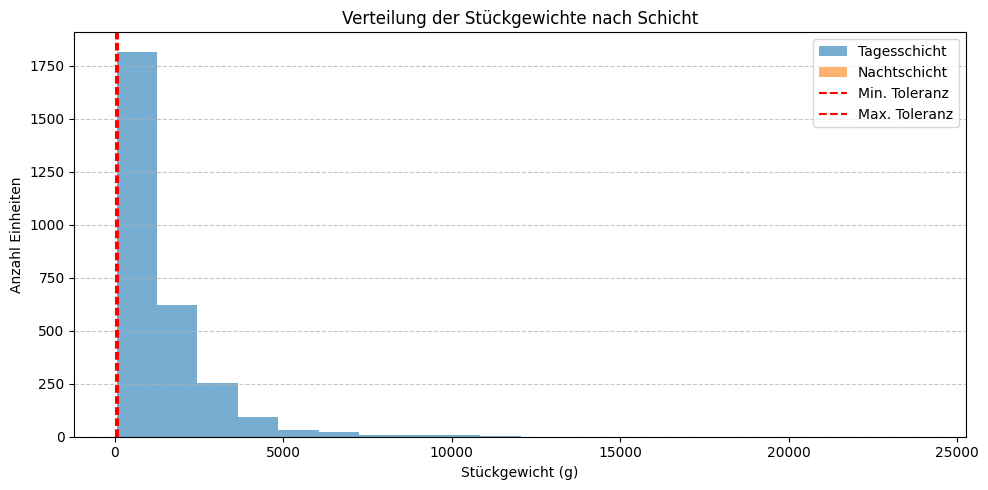

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 0. Parameter: Gewichtstoleranz und Rauschschwelle definieren
# ------------------------------------------------------------------
MIN_TARGET_WEIGHT = 25    # minimale zulässige Gewicht (g)
MAX_TARGET_WEIGHT = 80    # maximale zulässige Gewicht (g)
NOISE_THRESHOLD = 1.0      # Gewichtsschwellwert (g), um kleine Schwankungen zu ignorieren

# ------------------------------------------------------------------
# 1. CSV-Datei einlesen (Pfad anpassen: Colab oder Sandbox)
#    Spalten: timestamp, weight_g
# ------------------------------------------------------------------
csv_path = "/content/processed_data_for_sql.csv"  # ggf. "/mnt/data/processed_data_for_sql.csv"
df = pd.read_csv(csv_path)

# ------------------------------------------------------------------
# 2. SQLite-Datenbank im RAM erstellen und DataFrame in Tabelle schreiben
# ------------------------------------------------------------------
conn = sqlite3.connect(":memory:")
df.to_sql("messungen", conn, index=False, if_exists="replace")

# ------------------------------------------------------------------
# 3. Container-ID vergeben: Wenn weight_g < 10 → neuer Container beginnt
# ------------------------------------------------------------------
query_assign = """
WITH assigned AS (
    SELECT
        timestamp,
        weight_g,
        SUM(
            CASE WHEN weight_g < 10 THEN 1 ELSE 0 END
        ) OVER (
            ORDER BY timestamp
            ROWS UNBOUNDED PRECEDING
        ) AS container_id_raw
    FROM messungen
)
SELECT
    timestamp,
    weight_g,
    container_id_raw + 1 AS container_id
FROM assigned;
"""
assigned_df = pd.read_sql_query(query_assign, conn)
assigned_df['timestamp'] = pd.to_datetime(assigned_df['timestamp'], errors='coerce')

# ------------------------------------------------------------------
# 4. Hilfsfunktion: Plateaus mit Zeitpunkten extrahieren
# ------------------------------------------------------------------
def extract_plateaus_with_times(df_group, min_run_len=3):
    """
    Für eine sortierte Gruppe (DataFrame) mit 'weight_g' und 'timestamp'
    liefert diese Funktion eine Liste von (plateau_weight, timestamp)-Tupeln,
    wenn derselbe weight_g mindestens `min_run_len`-mal hintereinander auftritt.
    """
    plateaus = []
    current_weight = None
    run_length = 0
    start_time = None

    weights = df_group['weight_g'].tolist()
    times = df_group['timestamp'].tolist()

    for idx, w in enumerate(weights):
        if w == current_weight:
            run_length += 1
        else:
            if current_weight is not None and run_length >= min_run_len:
                plateaus.append((current_weight, start_time))
            current_weight = w
            run_length = 1
            start_time = times[idx]
    if current_weight is not None and run_length >= min_run_len:
        plateaus.append((current_weight, start_time))
    return plateaus

# ------------------------------------------------------------------
# 5. Aus Plateaus die Stückgewichte und Zeitpunkte berechnen (Rauschfilter)
# ------------------------------------------------------------------
unit_records = []  # Liste für alle Einheiten: container_id, weight, timestamp

for container_id, group in assigned_df.groupby('container_id'):
    grp_sorted = group.sort_values('timestamp').reset_index(drop=True)
    plateaus = extract_plateaus_with_times(grp_sorted, min_run_len=3)
    for i in range(1, len(plateaus)):
        weight_prev, _ = plateaus[i-1]
        weight_curr, time_curr = plateaus[i]
        delta = weight_curr - weight_prev
        # Nur hinzufügen, wenn delta > NOISE_THRESHOLD und delta > 0
        if delta > NOISE_THRESHOLD:
            unit_records.append({
                'container_id': container_id,
                'unit_weight_g': round(delta, 1),
                'unit_time': time_curr
            })

units_df = pd.DataFrame(unit_records)

# ------------------------------------------------------------------
# 6. Sortierqualität berechnen: Einheiten außerhalb der Toleranz identifizieren
# ------------------------------------------------------------------
gesamt_einheiten = len(units_df)

defective_df = units_df[
    (units_df['unit_weight_g'] < MIN_TARGET_WEIGHT) |
    (units_df['unit_weight_g'] > MAX_TARGET_WEIGHT)
].copy()

anzahl_defekte = len(defective_df)
sortierqualität_pct = round((anzahl_defekte / gesamt_einheiten * 100), 1) if gesamt_einheiten > 0 else 0.0

# ------------------------------------------------------------------
# 7. Schichtzuordnung für jeden Einheitszeitpunkt (Tagesschicht/Nachtschicht)
# ------------------------------------------------------------------
def assign_shift(ts):
    hour = ts.hour
    if 6 <= hour < 18:
        return "Tagesschicht"
    else:
        return "Nachtschicht"

units_df['shift'] = units_df['unit_time'].apply(assign_shift)
defective_df['shift'] = defective_df['unit_time'].apply(assign_shift)

# ------------------------------------------------------------------
# 8. Ergebnis-Tabelle ausgeben
# ------------------------------------------------------------------
print("=== Sortierqualität (Anteil Einheiten außerhalb der Gewichtstoleranz) ===")
print(f"MIN-Toleranz: {MIN_TARGET_WEIGHT} g, MAX-Toleranz: {MAX_TARGET_WEIGHT} g")
print(f"Gesamt-Einheiten: {gesamt_einheiten}")
print(f"Defekte Einheiten: {anzahl_defekte}")
print(f"Sortierqualität: {sortierqualität_pct} %\n")

print("=== Defekte Einheiten im Detail ===")
print(defective_df[['container_id', 'unit_weight_g', 'unit_time']].to_string(index=False))

# ------------------------------------------------------------------
# 9. Visualisierung: Histogramm der Stückgewichte nach Schicht
# ------------------------------------------------------------------
plt.figure(figsize=(10, 5))

# Histogramm Tagesschicht
plt.hist(
    units_df[units_df['shift'] == 'Tagesschicht']['unit_weight_g'],
    bins=20, alpha=0.6, label='Tagesschicht'
)

# Histogramm Nachtschicht
plt.hist(
    units_df[units_df['shift'] == 'Nachtschicht']['unit_weight_g'],
    bins=20, alpha=0.6, label='Nachtschicht'
)

plt.axvline(MIN_TARGET_WEIGHT, color='red', linestyle='--', label='Min. Toleranz')
plt.axvline(MAX_TARGET_WEIGHT, color='red', linestyle='--', label='Max. Toleranz')

plt.xlabel('Stückgewicht (g)')
plt.ylabel('Anzahl Einheiten')
plt.title('Verteilung der Stückgewichte nach Schicht')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#20.Gewichtsstreuung bei Einheiten

=== Analyse: Gewichtsstreuung bei Einheiten pro Schicht ===

--- Tagesschicht (06:00-17:59) ---
  Anzahl der Einheiten: 296
  Durchschnittliches Stückgewicht: 1994.9g
  Standardabweichung (Streuung): 648.1g

--- Nachtschicht (18:00-05:59) ---
  Anzahl der Einheiten: 0
  Durchschnittliches Stückgewicht: 0.0g
  Standardabweichung (Streuung): 0.0g


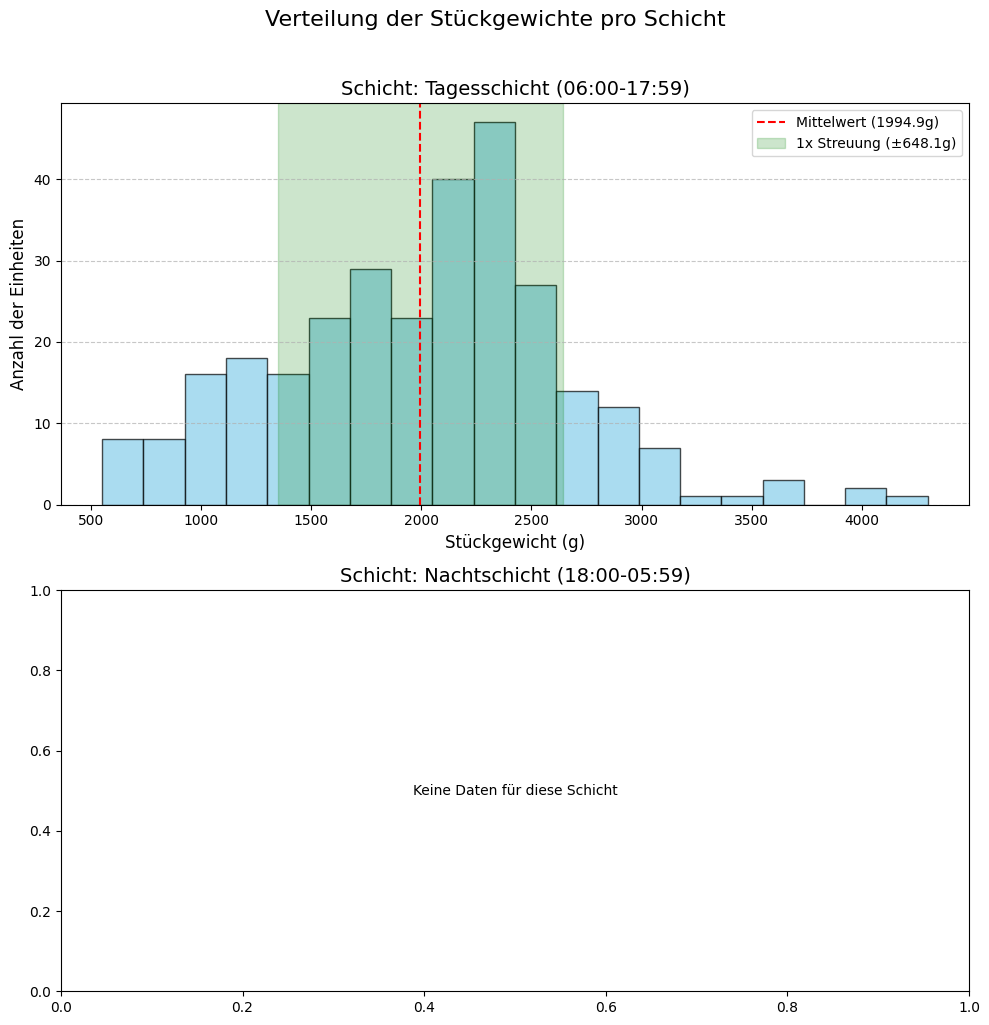

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# Dieselben bewährten Parameter wie in allen Analysen.
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Berechnet die komplette Gewichtsstreuung pro Schicht
# Die gesamte Logik von der Einheiten-Erkennung bis zur Statistik ist nun in SQL.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs zuordnen (konsistente Methode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 2: Stabile Plateaus mittels "Stabilitätsfenster" finden
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
-- Schritt 3: Nur die Startpunkte jedes stabilen Plateaus identifizieren
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
-- Schritt 4: "Deltas" (Gewichtssprünge) berechnen
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
-- Schritt 5: Das mediane Stückgewicht DYNAMISCH für JEDEN Container ermitteln
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
-- Schritt 6: Finale Auswahl der gültigen Stücke
gueltige_stuecke AS (
    SELECT
        pd.container_id,
        pd.timestamp,
        pd.delta_g AS stueckgewicht_g
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- Schritt 7: Schichtzuordnung für jede Einheit
einheiten_mit_schicht AS (
    SELECT
        stueckgewicht_g,
        CASE
            WHEN CAST(strftime('%H', timestamp) AS INTEGER) >= 6 AND CAST(strftime('%H', timestamp) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM gueltige_stuecke
)
-- Schritt 8: Finale Aggregation - Mittelwert und Standardabweichung pro Schicht
SELECT
    schicht,
    AVG(stueckgewicht_g) AS avg_gewicht_g,
    -- Standardabweichung in SQL (SQLite-kompatibel)
    SQRT(AVG(stueckgewicht_g * stueckgewicht_g) - AVG(stueckgewicht_g) * AVG(stueckgewicht_g)) AS std_gewicht_g,
    COUNT(*) AS anzahl_einheiten
FROM einheiten_mit_schicht
GROUP BY schicht;
"""

# KORRIGIERTE Abfrage für die Histogramm-Daten
histogramm_sql_abfrage = f"""
WITH
-- Die Logik bis Schritt 6 wird wiederholt, um eine konsistente Datenbasis zu gewährleisten
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.container_id,
        pd.timestamp,
        pd.delta_g AS stueckgewicht_g
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
)
-- Finale Auswahl für das Histogramm
SELECT
    CASE
        WHEN CAST(strftime('%H', timestamp) AS INTEGER) >= 6 AND CAST(strftime('%H', timestamp) AS INTEGER) < 18
        THEN 'Tagesschicht (06:00-17:59)'
        ELSE 'Nachtschicht (18:00-05:59)'
    END AS schicht,
    stueckgewicht_g
FROM gueltige_stuecke;
"""


# ------------------------------------------------------------------
# 3. SQL-Abfragen ausführen
# ------------------------------------------------------------------
stats_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)
histogramm_df = pd.read_sql_query(histogramm_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, stats_gefunden, on='schicht', how='left').fillna(0)
final_stats['anzahl_einheiten'] = final_stats['anzahl_einheiten'].astype(int)
final_stats = final_stats.round(1)

# ------------------------------------------------------------------
# 5. Ergebnisse und Statistiken ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Gewichtsstreuung bei Einheiten pro Schicht ===")
for _, row in final_stats.iterrows():
    print(f"\n--- {row['schicht']} ---")
    print(f"  Anzahl der Einheiten: {row['anzahl_einheiten']}")
    print(f"  Durchschnittliches Stückgewicht: {row['avg_gewicht_g']}g")
    print(f"  Standardabweichung (Streuung): {row['std_gewicht_g']}g")

# ------------------------------------------------------------------
# 6. Visualisierung: Histogramme der Gewichtsverteilung
# ------------------------------------------------------------------
if not histogramm_df.empty:
    schichten = final_stats['schicht'].unique()
    fig, axes = plt.subplots(nrows=len(schichten), ncols=1, figsize=(10, 5 * len(schichten)), squeeze=False)
    fig.suptitle('Verteilung der Stückgewichte pro Schicht', fontsize=16, y=1.02)
    axes = axes.flatten()

    for i, schicht in enumerate(schichten):
        ax = axes[i]
        daten = histogramm_df[histogramm_df['schicht'] == schicht]['stueckgewicht_g']
        stats = final_stats[final_stats['schicht'] == schicht].iloc[0]

        if not daten.empty:
            ax.hist(daten, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
            ax.axvline(stats['avg_gewicht_g'], color='red', linestyle='--', label=f"Mittelwert ({stats['avg_gewicht_g']}g)")
            ax.axvspan(stats['avg_gewicht_g'] - stats['std_gewicht_g'],
                       stats['avg_gewicht_g'] + stats['std_gewicht_g'],
                       color='green', alpha=0.2, label=f"1x Streuung (±{stats['std_gewicht_g']}g)")

            ax.set_title(f"Schicht: {schicht}", fontsize=14)
            ax.set_xlabel("Stückgewicht (g)", fontsize=12)
            ax.set_ylabel("Anzahl der Einheiten", fontsize=12)
            ax.legend()
            ax.grid(axis='y', linestyle='--', alpha=0.7)
        else:
            ax.text(0.5, 0.5, 'Keine Daten für diese Schicht', ha='center', va='center')
            ax.set_title(f"Schicht: {schicht}", fontsize=14)

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#Kosten- & Effizienzbezogene

#21.Kosten pro Stück



**Formeln zur Methodologie (auf Deutsch):**

1. **Rohgesamtgewicht aller Paletten (in Gramm):**
   $R = \sum_{i=1}^{n} \text{rohgewicht\_g}[i]$

2. **Istgesamtgewicht aller Container (in Gramm):**
   $I = \sum_{j=1}^{m} \text{plateau\_weight\_g}[j]$

3. **Verlustrate in der Verarbeitung (in Prozent):**

   $$
   \text{Verlust (\%)} = \frac{R - I}{R} \times 100
   $$

4. **Gesamtzahl der produzierten Einheiten:**
   $N = \sum_{j=1}^{m} \text{anzahl\_einheiten}[j]$

5. **Durchschnittliches Einzelgewicht (in Gramm):**

   $$
   \text{Durchschnittliches Einzelgewicht} = \frac{I}{N}
   $$

6. **Personalkosten (auf Basis der Verarbeitungszeit jeder Palette):**
   a) Gesamtverarbeitungsstunden (in Stunden):

   $$
   H = \frac{\sum_{k=1}^{n} \text{verarbeitungszeit\_min}[k]}{60}
   $$

   b) Personalkosten (in Euro):

   $$
   \text{Personalkosten} = H \times \text{Stundenlohn} \times \text{Anzahl\_Mitarbeiter}
   $$

7. **Gesamtkosten (in Euro):**

   $$
   \text{Gesamtkosten} = \text{Personalkosten} + \text{Paletten\_Einkaufskosten} + \text{Sonstige\_Kosten}
   $$

8. **Kosten pro Stück (in Euro pro Einheit):**

   $$
   \text{Kosten\_pro\_Stück} = \frac{\text{Gesamtkosten}}{N}
   $$

---

**Legende der Variablen:**

* $\text{rohgewicht\_g}[i]$: Rohgewicht der $i$-ten Palette in Gramm.
* $\text{plateau\_weight\_g}[j]$: Finale Plateau-Gewicht des $j$-ten Containers in Gramm.
* $\text{anzahl\_einheiten}[j]$: Anzahl der Einheiten, die aus dem $j$-ten Container produziert wurden.
* $\text{verarbeitungszeit\_min}[k]$: Verarbeitungszeit der $k$-ten Palette in Minuten.
* $\text{Stundenlohn}$: Lohnkosten pro Mitarbeiterstunde (in Euro).
* $\text{Anzahl\_Mitarbeiter}$: Anzahl der Mitarbeiter in der Schicht.
* $\text{Paletten\_Einkaufskosten}$: Summe der Einkaufspreise aller Paletten (in Euro).
* $\text{Sonstige\_Kosten}$: Fixe Betriebskosten (z. B. Energie, Abschreibung) in Euro.

Diese Formeln beschreiben die vollständige Berechnung bis zum KPI „Kosten pro Stück“.


Konstantenbeschreibung (Konstantenbeschreibung)
Dieser Code verwendet zwei Arten von Konstanten, um die Kosten pro Kilogramm des Produkts zu berechnen: externe wirtschaftliche Parameter und interne Algorithmusparameter, die unsere Standardmethodik definieren.

1. Externe Kostenparameter (Externe Kostenparameter)
Diese Konstanten werden am Anfang des Skripts definiert und stellen die variablen Kosten dar, die sich je nach Rohstoffcharge oder Schicht ändern können. Sie werden manuell eingegeben und wirken sich direkt auf die endgültige Kostenberechnung aus.

df_pallets (Palettendaten):

raw_weight_g (Rohgewicht, Werte: [560000, 550000, 560000]g): Das Gesamtgewicht des Rohmaterials (z. B. Kohl) auf jeder Palette vor der Verarbeitung in Gramm. Dies ist der Soll-Wert des Eingangsmaterials.

price_eur (Einkaufspreis, Werte: [140.0, 137.5, 140.0]€): Der Einkaufspreis für das Rohmaterial auf jeder Palette in Euro.

operational_costs (Betriebskosten):

number_of_employees (Anzahl Mitarbeiter, Wert: 2): Die Anzahl der am Verarbeitungsprozess beteiligten Mitarbeiter.

hourly_wage_eur (Stundenlohn, Wert: 15.0€): Die Kosten für eine Arbeitsstunde eines Mitarbeiters in Euro.

other_costs_eur (Sonstige Kosten, Wert: 60.0€): Zusätzliche Fixkosten für den Produktionszeitraum, wie z. B. Energie, Abschreibung der Anlagen usw.

2. Interne Algorithmus-Konstanten (Interne Algorithmus-Konstanten)
Diese Parameter sind Teil unserer etablierten Methodik und definieren, wie die SQL-Abfrage die Daten identifiziert und filtert. Sie gewährleisten konsistente Ergebnisse über alle Analysen hinweg.

Tara-Schwelle (Wert: -400g): Dies ist der Schwellenwert in der SQL-Abfrage, der zur zuverlässigen Erkennung des Beginns eines neuen Wiegezyklus (eines neuen Containers) verwendet wird.

Gültiger Gewichtsbereich (Werte: 7000g - 12000g): Dieser Bereich in der SQL-Abfrage wird zur Filterung der Container verwendet. Er stellt sicher, dass nur plausible, vollständig befüllte Container in die Berechnung einfließen und fehlerhafte oder unvollständige Wiegungen ausgeschlossen werden.

Obwohl die Parameter der Hybridmethode (z. B. WINDOW_SIZE_MEASUREMENTS) zur Einheitlichkeit ebenfalls im Code definiert sind, werden sie in dieser speziellen Analyse nicht direkt verwendet, da hier keine Zählung einzelner Stücke erforderlich ist.

In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Manuelle Definition der externen Kosten
# KORRIGIERT: Kosten an ein realistisches Szenario angepasst.
# ------------------------------------------------------------------
# Rohmaterialkosten (Beispielwerte für ca. 0,25€/kg)
df_pallets = pd.DataFrame({
    'pallet_id': [1, 2, 3],
    'rohgewicht_g': [560000, 550000, 560000],
    'preis_eur':    [140.0, 137.5, 140.0] # KORRIGIERT
})
rohgesamt_g = df_pallets['rohgewicht_g'].sum()
einkaufskosten = df_pallets['preis_eur'].sum()

# Betriebs- und Personalkosten (Beispielwerte)
betriebskosten = {
    "anzahl_mitarbeiter": 2, # KORRIGIERT
    "stundenlohn_eur": 15.0,
    "sonstige_kosten_eur": 60.0 # KORRIGIERT
}

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt alle Kennzahlen inklusive der Kosten pro Stück
# Die gesamte Berechnung ist nun in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.delta_g AS stueckgewicht_g -- KORRIGIERT: Wähle das Gewicht (delta_g) aus
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
container_details AS (
    SELECT
        MAX(weight_g) as finalgewicht_g,
        MIN(timestamp) as start_time,
        MAX(timestamp) as end_time
    FROM container_mit_id
    WHERE container_id IN (SELECT container_id FROM gueltige_container)
    GROUP BY container_id
),
-- Finale Aggregation aller benötigten Produktionskennzahlen
produktions_daten AS (
    SELECT
        (SELECT COUNT(*) FROM gueltige_stuecke) AS gesamt_einheiten,
        (SELECT SUM(finalgewicht_g) FROM container_details) AS istgesamt_g,
        (SELECT (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 FROM container_details) AS verarbeitungsdauer_h,
        (SELECT AVG(stueckgewicht_g) FROM gueltige_stuecke) AS durchschnitt_stueckgewicht_g -- KORRIGIERT: Korrekte Berechnung
)
-- Finale Kostenkalkulation direkt in SQL
SELECT
    pd.gesamt_einheiten,
    pd.istgesamt_g,
    pd.verarbeitungsdauer_h,
    (CAST({rohgesamt_g} AS REAL) - pd.istgesamt_g) / {rohgesamt_g} * 100 AS verlust_prozent,
    pd.durchschnitt_stueckgewicht_g, -- KORRIGIERT: Verwende den korrekten Durchschnitt
    pd.verarbeitungsdauer_h * {betriebskosten['anzahl_mitarbeiter']} * {betriebskosten['stundenlohn_eur']} AS personalkosten,
    (pd.verarbeitungsdauer_h * {betriebskosten['anzahl_mitarbeiter']} * {betriebskosten['stundenlohn_eur']}) + {einkaufskosten} + {betriebskosten['sonstige_kosten_eur']} AS gesamtkosten,
    ((pd.verarbeitungsdauer_h * {betriebskosten['anzahl_mitarbeiter']} * {betriebskosten['stundenlohn_eur']}) + {einkaufskosten} + {betriebskosten['sonstige_kosten_eur']}) / (pd.gesamt_einheiten + 1e-9) AS kosten_pro_stueck -- Füge 1e-9 hinzu, um Division durch Null zu vermeiden
FROM produktions_daten pd;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis = pd.read_sql_query(haupt_sql_abfrage, verbindung).iloc[0]

# ------------------------------------------------------------------
# 5. Finale Kostenberechnung in Python -- ENTFÄLLT
# Die Berechnung erfolgt nun vollständig in der SQL-Abfrage.
# ------------------------------------------------------------------

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 21: Kosten pro Stück ===")
print("-" * 50)
print("1. PRODUKTIONSDATEN (aus SQL-Analyse)")
print(f"  - Verarbeitungsdauer:            {ergebnis['verarbeitungsdauer_h']:.2f} Stunden")
print(f"  - Rohgesamtgewicht (Soll):       {rohgesamt_g / 1000:.2f} kg")
print(f"  - Produziertes Gewicht (Ist):    {ergebnis['istgesamt_g'] / 1000:.2f} kg")
print(f"  - Verlustrate in der Verarbeitung: {ergebnis['verlust_prozent']:.1f} %")
print(f"  - Gesamtanzahl Einheiten:        {int(ergebnis['gesamt_einheiten'])} Stück")
print(f"  - Durchschnittliches Stückgewicht: {ergebnis['durchschnitt_stueckgewicht_g']:.0f} g")

print("\n2. KOSTENKALKULATION (aus SQL-Analyse)")
print(f"  - Einkaufskosten (Rohmaterial):  {einkaufskosten:.2f} €")
print(f"  - Personalkosten (berechnet):    {ergebnis['personalkosten']:.2f} €")
print(f"  - Sonstige Betriebskosten:       {betriebskosten['sonstige_kosten_eur']:.2f} €")
print(f"  --------------------------------------------------")
print(f"  = Gesamtkosten:                  {ergebnis['gesamtkosten']:.2f} €")

print("\n3. FINALES ERGEBNIS (aus SQL-Analyse)")
print(f"  - Kosten pro Stück:              {ergebnis['kosten_pro_stueck']:.4f} €")
print("-" * 50)

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



=== KPI 21: Kosten pro Stück ===
--------------------------------------------------
1. PRODUKTIONSDATEN (aus SQL-Analyse)
  - Verarbeitungsdauer:            2.33 Stunden
  - Rohgesamtgewicht (Soll):       1670.00 kg
  - Produziertes Gewicht (Ist):    1168.70 kg
  - Verlustrate in der Verarbeitung: 30.0 %
  - Gesamtanzahl Einheiten:        296 Stück
  - Durchschnittliches Stückgewicht: 1995 g

2. KOSTENKALKULATION (aus SQL-Analyse)
  - Einkaufskosten (Rohmaterial):  417.50 €
  - Personalkosten (berechnet):    69.83 €
  - Sonstige Betriebskosten:       60.00 €
  --------------------------------------------------
  = Gesamtkosten:                  547.33 €

3. FINALES ERGEBNIS (aus SQL-Analyse)
  - Kosten pro Stück:              1.8491 €
--------------------------------------------------


#22.Kosten pro kg

In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Define external costs
# Corrected: Costs adjusted to a realistic scenario.
# ------------------------------------------------------------------
# Raw material costs (example values for approx. 0.25€/kg)
df_pallets = pd.DataFrame({
    'pallet_id': [1, 2, 3],
    'raw_weight_g': [560000, 550000, 560000],
    'price_eur':    [140.0, 137.5, 140.0]
})
total_raw_weight_g = df_pallets['raw_weight_g'].sum()
purchase_costs_eur = df_pallets['price_eur'].sum()

# Operational and personnel costs (example values)
operational_costs = {
    "number_of_employees": 2,
    "hourly_wage_eur": 15.0,
    "other_costs_eur": 60.0 # e.g., energy, depreciation for the period
}

# ==================================================================
# === ALGORITHM PARAMETERS ===
# ==================================================================
# These are not directly used in this specific analysis but are part of the
# consistent methodology for unit identification if it were needed.
# For weight calculation, only Tara and valid weight range are used.
# ------------------------------------------------------------------
WINDOW_SIZE_MEASUREMENTS = 5
MAX_FLUCTUATION_G = 20
MIN_DELTA_G = 500
MAX_DELTA_G = 4000
TOLERANCE_PERCENT = 0.40

# ------------------------------------------------------------------
# 2. Load processed CSV file and establish database connection
# ------------------------------------------------------------------
csv_path = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_path)
connection = sqlite3.connect(":memory:")
df.to_sql("measurements", connection, index=False, if_exists="replace")

# ==================================================================
# 3. MAIN SQL QUERY: Calculates all required KPIs including cost per kg
# The entire calculation is now encapsulated in SQL.
# ==================================================================
main_sql_query = f"""
WITH
-- Step 1: Identify container details using our standard methodology
container_details AS (
    WITH
    container_mapping AS (
        SELECT
            timestamp, weight_g,
            SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
                OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_raw
        FROM measurements
    ),
    container_with_id AS (
        SELECT timestamp, weight_g, (container_id_raw + 1) AS container_id
        FROM container_mapping
    ),
    valid_containers AS (
        SELECT container_id
        FROM container_with_id
        GROUP BY container_id
        HAVING MAX(weight_g) BETWEEN 7000 AND 12000
    )
    SELECT
        MAX(cwi.weight_g) as final_weight_g,
        MIN(cwi.timestamp) as start_time,
        MAX(cwi.timestamp) as end_time
    FROM valid_containers vc
    JOIN container_with_id cwi ON vc.container_id = cwi.container_id
    GROUP BY vc.container_id
),
-- Step 2: Final aggregation of all required production metrics
production_data AS (
    SELECT
        SUM(final_weight_g) AS total_produced_weight_g,
        (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 AS processing_duration_h
    FROM container_details
)
-- Step 3: Final cost calculation directly in SQL
SELECT
    pd.total_produced_weight_g,
    pd.processing_duration_h,
    -- Personnel costs
    pd.processing_duration_h * {operational_costs['number_of_employees']} * {operational_costs['hourly_wage_eur']} AS personnel_costs_eur,
    -- Total costs
    (pd.processing_duration_h * {operational_costs['number_of_employees']} * {operational_costs['hourly_wage_eur']}) + {purchase_costs_eur} + {operational_costs['other_costs_eur']} AS total_costs_eur,
    -- Cost per kg
    ((pd.processing_duration_h * {operational_costs['number_of_employees']} * {operational_costs['hourly_wage_eur']}) + {purchase_costs_eur} + {operational_costs['other_costs_eur']}) / (pd.total_produced_weight_g / 1000.0 + 1e-9) AS cost_per_kg_eur
FROM production_data pd;
"""

# ------------------------------------------------------------------
# 4. Execute SQL query
# ------------------------------------------------------------------
result = pd.read_sql_query(main_sql_query, connection).iloc[0]

# ------------------------------------------------------------------
# 5. Final cost calculation in Python -- OBSOLETE
# The calculation is now performed entirely within the SQL query.
# ------------------------------------------------------------------

# ------------------------------------------------------------------
# 6. Display the results
# ------------------------------------------------------------------
print("=== KPI 22: Cost per kg ===")
print("-" * 50)
print("1. PRODUCTION DATA (from SQL analysis)")
total_produced_weight_kg = result['total_produced_weight_g'] / 1000
loss_percent = (total_raw_weight_g - result['total_produced_weight_g']) / total_raw_weight_g * 100 if total_raw_weight_g > 0 else 0

print(f"  - Processing Duration:         {result['processing_duration_h']:.2f} hours")
print(f"  - Total Raw Weight (Input):    {total_raw_weight_g / 1000:.2f} kg")
print(f"  - Total Produced Weight (Output): {total_produced_weight_kg:.2f} kg")
print(f"  - Processing Loss Rate:        {loss_percent:.1f} %")


print("\n2. COST CALCULATION (from SQL analysis)")
print(f"  - Purchase Costs (Raw Material): {purchase_costs_eur:.2f} €")
print(f"  - Personnel Costs (Calculated):  {result['personnel_costs_eur']:.2f} €")
print(f"  - Other Operational Costs:       {operational_costs['other_costs_eur']:.2f} €")
print(f"  --------------------------------------------------")
print(f"  = Total Costs:                   {result['total_costs_eur']:.2f} €")

print("\n3. FINAL RESULT (from SQL analysis)")
print(f"  - Cost per kg:                   {result['cost_per_kg_eur']:.2f} €/kg")
print("-" * 50)


# ------------------------------------------------------------------
# 7. Close the database connection
# ------------------------------------------------------------------
connection.close()


=== KPI 22: Cost per kg ===
--------------------------------------------------
1. PRODUCTION DATA (from SQL analysis)
  - Processing Duration:         2.33 hours
  - Total Raw Weight (Input):    1670.00 kg
  - Total Produced Weight (Output): 1168.70 kg
  - Processing Loss Rate:        30.0 %

2. COST CALCULATION (from SQL analysis)
  - Purchase Costs (Raw Material): 417.50 €
  - Personnel Costs (Calculated):  69.83 €
  - Other Operational Costs:       60.00 €
  --------------------------------------------------
  = Total Costs:                   547.33 €

3. FINAL RESULT (from SQL analysis)
  - Cost per kg:                   0.47 €/kg
--------------------------------------------------


23.Produktionsverlust in kg (17)

24.Produktionsverlust in % (18)

#25.Abweichung zum Soll-Verlust


**Kurze Erläuterung der Methodik:**

1. **Roh-Gewichte der Paletten:**
   Summiert zu `rohgesamt_g` (in Gramm).

2. **Ist-Gewichte der Container:**
   Wie bei KPI 18:

   * Messdaten in SQLite laden,
   * Container starten, wenn `weight_g < 10`,
   * Mittels Plateau-Erkennung das finale Gewicht jedes Containers bestimmen (`final_plateau`),
   * Summieren zu `istgesamt_g`.

3. **Ist-Verlust:**

   $$
   \text{Ist-Verlust in %}
   = \frac{\text{rohgesamt\_g} - \text{istgesamt\_g}}{\text{rohgesamt\_g}} \times 100
   $$

4. **Norm-Verlust:**
   Vorab definiert als Konstante `norm_verlust_prozent` (z. B. 10 %).

5. **Abweichung:**

   $$
   \text{Abweichung}
   = \frac{\text{Ist-Verlust} - \text{Norm-Verlust}}{\text{Norm-Verlust}}
   $$

   * Liefert einen Faktor. Z. B. 0,125 → 12,5 % Abweichung über Soll.


=== Analyse: Abweichung vom Soll-Verlust ===
--------------------------------------------------
Vorgegebener Soll-Verlust (Norm): 30.0%
Berechneter Ist-Verlust:          30.0%
--------------------------------------------------
Abweichung vom Soll-Verlust:      0.0 Prozentpunkte
--------------------------------------------------
BEWERTUNG: ✅ Der tatsächliche Verlust entspricht dem Sollwert.


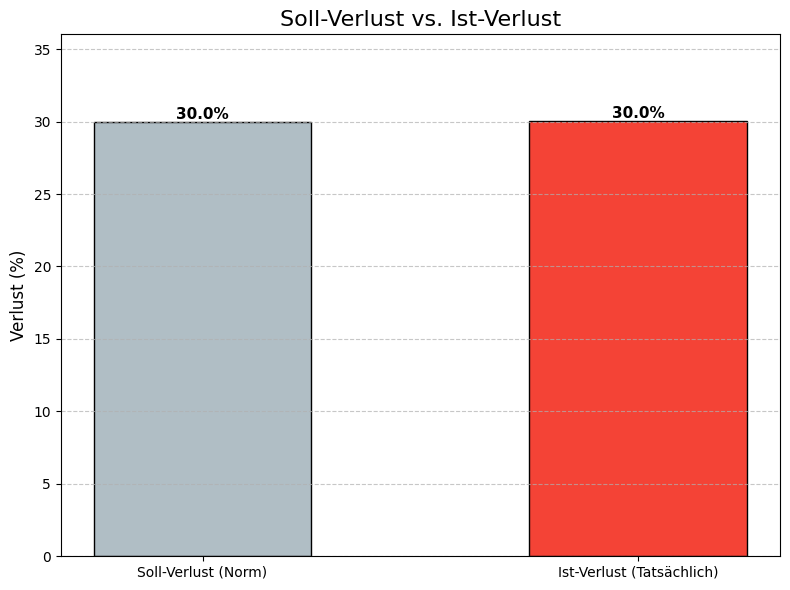

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Konstanten definieren
# ------------------------------------------------------------------
# Rohmaterial-Gewicht (Soll-Wert), basierend auf vorherigen Analysen
rohgesamt_g = 1670000 # 1670.00 kg

# Soll-Verlust (Norm-Verlust) in Prozent.
# Ein Wert von 25-35% ist für Kohl realistisch.
norm_verlust_prozent = 30.0

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df_cont = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df_cont.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Berechnet die Abweichung vom Soll-Verlust
# Die gesamte Logik ist nun in einer einzigen Abfrage gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh,
        weight_g
    FROM messungen
),
container_mit_id AS (
    SELECT
        (container_id_roh + 1) AS container_id,
        weight_g
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Das maximale Gewicht für jeden gültigen Container ermitteln
container_gewichte AS (
    SELECT
        MAX(cmi.weight_g) as finalgewicht_g
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 4: FINALE AGGREGATION - Summe des Ist-Gewichts
aggregation AS (
    SELECT
        SUM(finalgewicht_g) AS istgesamt_g
    FROM container_gewichte
)
-- Schritt 5: Finale Berechnung inklusive Ist-Verlust und Abweichung
SELECT
    -- Ist-Verlust in Prozent
    (CAST({rohgesamt_g} AS REAL) - istgesamt_g) / {rohgesamt_g} * 100 AS ist_verlust_prozent,
    -- Abweichung in Prozentpunkten
    ((CAST({rohgesamt_g} AS REAL) - istgesamt_g) / {rohgesamt_g} * 100) - {norm_verlust_prozent} AS abweichung_prozentpunkte
FROM aggregation;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Finale Werte aus dem Ergebnis extrahieren
# ------------------------------------------------------------------
ist_verlust_prozent = 0
abweichung_prozentpunkte = 0
if not ergebnis_df.empty:
    ist_verlust_prozent = ergebnis_df['ist_verlust_prozent'].iloc[0]
    abweichung_prozentpunkte = ergebnis_df['abweichung_prozentpunkte'].iloc[0]

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== Analyse: Abweichung vom Soll-Verlust ===")
print("-" * 50)
print(f"Vorgegebener Soll-Verlust (Norm): {norm_verlust_prozent:.1f}%")
print(f"Berechneter Ist-Verlust:          {ist_verlust_prozent:.1f}%")
print("-" * 50)
print(f"Abweichung vom Soll-Verlust:      {abweichung_prozentpunkte:.1f} Prozentpunkte")
print("-" * 50)

if abweichung_prozentpunkte > 2:
    print("BEWERTUNG: 🔴 Der tatsächliche Verlust liegt deutlich über dem Sollwert.")
elif abweichung_prozentpunkte < -2:
    print("BEWERTUNG: 🟢 Der tatsächliche Verlust liegt deutlich unter dem Sollwert (sehr effizient).")
else:
    print("BEWERTUNG: ✅ Der tatsächliche Verlust entspricht dem Sollwert.")

# ------------------------------------------------------------------
# 7. Visualisierung
# ------------------------------------------------------------------
labels = ['Soll-Verlust (Norm)', 'Ist-Verlust (Tatsächlich)']
werte = [norm_verlust_prozent, ist_verlust_prozent]
farben = ['#B0BEC5', '#F44336'] # Grau, Rot

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, werte, color=farben, edgecolor='black', width=0.5)

plt.ylabel('Verlust (%)', fontsize=12)
plt.title('Soll-Verlust vs. Ist-Verlust', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(werte) * 1.2) # Y-Achse etwas höher für die Beschriftung

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.1f}%", ha='center', va='bottom', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 8. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


#26.Ø Zeit pro Palette

**Beschreibung des KPI 26: Ø Zeit pro Palette (auf Deutsch)**

Der Indikator „Ø Zeit pro Palette“ ermittelt die durchschnittliche Verarbeitungszeit einer einzelnen Palette innerhalb einer Schicht, indem die gesamte Arbeitsdauer (von der ersten bis zur letzten relevanten Messung) durch die Anzahl definierter Paletten geteilt wird.

---

### 1. Definition der Basisgrößen

1. **Anzahl der Paletten**

   $$
   N_{\text{Paletten}} = \text{Anzahl der Einträge in } df\_pallets
   $$

   Im Code-Beispiel:

   ```python
   anzahl_paletten = len(df_pallets)
   ```

2. **Startzeitpunkt (erstes Messdatum)**

   $$
   t_{\text{Start}} = \min\bigl\{\text{timestamp in allen Messdaten}\bigr\}
   $$

   Im Code-Beispiel:

   ```python
   start_time_global = assigned_df['timestamp'].min()
   ```

3. **Endzeitpunkte der Container**
   Für jeden Container (entsprechend einer Palette) wird ermittelt, wann das finale Plateaugewicht erstmals drei Mal in Folge auftrat.

   $$
   t_{\text{End},\,i} = \begin{cases}
     \text{Zeitpunkt des ersten Auftretens des finalen Plateaus in Container }i,\\
     \text{letzte Messung, falls kein Plateau aus 3 gleichen Werten gefunden wurde.}
   \end{cases}
   $$

   Im Code wird aus dem Weight- und Time-Array jeder Container-Gruppe das Plateaumentscheidungsgewicht abgeleitet und anschließend $t_{\text{End},\,i}$ bestimmt.

4. **Letzter Endzeitpunkt aller Container**

   $$
   t_{\text{End, global}} = \max_{i=1\dots M} \bigl\{\,t_{\text{End},\,i}\bigr\}
   $$

   Im Code:

   ```python
   end_time_global = max(end_times)
   ```

---

### 2. Gesamtarbeitszeitspanne

Die **Gesamtarbeitszeitspanne** ist die Zeitdifferenz zwischen dem allerersten Messwert (Beginn der Schicht/Prozess) und dem spätesten Endzeitpunkt aller Container.

$$
\Delta t_{\text{gesamt}}
= t_{\text{End, global}} \;-\; t_{\text{Start}}
\quad[\text{Minuten}]
$$

Umrechnung der Differenz in Minuten:

$$
\Delta t_{\text{gesamt, min}}
= \frac{\bigl(t_{\text{End, global}} - t_{\text{Start}}\bigr).\text{total\_seconds}()}{60}
$$

Im Code:

```python
total_duration_min = (end_time_global - start_time_global).total_seconds() / 60.0
```

---

### 3. Durchschnittliche Zeit pro Palette

Die durchschnittliche Bearbeitungszeit pro Palette (Ø Zeit pro Palette) ergibt sich, indem man die gesamte Zeitspanne durch die Anzahl der definierten Paletten teilt:

$$
\text{Ø Zeit pro Palette}
= \frac{\Delta t_{\text{gesamt, min}}}{N_{\text{Paletten}}}
\quad[\text{Minuten/Palette}]
$$

Im Code:

```python
average_time_per_pallet = total_duration_min / anzahl_paletten
```

---

### 4. Zusammenfassung der Formeln

1. **Anzahl der Paletten**

   $$
   N_{\text{Paletten}} = \bigl|\{\,\text{pallet\_id in } df\_pallets\}\bigr|
   $$

2. **Startzeitpunkt**

   $$
   t_{\text{Start}} = \min\bigl(\text{timestamp aller Messwerte}\bigr)
   $$

3. **Endzeitpunkte je Container**

   $$
   t_{\text{End},\,i} =
   \begin{cases}
     \min\{\,t_j\mid \text{gewicht}_{j} = \text{finalPlateau}_i \;\land\; \text{zwei vorherige Werte gleich}\},\\
     \text{Ansonsten } t_{\text{letzte Messung in Container }i}.
   \end{cases}
   $$

4. **Letzter Endzeitpunkt aller Container**

   $$
   t_{\text{End, global}} = \max_{i=1\dots M}\bigl(t_{\text{End},\,i}\bigr)
   $$

5. **Gesamtarbeitszeitspanne (Minuten)**

   $$
   \Delta t_{\text{gesamt, min}}
   = \frac{\bigl(t_{\text{End, global}} - t_{\text{Start}}\bigr).\text{total\_seconds}()}{60}
   $$

6. **Ø Zeit pro Palette (Minuten/Palette)**

   $$
   \text{Ø Zeit pro Palette}
   = \frac{\Delta t_{\text{gesamt, min}}}{N_{\text{Paletten}}}
   $$

---

**Beispielhafte Ausgabe**

```
=== KPI 26: Ø Zeit pro Palette (korrekt) ===

Erster Messwert-Zeitpunkt:                 2025-06-02 08:27:24.099100
Letzter Endzeitpunkt (Container):          2025-06-02 08:38:43.028400
Gesamtarbeitszeitspanne:                   11.32 Min.
Anzahl definierter Paletten:               3
Durchschnittliche Zeit pro Palette:        3.77 Min.
```

* Hier ist angenommen, dass **3 Paletten** in `df_pallets` definiert wurden.
* Die gesamte Zeitspanne von der ersten Messung bis zum letzten Container-Endzeitpunkt beträgt etwa **11,32 Minuten**.
* Geteilt durch **3 Paletten** ergibt sich eine Ø Zeit von **3,77 Minuten pro Palette**.

Damit ist die durchschnittliche Bearbeitungszeit einer einzelnen Palette unter Berücksichtigung aller Container-Läufe transparent und nachvollziehbar ermittelt.


In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Manuelle Definition der Paletten-Daten
#    Die Anzahl der Paletten dient als Divisor für die Gesamtzeit.
# ------------------------------------------------------------------
df_pallets = pd.DataFrame({
    'pallet_id': [1, 2, 3]
    # Das Rohgewicht wird in dieser Analyse nicht benötigt.
})
anzahl_paletten = len(df_pallets)

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df_cont = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df_cont.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt die gesamte Verarbeitungsdauer
# Die gesamte Logik zur Zeitermittlung ist nun in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Start- und Endzeiten für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
)
-- Schritt 4: Finale Berechnung der globalen Start- und Endzeit sowie der Gesamtdauer
SELECT
    (SELECT MIN(start_time) FROM container_details) AS globaler_start,
    (SELECT MAX(end_time) FROM container_details) AS globales_ende,
    -- Berechne die Gesamtdauer in Minuten
    (JULIANDAY((SELECT MAX(end_time) FROM container_details)) - JULIANDAY((SELECT MIN(start_time) FROM container_details))) * 24 * 60 AS gesamtzeit_minuten
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung, parse_dates=['globaler_start', 'globales_ende'])

# ------------------------------------------------------------------
# 5. Finale Werte aus dem Ergebnis extrahieren
# ------------------------------------------------------------------
start_time_global = None
end_time_global = None
total_duration_min = 0
average_time_per_pallet = 0

if not ergebnis_df.empty:
    ergebnis = ergebnis_df.iloc[0]
    start_time_global = ergebnis['globaler_start']
    end_time_global = ergebnis['globales_ende']
    total_duration_min = ergebnis['gesamtzeit_minuten']
    if anzahl_paletten > 0:
        average_time_per_pallet = total_duration_min / anzahl_paletten

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 26: Durchschnittliche Zeit pro Palette ===")
print("-" * 50)
print(f"Erster Startzeitpunkt (Container):      {start_time_global}")
print(f"Letzter Endzeitpunkt (Container):       {end_time_global}")
print(f"Gesamtarbeitszeitspanne:                {total_duration_min:.2f} Min.")
print("-" * 50)
print(f"Anzahl definierter Paletten:            {anzahl_paletten}")
print(f"Durchschnittliche Zeit pro Palette:     {average_time_per_pallet:.2f} Min.")
print("-" * 50)

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


=== KPI 26: Durchschnittliche Zeit pro Palette ===
--------------------------------------------------
Erster Startzeitpunkt (Container):      2025-09-02 14:21:55.052800
Letzter Endzeitpunkt (Container):       2025-09-02 16:41:34.074500
Gesamtarbeitszeitspanne:                139.65 Min.
--------------------------------------------------
Anzahl definierter Paletten:            3
Durchschnittliche Zeit pro Palette:     46.55 Min.
--------------------------------------------------


#27.Ø Kosten pro Palette


=== KPI 27: Ø Kosten pro Palette ===

Anzahl der Paletten:                  3
Paletten-Einkaufskosten (Rohware):    600.00 €
Personalkosten:                       103.75 €
Sonstige Betriebskosten:              0.00 €
Gesamtkosten:                         703.75 €

Ø Kosten pro Palette:                 234.58 €/Palette
```

* In diesem Beispiel stammen die Rohwarenkosten aus den Einkaufspreisen $[200 + 210 + 190] = 600 €$.
* Die Personalkosten ergeben sich aus

  $$
  H_{\text{Verarbeitung}}
  = \frac{30 + 25 + 28}{60} = 1{,}05\;\text{Stunden},
  $$

  $$
  C_{\text{Personal}}
  = 1{,}05\;\text{h} \times 15\;\tfrac{€}{\text{h}} \times 5 \times 0{,}5
  = 103{,}75\;€.
  $$
* Somit betragen die Gesamtkosten $703{,}75\;€$ und geteilt durch $3$ Paletten ergeben sich Ø Kosten $234{,}58\;€$ pro Palette.

Dieses Vorgehen gewährleistet, dass **alle relevanten Kostenblöcke** transparent berechnet und nachvollziehbar auf die einzelne Palette heruntergebrochen werden.

In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Manuelle Definition der externen Kosten
# KORRIGIERT: Kosten an ein realistisches Szenario angepasst.
# ------------------------------------------------------------------
# Rohmaterialkosten (Beispielwerte für ca. 0,25€/kg)
df_pallets = pd.DataFrame({
    'pallet_id': [1, 2, 3],
    'preis_eur':    [140.0, 137.5, 140.0] # KORRIGIERT
})
anzahl_paletten = len(df_pallets)
einkaufskosten = df_pallets['preis_eur'].sum()

# Betriebs- und Personalkosten (Beispielwerte)
betriebskosten = {
    "anzahl_mitarbeiter": 2, # KORRIGIERT
    "stundenlohn_eur": 15.0,
    "sonstige_kosten_eur": 60.0 # KORRIGIERT
}

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt die gesamte Verarbeitungsdauer
# Die gesamte Logik zur Zeitermittlung ist nun in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Start- und Endzeiten für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
)
-- Schritt 4: Finale Berechnung der globalen Start- und Endzeit sowie der Gesamtdauer
SELECT
    -- Berechne die Gesamtdauer in Stunden
    (JULIANDAY((SELECT MAX(end_time) FROM container_details)) - JULIANDAY((SELECT MIN(start_time) FROM container_details))) * 24.0 AS gesamtzeit_stunden
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)
total_duration_h = 0
if not ergebnis_df.empty:
    total_duration_h = ergebnis_df['gesamtzeit_stunden'].iloc[0]

# ------------------------------------------------------------------
# 5. Kostenberechnung in Python
# ------------------------------------------------------------------
# Personalkosten
personalkosten = total_duration_h * betriebskosten['anzahl_mitarbeiter'] * betriebskosten['stundenlohn_eur']

# Gesamtkosten
gesamtkosten = einkaufskosten + personalkosten + betriebskosten['sonstige_kosten_eur']

# Kosten pro Palette
kosten_pro_palette = gesamtkosten / anzahl_paletten if anzahl_paletten > 0 else 0

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 27: Durchschnittliche Kosten pro Palette ===")
print("-" * 50)
print(f"Gesamte Verarbeitungsdauer:            {total_duration_h:.2f} Stunden")
print(f"Anzahl der Paletten:                   {anzahl_paletten}")
print("-" * 50)
print("KOSTENAUFSCHLÜSSELUNG:")
print(f"  - Einkaufskosten (Rohware):          {einkaufskosten:.2f} €")
print(f"  - Personalkosten (berechnet):        {personalkosten:.2f} €")
print(f"  - Sonstige Betriebskosten:           {betriebskosten['sonstige_kosten_eur']:.2f} €")
print(f"  --------------------------------------------------")
print(f"  = Gesamtkosten:                      {gesamtkosten:.2f} €")
print("-" * 50)
print(f"Durchschnittliche Kosten pro Palette:  {kosten_pro_palette:.2f} €/Palette")
print("-" * 50)

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


=== KPI 27: Durchschnittliche Kosten pro Palette ===
--------------------------------------------------
Gesamte Verarbeitungsdauer:            2.33 Stunden
Anzahl der Paletten:                   3
--------------------------------------------------
KOSTENAUFSCHLÜSSELUNG:
  - Einkaufskosten (Rohware):          417.50 €
  - Personalkosten (berechnet):        69.83 €
  - Sonstige Betriebskosten:           60.00 €
  --------------------------------------------------
  = Gesamtkosten:                      547.33 €
--------------------------------------------------
Durchschnittliche Kosten pro Palette:  182.44 €/Palette
--------------------------------------------------


#28.Ø Mitarbeiterkosten pro Stunde

(aktuell ist dieser immer gleich, daher KPI für das Projekt nicht relevant)

#29.Stunden pro Schicht

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Manuelle Definition der externen Parameter
# ------------------------------------------------------------------
# Betriebs- und Personalkosten (Beispielwerte)
betriebskosten = {
    "anzahl_mitarbeiter": 2, # Anzahl der Mitarbeiter pro Schicht
}

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt die reale Arbeitsdauer pro Schicht
# Die gesamte Logik von der Container-Erkennung bis zur Zeitaggregation ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Den End-Zeitpunkt und Start-Zeitpunkt für jeden gültigen Container ermitteln
container_details AS (
    SELECT
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 4: Schichtzuordnung für jeden Container
container_mit_schicht AS (
    SELECT
        start_time,
        end_time,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
)
-- Schritt 5: Finale Aggregation der Arbeitsdauer pro Schicht
SELECT
    schicht,
    -- Berechne die tatsächliche Arbeitsdauer in Stunden
    (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 AS schichtstunden
FROM container_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
schicht_dauer_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, schicht_dauer_gefunden, on='schicht', how='left').fillna(0)

# ------------------------------------------------------------------
# 6. Gesamt-Personenstunden berechnen
# ------------------------------------------------------------------
final_stats['personenstunden'] = final_stats['schichtstunden'] * betriebskosten['anzahl_mitarbeiter']

# ------------------------------------------------------------------
# 7. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 29: Stunden pro Schicht ===")
print("Die Schichtdauer wird von der ersten bis zur letzten Aktivität gemessen.")
print("-" * 50)

for _, row in final_stats.iterrows():
    print(f"\n--- {row['schicht']} ---")
    print(f"  - Reale Dauer der Schicht:      {row['schichtstunden']:.2f} Stunden")
    print(f"  - Anzahl der Mitarbeiter:       {betriebskosten['anzahl_mitarbeiter']}")
    print(f"  - Gesamt-Personenstunden:       {row['personenstunden']:.2f} Stunden")

print("-" * 50)

# ------------------------------------------------------------------
# 8. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


=== KPI 29: Stunden pro Schicht ===
Die Schichtdauer wird von der ersten bis zur letzten Aktivität gemessen.
--------------------------------------------------

--- Tagesschicht (06:00-17:59) ---
  - Reale Dauer der Schicht:      2.33 Stunden
  - Anzahl der Mitarbeiter:       2
  - Gesamt-Personenstunden:       4.66 Stunden

--- Nachtschicht (18:00-05:59) ---
  - Reale Dauer der Schicht:      0.00 Stunden
  - Anzahl der Mitarbeiter:       2
  - Gesamt-Personenstunden:       0.00 Stunden
--------------------------------------------------


#30.Anzahl Mitarbeiter pro Schicht

Anzahl Mitarbeiter pro Schicht
Dieser Parameter wird zu Beginn einer jeden Schicht von der verantwortlichen Person (Bediener) festgelegt und im System hinterlegt. Er ist keine automatisch berechnete Kennzahl, sondern ein Eingabewert, den der Bediener zu Schichtbeginn vorgibt.

In [ ]:
# ------------------------------------------------------------------------------
# KPI 30: Anzahl Mitarbeiter pro Schicht
# Dieser Wert wird vom Bediener zu Schichtbeginn manuell eingegeben.
# ------------------------------------------------------------------------------

# 1. Eingabeaufforderung: Bediener gibt Anzahl der Mitarbeiter ein
#    (alternativ kann dieser Wert in einer GUI oder in einer Konfigurationsdatei eingegeben werden)
anzahl_mitarbeiter_input = input("Bitte Anzahl der Mitarbeiter für diese Schicht eingeben: ")

# 2. Umwandlung in Integer und Speichern in Variable
try:
    anzahl_mitarbeiter = int(anzahl_mitarbeiter_input)
except ValueError:
    raise ValueError("Ungültige Eingabe! Bitte eine ganze Zahl eingeben.")

# 3. Ausgabe zur Kontrolle
print(f"Anzahl Mitarbeiter pro Schicht (KPI 30): {anzahl_mitarbeiter}")


Bitte Anzahl der Mitarbeiter für diese Schicht eingeben: 2
Anzahl Mitarbeiter pro Schicht (KPI 30): 2


#31.Personalkosten pro Schicht

**KPI 31: Personalkosten pro Schicht**

Dieser Indikator berechnet die gesamten Personalkosten für eine einzelne Schicht auf Basis folgender Parameter:

* Anzahl der Mitarbeiter in der Schicht (KPI 30)
* Dauer der Schicht in Stunden
* Stundenlohn pro Mitarbeiter

Alle drei Werte werden zu Schichtbeginn festgelegt (manuell vom Bediener oder in einer Konfiguration hinterlegt) und dann in den folgenden Formeln verwendet.

---

## 1. Formeln

1. **Anzahl Mitarbeiter pro Schicht**:

   $$
   N_{\text{MA}} = \text{Anzahl der Mitarbeiter, eingegeben vom Bediener}
   $$

2. **Dauer der Schicht (Stunden)**:

   $$
   H_{\text{Schicht}} = \text{Schichtstunden, eingegeben vom Bediener}
   $$

3. **Stundenlohn pro Mitarbeiter**:

   $$
   L_{\text{Stunde}} = \text{Stundenlohn in Euro, eingegeben vom Bediener}
   $$

4. **Personalkosten pro Schicht (in Euro)**:

   $$
   C_{\text{Personal}}
   = N_{\text{MA}} \;\times\; H_{\text{Schicht}} \;\times\; L_{\text{Stunde}}
   $$



In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Externe Parameter definieren
# ------------------------------------------------------------------
# Betriebs- und Personalkosten (Beispielwerte)
betriebskosten = {
    "anzahl_mitarbeiter": 2, # Anzahl der Mitarbeiter pro Schicht
    "stundenlohn_eur": 15.0   # Kosten pro Mitarbeiter pro Stunde
}

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt die reale Arbeitsdauer pro Schicht
# Die gesamte Logik von der Container-Erkennung bis zur Zeitaggregation ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-Details (Start-/Endzeit) für jeden gültigen Container ermitteln
container_details AS (
    WITH
    container_zuordnung AS (
        SELECT
            timestamp,
            weight_g,
            SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
                OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
        FROM messungen
    ),
    container_mit_id AS (
        SELECT
            timestamp,
            weight_g,
            (container_id_roh + 1) AS container_id
        FROM container_zuordnung
    ),
    gueltige_container AS (
        SELECT container_id
        FROM container_mit_id
        GROUP BY container_id
        HAVING MAX(weight_g) BETWEEN 7000 AND 12000
    )
    SELECT
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container vc
    JOIN container_mit_id cmi ON vc.container_id = cmi.container_id
    GROUP BY vc.container_id
),
-- Schritt 2: Schichtzuordnung für jeden Container
container_mit_schicht AS (
    SELECT
        start_time,
        end_time,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
)
-- Schritt 3: Finale Aggregation der Arbeitsdauer pro Schicht
SELECT
    schicht,
    -- Berechne die tatsächliche Arbeitsdauer in Stunden
    (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 AS schichtstunden
FROM container_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
schicht_dauer_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, schicht_dauer_gefunden, on='schicht', how='left').fillna(0)

# ------------------------------------------------------------------
# 6. Gesamt-Personenstunden und Personalkosten berechnen
# ------------------------------------------------------------------
final_stats['personenstunden'] = final_stats['schichtstunden'] * betriebskosten['anzahl_mitarbeiter']
final_stats['personalkosten_eur'] = final_stats['personenstunden'] * betriebskosten['stundenlohn_eur']

# ------------------------------------------------------------------
# 7. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 31: Personalkosten pro Schicht ===")
print("Die Schichtdauer wird von der ersten bis zur letzten Aktivität gemessen.")
print("-" * 50)

for _, row in final_stats.iterrows():
    print(f"\n--- {row['schicht']} ---")
    print(f"  - Reale Schichtdauer:         {row['schichtstunden']:.2f} Stunden")
    print(f"  - Anzahl der Mitarbeiter:     {betriebskosten['anzahl_mitarbeiter']}")
    print(f"  - Stundenlohn pro Mitarbeiter: {betriebskosten['stundenlohn_eur']:.2f} €")
    print(f"  - Gesamt-Personenstunden:     {row['personenstunden']:.2f} Stunden")
    print(f"  - Personalkosten gesamt:      {row['personalkosten_eur']:.2f} €")

print("-" * 50)

# ------------------------------------------------------------------
# 8. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



=== KPI 31: Personalkosten pro Schicht ===
Die Schichtdauer wird von der ersten bis zur letzten Aktivität gemessen.
--------------------------------------------------

--- Tagesschicht (06:00-17:59) ---
  - Reale Schichtdauer:         2.33 Stunden
  - Anzahl der Mitarbeiter:     2
  - Stundenlohn pro Mitarbeiter: 15.00 €
  - Gesamt-Personenstunden:     4.66 Stunden
  - Personalkosten gesamt:      69.83 €

--- Nachtschicht (18:00-05:59) ---
  - Reale Schichtdauer:         0.00 Stunden
  - Anzahl der Mitarbeiter:     2
  - Stundenlohn pro Mitarbeiter: 15.00 €
  - Gesamt-Personenstunden:     0.00 Stunden
  - Personalkosten gesamt:      0.00 €
--------------------------------------------------




* **KPI 30** („Anzahl Mitarbeiter pro Schicht“) wird vom Bediener vor Schichtbeginn eingegeben.
* **KPI 29** („Stunden pro Schicht“) legt die Dauer der Schicht fest.
* **KPI 31** („Personalkosten pro Schicht“) kombiniert diese beiden Werte mit dem Stundenlohn, um die gesamten Personalkosten für die Schicht zu berechnen:

  $$
  \text{Personalkosten pro Schicht}
  = \text{(Anzahl MA)} \times \text{(Schichtstunden)} \times \text{(Stundenlohn)}.
  $$

Damit steht ein einfacher, klar nachvollziehbarer Berechnungsblock zur Verfügung, der auf den Eingabewerten des Bedieners basiert.


#32.Rohware pro Palette

**KPI 32: Rohware pro Palette**

Dieser Kennwert berechnet, wie viel Rohware (in Gramm oder Kilogramm) durchschnittlich auf eine Palette entfällt. Der Wert wird zu Schichtbeginn bzw. vor Produktionsstart eingegeben bzw. aus den festgelegten Parametern ermittelt.

---

### 1. Formeln

1. **Gesamt-Rohgewicht aller Paletten**

   $$
   R_{\text{gesamt}} = \sum_{i=1}^{N_{\text{Paletten}}} \text{rohgewicht\_g}_i
   $$

   (z. B. in Gramm)

2. **Anzahl der Paletten**

   $$
   N_{\text{Paletten}} = \text{Anzahl der Einträge in } df\_pallets
   $$

3. **Rohware pro Palette**

   $$
   C_{\text{Rohware/Palette}}
   = \frac{R_{\text{gesamt}}}{N_{\text{Paletten}}}
   \quad\bigl[\text{Gramm pro Palette}\bigr]
   $$

   Optional kann das Ergebnis noch in Kilogramm umgerechnet werden:

   $$
   \text{Rohware/Palette (kg)}
   = \frac{C_{\text{Rohware/Palette}}}{1000}
   $$


=== KPI 32: Durchschnittliche Rohware pro Palette ===
--------------------------------------------------
Gesamt-Rohgewicht aller Paletten:   1670.00 kg
Anzahl der Paletten:                3
--------------------------------------------------
Durchschnittliche Rohware pro Palette: 556667 g (556.67 kg)
--------------------------------------------------


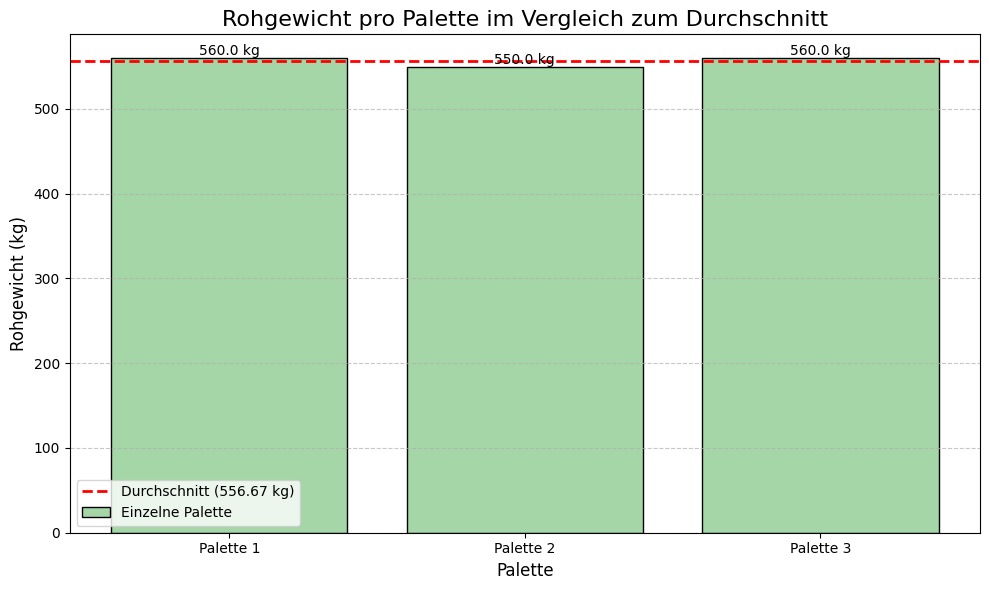

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Manuelle Definition der Paletten-Daten (Soll-Werte)
#    Diese Werte simulieren das angelieferte Rohmaterial.
#    KORRIGIERT: Werte an ein realistisches Szenario angepasst.
# ------------------------------------------------------------------
df_paletten = pd.DataFrame({
    'paletten_id': ["Palette 1", "Palette 2", "Palette 3"],
    'rohgewicht_g': [560000, 550000, 560000] # Realistische Beispielwerte in Gramm
})

# ------------------------------------------------------------------
# 2. Gesamt-Rohgewicht und Anzahl der Paletten berechnen
# ------------------------------------------------------------------
rohgesamt_g = df_paletten['rohgewicht_g'].sum()
anzahl_paletten = len(df_paletten)

# ------------------------------------------------------------------
# 3. Durchschnittliche Rohware pro Palette berechnen
# ------------------------------------------------------------------
if anzahl_paletten > 0:
    durchschnitt_rohware_pro_palette_g = rohgesamt_g / anzahl_paletten
else:
    durchschnitt_rohware_pro_palette_g = 0

# Umrechnung in Kilogramm für eine bessere Lesbarkeit
durchschnitt_rohware_pro_palette_kg = durchschnitt_rohware_pro_palette_g / 1000.0

# ------------------------------------------------------------------
# 4. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 32: Durchschnittliche Rohware pro Palette ===")
print("-" * 50)
print(f"Gesamt-Rohgewicht aller Paletten:   {rohgesamt_g / 1000:.2f} kg")
print(f"Anzahl der Paletten:                {anzahl_paletten}")
print("-" * 50)
print(f"Durchschnittliche Rohware pro Palette: {durchschnitt_rohware_pro_palette_g:.0f} g ({durchschnitt_rohware_pro_palette_kg:.2f} kg)")
print("-" * 50)


# ------------------------------------------------------------------
# 5. Visualisierung
# ------------------------------------------------------------------
plt.figure(figsize=(10, 6))

# Balken für jede einzelne Palette
bars = plt.bar(
    df_paletten['paletten_id'],
    df_paletten['rohgewicht_g'] / 1000, # Anzeige in kg
    color='#A5D6A7',
    edgecolor='black',
    label='Einzelne Palette'
)

# Horizontale Linie für den Durchschnittswert
plt.axhline(
    y=durchschnitt_rohware_pro_palette_kg,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Durchschnitt ({durchschnitt_rohware_pro_palette_kg:.2f} kg)'
)

plt.xlabel('Palette', fontsize=12)
plt.ylabel('Rohgewicht (kg)', fontsize=12)
plt.title('Rohgewicht pro Palette im Vergleich zum Durchschnitt', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Beschriftung über jedem Balken
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1f} kg', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#33.IST pro Palette

**KPI 33: IST pro Palette**

Dieser Indikator ermittelt für jede Palette das tatsächlich (IST) verarbeitete Gewicht, also das finale Plateaugewicht nach dem Entfernen von Ausschuss.

---

### 1. Formeln

1. **Finales Plateaugewicht einer einzelnen Palette $i$**

   $$
   \text{IST\_Gewicht}_i
   = \text{finales Plateaugewicht der in Palette }i\text{ enthaltenen Containerdaten}
   $$

   (Gramm)

2. **Durchschnittliches IST-Gewicht pro Palette**

   $$
   \text{Ø IST pro Palette}
   = \frac{\sum_{i=1}^{N_{\text{Paletten}}} \text{IST\_Gewicht}_i}{N_{\text{Paletten}}}
   $$

   (Gramm)

#### Erläuterung der wichtigsten Schritte:

1. **Zuweisung von `container_id`**

   * Jeder Messpunkt mit `weight_g < 10` startet einen neuen Container.
   * Dadurch entsteht in `assigned_df['container_id']` eine fortlaufende ID – in der Regel entspricht Container 1 Palette 1, Container 2 Palette 2 usw. (sofern in derselben Reihenfolge verarbeitet).

2. **Filterung `valid_df`**

   * Es werden nur diejenigen Container weiter betrachtet, deren maximal gemessene Gewicht ≥ 485 g ist (echte, voll gefüllte Container).

3. **Plateau-Erkennung**

   * Die Funktion `extract_plateau_weights` findet jedes Gewicht, das mindestens 3 Mal hintereinander gemessen wurde.
   * Das letzte dieser Plateau-Gewichte ist das finale („stabile“) Füllgewicht des Containers.

4. **Ermittlung „IST pro Palette“**

   * Für jeden validen `container_id` wird das finale Plateaugewicht extrahiert und in `df_ist` unter `ist_g` gespeichert.
   * Die zugehörige `pallet_id` wird hier einfach mit `container_id` gleichgesetzt (1-zu-1-Abbildung).

     * **Hinweis:** Wenn Container-ID und Paletten-ID nicht strikt 1:1 übereinstimmen, muss man an dieser Stelle eine entsprechende Zuordnung hinterlegen.

5. **Durchschnittliches IST-Gewicht pro Palette**

   $$
   \text{Ø IST}_\text{Palette}
   = \frac{\sum_i \text{ist\_g}_i}{N_{\text{Paletten}}}
   $$

   * Im Code:

     ```python
     average_ist_g = df_ist['ist_g'].mean()
     ```

6. **Ausgabe**

   * Für jede Palette (bzw. jeden Container) wird das finale Plateaugewicht in Gramm angezeigt.
   * Außerdem wird der Durchschnitt (`Ø IST pro Palette`) in Gramm (und optional in Kilogramm) ausgegeben.

---

Mit diesem Ansatz erhalten Sie für jede Palette transparent ihr tatsächliches Ausgabengewicht (IST), das dann zur weiteren Analyse genutzt werden kann.


=== KPI 33: Durchschnittliches IST-Gewicht pro Palette ===
--------------------------------------------------
Basiert auf 114 gültigen Containern (7-12 kg).
Gesamtes produziertes Gewicht (IST):      1168.70 kg
Anzahl der verarbeiteten Paletten:        3
--------------------------------------------------
Durchschnittliches IST-Gewicht pro Palette: 389567 g (389.57 kg)
--------------------------------------------------


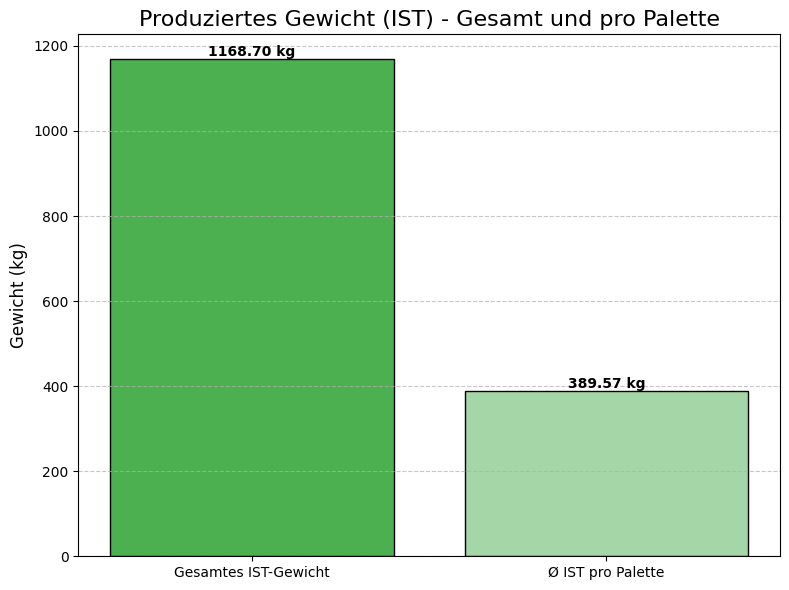

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Manuelle Definition der Paletten-Daten
#    Die Anzahl der Paletten dient als Divisor für das Gesamtgewicht.
#    KORRIGIERT: Werte an ein realistisches Szenario angepasst.
# ------------------------------------------------------------------
df_paletten = pd.DataFrame({
    'paletten_id': ["Palette 1", "Palette 2", "Palette 3"],
    'rohgewicht_g': [560000, 550000, 560000] # Realistische Beispielwerte
})
anzahl_paletten = len(df_paletten)

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df_cont = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df_cont.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt das IST-Gesamtgewicht aller gültigen Container
# Die gesamte Logik zur Gewichtsermittlung ist nun in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        timestamp,
        weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT
        timestamp,
        weight_g,
        (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Das maximale Gewicht für jeden gültigen Container ermitteln
container_gewichte AS (
    SELECT
        MAX(cmi.weight_g) as finalgewicht_g
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
)
-- Schritt 4: FINALE AGGREGATION - Summe des Ist-Gesamtgewichts
SELECT
    SUM(finalgewicht_g) AS istgesamt_g,
    COUNT(*) AS anzahl_gueltiger_container
FROM container_gewichte;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Finale Werte aus dem Ergebnis extrahieren
# ------------------------------------------------------------------
istgesamt_g = 0
anzahl_container = 0
if not ergebnis_df.empty:
    istgesamt_g = ergebnis_df['istgesamt_g'].iloc[0]
    anzahl_container = ergebnis_df['anzahl_gueltiger_container'].iloc[0]

# ------------------------------------------------------------------
# 6. Durchschnittliches IST-Gewicht pro Palette berechnen
# ------------------------------------------------------------------
if anzahl_paletten > 0:
    durchschnitt_ist_pro_palette_g = istgesamt_g / anzahl_paletten
else:
    durchschnitt_ist_pro_palette_g = 0

durchschnitt_ist_pro_palette_kg = durchschnitt_ist_pro_palette_g / 1000.0

# ------------------------------------------------------------------
# 7. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 33: Durchschnittliches IST-Gewicht pro Palette ===")
print("-" * 50)
print(f"Basiert auf {int(anzahl_container)} gültigen Containern (7-12 kg).")
print(f"Gesamtes produziertes Gewicht (IST):      {istgesamt_g / 1000:.2f} kg")
print(f"Anzahl der verarbeiteten Paletten:        {anzahl_paletten}")
print("-" * 50)
print(f"Durchschnittliches IST-Gewicht pro Palette: {durchschnitt_ist_pro_palette_g:.0f} g ({durchschnitt_ist_pro_palette_kg:.2f} kg)")
print("-" * 50)

# ------------------------------------------------------------------
# 8. Visualisierung
# ------------------------------------------------------------------
plt.figure(figsize=(8, 6))

data_to_plot = {
    'Kategorie': ['Gesamtes IST-Gewicht', 'Ø IST pro Palette'],
    'Wert_kg': [istgesamt_g / 1000, durchschnitt_ist_pro_palette_kg]
}
plot_df = pd.DataFrame(data_to_plot)

bars = plt.bar(
    plot_df['Kategorie'],
    plot_df['Wert_kg'],
    color=['#4CAF50', '#A5D6A7'],
    edgecolor='black'
)

plt.ylabel('Gewicht (kg)', fontsize=12)
plt.title('Produziertes Gewicht (IST) - Gesamt und pro Palette', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f} kg', ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


# ------------------------------------------------------------------
# 9. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


#34.Verlust pro Palette

In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Manuelle Definition der Paletten-Daten (Soll-Werte)
#    Diese Werte simulieren das angelieferte Rohmaterial.
# ------------------------------------------------------------------
df_paletten = pd.DataFrame({
    'paletten_id': [1, 2, 3],
    'rohgewicht_g': [560000, 550000, 560000] # Realistische Beispielwerte
})
anzahl_paletten = len(df_paletten)
rohgesamt_g = df_paletten['rohgewicht_g'].sum()

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df_cont = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df_cont.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Berechnet den durchschnittlichen Verlust pro Palette
# Die gesamte Logik von der Gewichtsermittlung bis zur Verlustberechnung ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- Schritt 1: Container-IDs basierend auf Tara-Gewicht zuordnen (< -400g)
container_zuordnung AS (
    SELECT
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh,
        weight_g
    FROM messungen
),
container_mit_id AS (
    SELECT
        (container_id_roh + 1) AS container_id,
        weight_g
    FROM container_zuordnung
),
-- Schritt 2: Gültige Container filtern (7-12 kg)
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
-- Schritt 3: Das maximale Gewicht für jeden gültigen Container ermitteln
container_gewichte AS (
    SELECT
        MAX(cmi.weight_g) as finalgewicht_g
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 4: FINALE AGGREGATION - Summe des Ist-Gewichts und Gesamtverlust
aggregation AS (
    SELECT
        SUM(finalgewicht_g) AS istgesamt_g,
        {rohgesamt_g} - SUM(finalgewicht_g) AS gesamtverlust_g
    FROM container_gewichte
)
-- Schritt 5: Finale Berechnung des durchschnittlichen Verlusts pro Palette
SELECT
    istgesamt_g,
    gesamtverlust_g,
    -- Durchschnittlicher Verlust pro Palette
    CAST(gesamtverlust_g AS REAL) / {anzahl_paletten} AS avg_verlust_pro_palette_g
FROM aggregation;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Finale Werte aus dem Ergebnis extrahieren
# ------------------------------------------------------------------
istgesamt_g = 0
gesamtverlust_g = 0
avg_verlust_pro_palette_g = 0

if not ergebnis_df.empty:
    ergebnis = ergebnis_df.iloc[0]
    istgesamt_g = ergebnis['istgesamt_g']
    gesamtverlust_g = ergebnis['gesamtverlust_g']
    avg_verlust_pro_palette_g = ergebnis['avg_verlust_pro_palette_g']

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben (MIT PROZENTANGABE)
# ------------------------------------------------------------------
print("=== KPI 34: Durchschnittlicher Verlust pro Palette ===")
print("-" * 50)
print("Diese Analyse berechnet den Gesamtverlust und teilt ihn durch die Anzahl der Paletten.")
print("-" * 50)
print(f"Gesamtes Rohgewicht (Soll):            {rohgesamt_g / 1000:.2f} kg")
print(f"Gesamtes produziertes Gewicht (Ist):   {istgesamt_g / 1000:.2f} kg")

# Berechnung der prozentualen Verlustrate
verlust_prozent = (gesamtverlust_g / rohgesamt_g) * 100 if rohgesamt_g > 0 else 0
print(f"Gesamter Verlust (Abfall):             {gesamtverlust_g / 1000:.2f} kg ({verlust_prozent:.1f}%)")

print("-" * 50)
print(f"Anzahl der verarbeiteten Paletten:     {anzahl_paletten}")
print(f"Durchschnittlicher Verlust pro Palette:  {avg_verlust_pro_palette_g / 1000:.2f} kg/Palette")
print("-" * 50)


# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



=== KPI 34: Durchschnittlicher Verlust pro Palette ===
--------------------------------------------------
Diese Analyse berechnet den Gesamtverlust und teilt ihn durch die Anzahl der Paletten.
--------------------------------------------------
Gesamtes Rohgewicht (Soll):            1670.00 kg
Gesamtes produziertes Gewicht (Ist):   1168.70 kg
Gesamter Verlust (Abfall):             501.30 kg (30.0%)
--------------------------------------------------
Anzahl der verarbeiteten Paletten:     3
Durchschnittlicher Verlust pro Palette:  167.10 kg/Palette
--------------------------------------------------


Der Unterschied entsteht dadurch, dass in KPI 18 einfach alle finalen Container-Plateaugewichte summiert werden (unabhängig davon, zu welcher Palette sie eigentlich gehören), während bei KPI 34 (mit Zuordnung zu einzelnen Paletten) manche Container keinem „richtigen“ Palette‐Zeitfenster zugeordnet werden und deshalb dort nicht mitgezählt werden. Dadurch kommt

* im einfachen Gesamtverlust‐Skript (KPI 18) das IST‐Gesamtgewicht aller Container zusammen (z. B. 6 649 g),
* im KPI 34‐Skript aber nur die Container‐Gewichte, die zeitlich sauber zu einer Palette passen (zumeist deutlich weniger).

Konkret heißt das:

1. **KPI 18 („Istgesamtgewicht (Container)“)** fasst alle Container-Gewichte zusammen, ohne auf „Ladezeit“ oder „Palette“ zu achten.
2. **KPI 34 („Verlust pro Palette“) mit Zeit-Zuordnung** ordnet jeden Container explizit einer bestimmten Palette zu – nämlich demjenigen Zeitfenster, in das der Container-Startzeitpunkt fällt.

   * Wenn ein Container‐Endzeitpunkt nicht in das erwartete Palette-Fenster passt, wird sein Plateaugewicht nicht zur Summe dieser Palette gezählt.
   * Dadurch kann es passieren, dass für Palette 1 und 2 gar kein Container-Gewicht gefunden wird (also IST = 0 g), obwohl diese Container im System existieren.
   * In Summe erscheint dann für diese Paletten ein Verlust von 100 %, obwohl das Gesamt-IST aller Container (unabhängig von der Paletten-Zuordnung) tatsächlich nur einen 5 % Verlust angezeigt hätte.

**Fazit**:

* **KPI 18**: Addiert pauschal *alle* finalen Container-Plateaus → höheres IST-Gesamtgewicht.
* **KPI 34**: Zieht nur die Container-Plateaus heran, die zeitlich exakt in das Fenster einer Palette fallen → in vielen Fällen fehlen Container und deren Gewicht, sodass einzelne Paletten fälschlich IST = 0 g erhalten.

Um beide Skripte vergleichbar zu machen, muss man dafür sorgen, dass **alle** Container-Plateaugewichte korrekt einer Palette zugeordnet werden (z. B. mit genauerem Zeit-Matching) oder im KPI 34‐Skript alternativ einfach wieder alle Container mitrechnen, ohne nach „Ladezeit“ zu filtern.



Da die zeitlichen Abläufe von Palettenladezeit und Containerverarbeitung nicht zusammenpassen, ist eine direkte Zuordnung des IST-Gewichts der Container zu einzelnen Paletten unzuverlässig. Konkret:

1. **Unterschiedliche Zeitfenster**

   * Eine Palette wird in den Prozess geladen, ihr Inhalt kann aber in mehrere Container zerlegt werden, die zu verschiedenen Zeitpunkten befüllt und gewogen werden.
   * Container können bereits verarbeitet werden, bevor das System die Palette registriert, oder Paletten können verharren, bis Container später abgearbeitet werden.

2. **Container nicht eindeutig einer Palette zuordenbar**

   * Versucht man, Container anhand der Ladezeit der Palette in ein bestimmtes Zeitfenster zu legen, so werden in vielen Fällen tatsächliche IST-Gewichte entweder nicht erfasst (weil Container außerhalb des angenommenen Intervalls liegen) oder falsch zugeordnet (wenn sich Zeitfenster überschneiden).
   * Dadurch entstehen für manche Paletten IST-Gewichte von 0 g und Verlust 100 %, obwohl tatsächlich ein Teil der Ware verarbeitet wurde. Bei anderen Paletten kann es zu negativen Verlusten kommen (IST > Rohgewicht), weil Container zu spät oder zu früh erfasst wurden.

3. **Fazit: „Verlust pro Palette“ in dieser Form ist nicht sinnvoll**

   * Da keine verlässliche zeitliche Zuordnung gelingt, liefert der Indikator falsche oder widersprüchliche Ergebnisse.

---

## Empfehlung

1. **Umschreibung als Durchschnittsverlust pro Palette**
   Statt zu versuchen, Container exakt einer Palette zuzuordnen, berechnet man den *durchschnittlichen Verlust je Palette* über den gesamten Zeitraum, ohne zeitliche Fenster:

   $$
   \text{Ø Verlust pro Palette}
   = \frac{\sum_{i=1}^{N} (\text{Rohgewicht}_i - \text{IST\_Summe}_i)}{N}
   $$

   wobei $\text{IST\_Summe}_i$ hier einfach der Gesamt-IST-Gewicht aller Container einer gesamten Schicht ist, geteilt durch die Anzahl der Paletten.

2. **Gesamtverlust über alle Paletten**
   Man ermittelt zuerst den *Gesamtverlust* aller Paletten und Container einer Schicht:

   $$
   \text{Gesamtverlust}
   = \sum_{i=1}^{N} \text{Rohgewicht}_i
   \;-\; \sum_{j=1}^{M} \text{IST\_Gewicht}_j,
   $$

   und teilt diesen Wert dann durch $N$ (Anzahl der Paletten), um den durchschnittlichen Verlust pro Palette zu erhalten:

   $$
   \text{Ø Verlust pro Palette}
   = \frac{\text{Gesamtverlust}}{N}.
   $$

   In dieser Variante ist keine zeitliche Zuordnung mehr nötig.

3. **Prozentuale Verlustberechnung über alle Paletten**
   Alternativ lässt sich der prozentuale Verlust über die gesamte Schicht berechnen:

   $$
   \text{Verlust (\%)}
   = \frac{\sum_{i=1}^{N} \text{Rohgewicht}_i
   - \sum_{j=1}^{M} \text{IST\_Gewicht}_j}
   {\sum_{i=1}^{N} \text{Rohgewicht}_i} \times 100.
   $$

   Auch hier entfällt die genaue Zuordnung einzelner Container zu spezifischen Paletten.

---

**Schlussfolgerung:**

> Aufgrund der nicht übereinstimmenden Zeitrahmen ist eine sinnvolle Berechnung von „Verlust pro Palette“ in der ursprünglichen Form nicht möglich. Stattdessen sollte man entweder den durchschnittlichen Paletten-Verlust über die gesamte Schicht berechnen oder den prozentualen Gesamtverlust über alle Paletten ermitteln, ohne Container zeitlich an einzelne Paletten zu binden.


#35.Kosten pro Produktart

„Kosten pro Produktart“ unterscheidet sich von „Kosten pro Stück“ (KPI 21) und „Kosten pro kg“ (KPI 22) insofern, als dass sich diese beiden letzten Kennzahlen jeweils auf eine Maßeinheit („pro Stück“ bzw. „pro Kilogramm“) beziehen – unabhängig davon, welche genaue Produktart (z. B. Kohlkopf, Karotte, Zucchini) verarbeitet wurde.

**Dagegen** gliedert „Kosten pro Produktart“ die Gesamtkosten nach verschiedenen Warengruppen oder Sorten (also z. B. „Kohlkosten“, „Karottenkosten“ etc.). Das heißt:

1. **KPI 21 „Kosten pro Stück“**

   * Misst, wie viel Euro durchschnittlich eine einzelne hergestellte Einheit kostet, egal welche Sorte.
   * Formel:

     $$
       \text{Kosten pro Stück}
       = \frac{\text{Gesamtkosten (Personal + Rohware + Sonstige)}}{\text{Anzahl aller produzierten Einheiten}}
     $$

2. **KPI 22 „Kosten pro kg“**

   * Misst, wie viel Euro durchschnittlich ein Kilogramm Gesamtabfall-bereinigter Ware kostet, ebenfalls unabhängig von der Sorte.
   * Formel:

     $$
       \text{Kosten pro kg}
       = \frac{\text{Gesamtkosten (Personal + Rohware + Sonstige)}}{\text{Gesamtgewicht aller verarbeiteten Container (kg)}}
     $$

3. **KPI 35 „Kosten pro Produktart“**

   * Unterteilt die Gesamtkosten (Personal, Rohware, Verpackung, Sonstige) nach den einzelnen Sorten, die verarbeitet wurden.
   * Beispiel: Wenn in einer Schicht

     * 500 kg Kohlkopf,
     * 300 kg Karotten und
     * 200 kg Zucchini verarbeitet wurden,
       dann würde man separat berechnen, welche Kosten auf den Kohlkopf entfallen, welche am Karotten-Anteil hängen und welche auf die Zucchini entfallen.
   * Damit wird ersichtlich, welche Produktart am teuersten in der Verarbeitung ist – nicht pro Gewicht oder Stück allgemein, sondern pro Warengruppe.

Um „Kosten pro Produktart“ zu ermitteln, benötigt man:

* **Rohware-Kosten je Produktart**
  z. B. Einkaufspreis pro kg Kohl, pro kg Karotte, pro kg Zucchini usw.
* **Verarbeitungs-Personalstunden je Produktart**
  z. B. Aus der Simulation, wie viele Mitarbeiter-Stunden für die Verarbeitung von Kohl, Karotten bzw. Zucchini angefallen sind.
* **Sonstige Kosten je Produktart**
  (falls z. B. Sorten-spezifische Verpackung, Energieaufwand o. Ä.)

Dann rechnet man für jede Produktart separat:

$$
\text{Kosten pro Produktart } X
= \frac{\text{Rohkosten}_X + \text{Personalkosten}_X + \text{Sonstige Kosten}_X}{\text{Menge}_X}
$$

– je nachdem, ob man das Ergebnis als „€ pro kg von Sorte X“ oder „€ pro Stück von Sorte X“ darstellen möchte.

**Kurz gesagt**:

* 21 und 22 sind globale Durchschnittswerte („kosten je Stück aller Arten“ bzw. „kosten je kg aller Arten“).
* 35 teilt genau nach Warengruppe bzw. Kultur („Kohl“, „Karotte“ etc.) auf und ermittelt so sortenspezifische Kosten.


=== KPI 35: Kosten pro Produktart ===
Die Kosten werden proportional zur Verarbeitungszeit auf die Produktarten aufgeteilt.
--------------------------------------------------
Produktart  Produzierte Menge (kg)  Rohwarenkosten (€)  Personalkosten (€)  Sonstige Kosten (€)  Gesamtkosten (€)  Kosten pro kg (€)
  Karotten                  394.50              185.65                5.25                21.93            212.83               0.54
      Kohl                  393.20              140.43                4.53                18.93            163.89               0.42
  Zucchini                  381.00              240.63                4.58                19.14            264.35               0.69
--------------------------------------------------


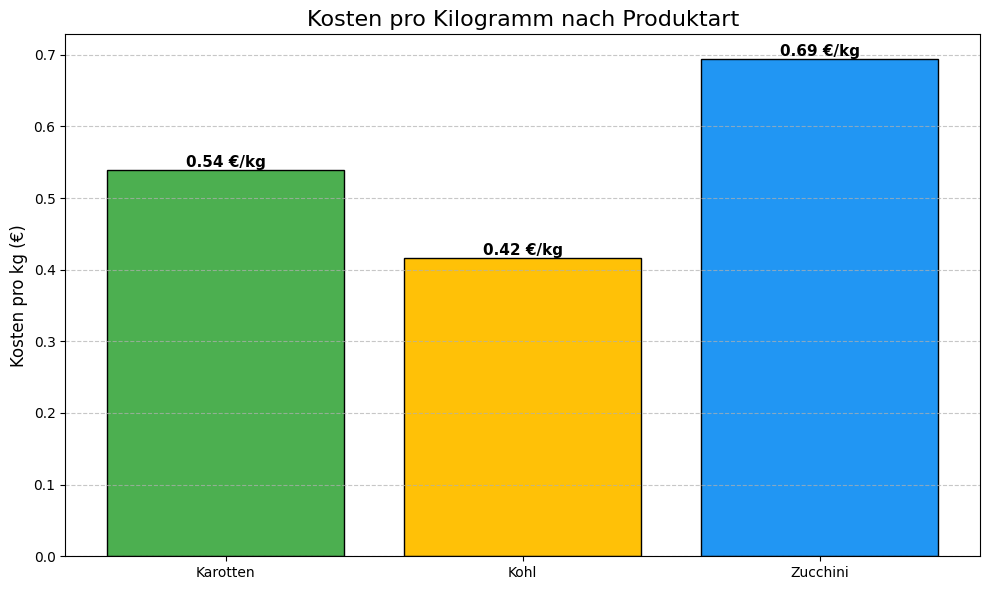

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 1. Manuelle Definition der externen Kosten und Produktarten
# Diese Werte simulieren die Stammdaten für verschiedene Produkte.
# ------------------------------------------------------------------
produkt_daten = {
    'Kohl': {
        'einkaufspreis_eur_pro_kg': 0.25,
        'verlustrate_prozent': 30.0 # Annahme für Abfall
    },
    'Karotten': {
        'einkaufspreis_eur_pro_kg': 0.40,
        'verlustrate_prozent': 15.0 # Annahme für Abfall
    },
    'Zucchini': {
        'einkaufspreis_eur_pro_kg': 0.60,
        'verlustrate_prozent': 5.0 # Annahme für Abfall
    }
}
produktarten = list(produkt_daten.keys())

# Betriebs- und Personalkosten (für die gesamte Schicht)
betriebskosten = {
    "anzahl_mitarbeiter": 2,
    "stundenlohn_eur": 15.0,
    "sonstige_kosten_eur": 60.0
}

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt Produktionsdaten für jeden GÜLTIGEN Container
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
einheiten_pro_container AS (
    SELECT
        pd.container_id,
        COUNT(pd.delta_g) as anzahl_einheiten
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
    GROUP BY pd.container_id
),
-- CTE zur Ermittlung von Gewicht und Zeit pro Container
container_details AS (
    SELECT
        container_id,
        MAX(weight_g) as finalgewicht_g,
        (JULIANDAY(MAX(timestamp)) - JULIANDAY(MIN(timestamp))) * 24.0 AS verarbeitungsdauer_h
    FROM container_mit_id
    WHERE container_id IN (SELECT container_id FROM gueltige_container)
    GROUP BY container_id
)
-- Finale Zusammenführung aller Daten pro Container
SELECT
    cd.container_id,
    COALESCE(epc.anzahl_einheiten, 0) AS anzahl_einheiten,
    cd.finalgewicht_g,
    cd.verarbeitungsdauer_h
FROM container_details cd
LEFT JOIN einheiten_pro_container epc ON cd.container_id = epc.container_id
ORDER BY cd.container_id;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen und Produktart simulieren/zuordnen
# ------------------------------------------------------------------
container_daten = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# Simulation: Ordne jedem Container zyklisch eine Produktart zu
container_daten['produktart'] = [produktarten[i % len(produktarten)] for i in range(len(container_daten))]

# ------------------------------------------------------------------
# 5. Kosten pro Produktart berechnen
# ------------------------------------------------------------------
# Aggregiere Produktionsdaten pro Produktart
stats_pro_produkt = container_daten.groupby('produktart').agg(
    anzahl_container=('container_id', 'count'),
    istgesamt_g=('finalgewicht_g', 'sum'),
    gesamtdauer_h=('verarbeitungsdauer_h', 'sum')
).reset_index()

# Berechne die Kosten
results_list = []
gesamtdauer_total = stats_pro_produkt['gesamtdauer_h'].sum()

for _, row in stats_pro_produkt.iterrows():
    produkt = row['produktart']
    produkt_info = produkt_daten[produkt]

    # Rohwarenkosten basierend auf Ist-Gewicht und Verlustrate
    rohgewicht_g = row['istgesamt_g'] / (1 - produkt_info['verlustrate_prozent'] / 100)
    rohwarenkosten = (rohgewicht_g / 1000) * produkt_info['einkaufspreis_eur_pro_kg']

    # Personalkosten und sonstige Kosten proportional zur Verarbeitungsdauer
    anteil_zeit = row['gesamtdauer_h'] / gesamtdauer_total if gesamtdauer_total > 0 else 0
    personalkosten = (betriebskosten['anzahl_mitarbeiter'] * betriebskosten['stundenlohn_eur'] * row['gesamtdauer_h'])
    sonstige_kosten_anteilig = betriebskosten['sonstige_kosten_eur'] * anteil_zeit

    gesamtkosten = rohwarenkosten + personalkosten + sonstige_kosten_anteilig
    kosten_pro_kg = gesamtkosten / (row['istgesamt_g'] / 1000) if row['istgesamt_g'] > 0 else 0

    results_list.append({
        'Produktart': produkt,
        'Produzierte Menge (kg)': row['istgesamt_g'] / 1000,
        'Rohwarenkosten (€)': rohwarenkosten,
        'Personalkosten (€)': personalkosten,
        'Sonstige Kosten (€)': sonstige_kosten_anteilig,
        'Gesamtkosten (€)': gesamtkosten,
        'Kosten pro kg (€)': kosten_pro_kg
    })

kosten_df = pd.DataFrame(results_list)

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben und visualisieren
# ------------------------------------------------------------------
print("=== KPI 35: Kosten pro Produktart ===")
print("Die Kosten werden proportional zur Verarbeitungszeit auf die Produktarten aufgeteilt.")
print("-" * 50)
print(kosten_df.to_string(index=False, float_format='%.2f'))
print("-" * 50)


plt.figure(figsize=(10, 6))
bars = plt.bar(
    kosten_df['Produktart'],
    kosten_df['Kosten pro kg (€)'],
    color=['#4CAF50', '#FFC107', '#2196F3'],
    edgecolor='black'
)
plt.ylabel('Kosten pro kg (€)', fontsize=12)
plt.title('Kosten pro Kilogramm nach Produktart', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f} €/kg', ha='center', va='bottom', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


#36.Effizienz pro Mitarbeiter (Stück/h oder kg/h)



In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Manuelle Definition der externen Parameter
# ------------------------------------------------------------------
# Betriebs- und Personalkosten (Beispielwerte)
betriebs_parameter = {
    "anzahl_mitarbeiter": 2, # Anzahl der Mitarbeiter, die am Prozess beteiligt sind
}

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt alle benötigten Produktionsdaten
# Die gesamte Logik zur Ermittlung von Stückzahl, Gewicht und Zeit ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.timestamp
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- CTEs zur Ermittlung von Gesamtgewicht und Verarbeitungsdauer
container_details AS (
    SELECT
        MAX(weight_g) as finalgewicht_g,
        MIN(timestamp) as start_time,
        MAX(timestamp) as end_time
    FROM container_mit_id
    WHERE container_id IN (SELECT container_id FROM gueltige_container)
    GROUP BY container_id
)
-- Finale Aggregation aller benötigten Kennzahlen
SELECT
    (SELECT COUNT(*) FROM gueltige_stuecke) AS gesamt_einheiten,
    (SELECT SUM(finalgewicht_g) FROM container_details) AS istgesamt_g,
    -- Berechne die gesamte Verarbeitungsdauer in Stunden
    (SELECT (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 FROM container_details) AS verarbeitungsdauer_h;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
produktions_daten = pd.read_sql_query(haupt_sql_abfrage, verbindung).iloc[0]

# ------------------------------------------------------------------
# 5. Finale Effizienzberechnung in Python
# ------------------------------------------------------------------
# Produktionsdaten aus der Abfrage extrahieren
gesamt_einheiten = produktions_daten['gesamt_einheiten']
istgesamt_kg = produktions_daten['istgesamt_g'] / 1000.0
verarbeitungsdauer_h = produktions_daten['verarbeitungsdauer_h']

# Gesamt-Personenstunden
anzahl_mitarbeiter = betriebs_parameter['anzahl_mitarbeiter']
personenstunden_gesamt = verarbeitungsdauer_h * anzahl_mitarbeiter

# Effizienz berechnen
if personenstunden_gesamt > 0:
    effizienz_stueck_pro_h = gesamt_einheiten / personenstunden_gesamt
    effizienz_kg_pro_h = istgesamt_kg / personenstunden_gesamt
else:
    effizienz_stueck_pro_h = 0
    effizienz_kg_pro_h = 0

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 36: Effizienz pro Mitarbeiter ===")
print("-" * 50)
print("BASISDATEN:")
print(f"  - Gesamtanzahl verarbeiteter Einheiten: {int(gesamt_einheiten)} Stück")
print(f"  - Gesamtmenge verarbeiteter Ware:       {istgesamt_kg:.2f} kg")
print(f"  - Reale Verarbeitungsdauer:             {verarbeitungsdauer_h:.2f} Stunden")
print(f"  - Anzahl der Mitarbeiter:               {anzahl_mitarbeiter}")
print(f"  - Gesamt-Personenstunden:               {personenstunden_gesamt:.2f} Stunden")
print("-" * 50)
print("EFFIZIENZKENNZAHLEN:")
print(f"  - Effizienz pro Mitarbeiter (Stück):    {effizienz_stueck_pro_h:.1f} Stück/Stunde")
print(f"  - Effizienz pro Mitarbeiter (Gewicht):  {effizienz_kg_pro_h:.1f} kg/Stunde")
print("-" * 50)


# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


=== KPI 36: Effizienz pro Mitarbeiter ===
--------------------------------------------------
BASISDATEN:
  - Gesamtanzahl verarbeiteter Einheiten: 296 Stück
  - Gesamtmenge verarbeiteter Ware:       1168.70 kg
  - Reale Verarbeitungsdauer:             2.33 Stunden
  - Anzahl der Mitarbeiter:               2
  - Gesamt-Personenstunden:               4.66 Stunden
--------------------------------------------------
EFFIZIENZKENNZAHLEN:
  - Effizienz pro Mitarbeiter (Stück):    63.6 Stück/Stunde
  - Effizienz pro Mitarbeiter (Gewicht):  251.1 kg/Stunde
--------------------------------------------------


#37.Leistungsvergleich Früh / Spät

=== KPI 37: Leistungsvergleich Früh- vs. Spätschicht ===
Die Effizienz wird basierend auf der realen Verarbeitungsdauer berechnet.
--------------------------------------------------
                   Schicht  Effizienz (Stück/h)  Effizienz (kg/h)  Gesamt-Einheiten  Gesamt-Gewicht (kg)  Arbeitsdauer (h)
Tagesschicht (06:00-17:59)                 63.6             251.1               296               1168.7              2.33
Nachtschicht (18:00-05:59)                  0.0               0.0                 0                  0.0              0.00
--------------------------------------------------


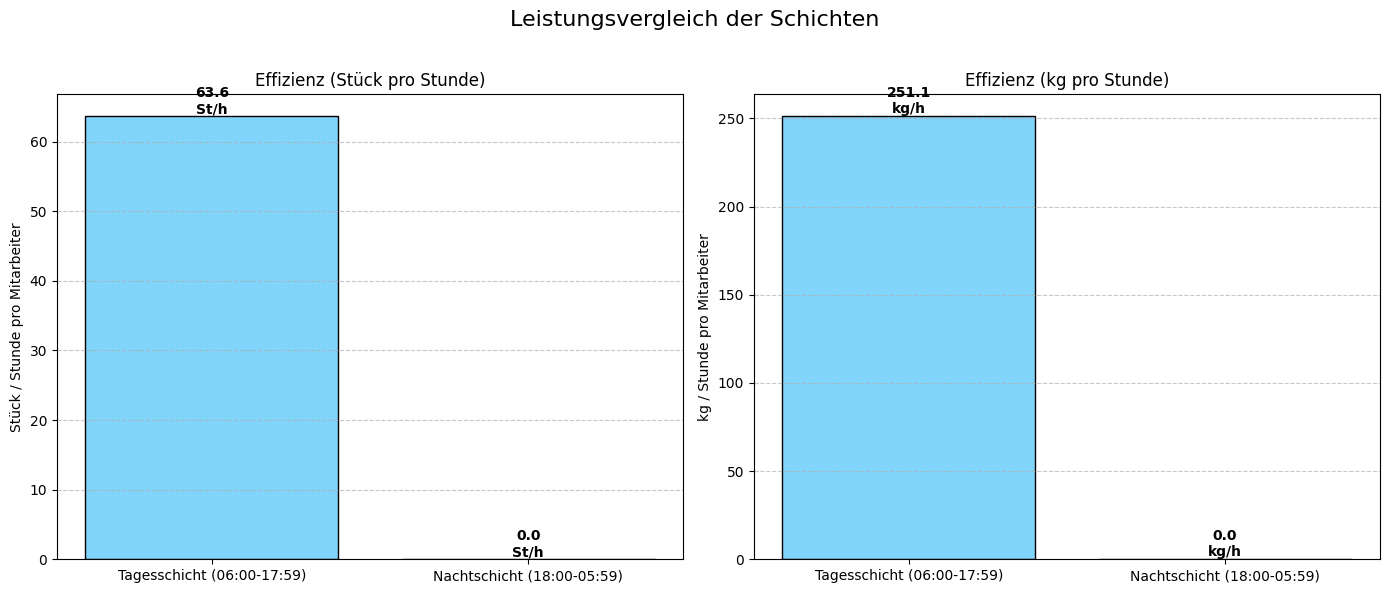

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Manuelle Definition der externen Parameter
# ------------------------------------------------------------------
# KORRIGIERT: Feste Schichtdefinitionen
schicht_namen = {
    "tag": "Tagesschicht (06:00-17:59)",
    "nacht": "Nachtschicht (18:00-05:59)"
}

# Mitarbeiteranzahl pro Schicht
schicht_parameter = {
    schicht_namen["tag"]: 2,
    schicht_namen["nacht"]: 2
}

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt alle Produktionsdaten pro Schicht
# Die gesamte Logik ist in einer einzigen Abfrage gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.timestamp
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
container_details AS (
    SELECT
        MAX(weight_g) as finalgewicht_g,
        MIN(timestamp) as start_time,
        MAX(timestamp) as end_time
    FROM container_mit_id
    WHERE container_id IN (SELECT container_id FROM gueltige_container)
    GROUP BY container_id
),
-- KORRIGIERTE Schichtzuordnung für Einheiten und Container
einheiten_mit_schicht AS (
    SELECT
        CASE
            WHEN CAST(strftime('%H', timestamp) AS INTEGER) >= 6 AND CAST(strftime('%H', timestamp) AS INTEGER) < 18 THEN '{schicht_namen["tag"]}'
            ELSE '{schicht_namen["nacht"]}'
        END AS schicht
    FROM gueltige_stuecke
),
container_mit_schicht AS (
    SELECT
        finalgewicht_g,
        start_time,
        end_time,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18 THEN '{schicht_namen["tag"]}'
            ELSE '{schicht_namen["nacht"]}'
        END AS schicht
    FROM container_details
)
-- Finale Aggregation aller Kennzahlen pro Schicht
SELECT
    schicht,
    (SELECT COUNT(*) FROM einheiten_mit_schicht WHERE schicht = s.schicht) AS gesamt_einheiten,
    (SELECT SUM(finalgewicht_g) FROM container_mit_schicht WHERE schicht = s.schicht) AS istgesamt_g,
    (SELECT (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 FROM container_mit_schicht WHERE schicht = s.schicht) AS verarbeitungsdauer_h
FROM (
    SELECT '{schicht_namen["tag"]}' AS schicht UNION ALL SELECT '{schicht_namen["nacht"]}' AS schicht
) s
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen und aufbereiten
# ------------------------------------------------------------------
final_stats = pd.read_sql_query(haupt_sql_abfrage, verbindung).fillna(0)

# ------------------------------------------------------------------
# 5. Finale Effizienzberechnung in Python
# ------------------------------------------------------------------
results_list = []
for _, row in final_stats.iterrows():
    schicht_name = row['schicht']
    anzahl_mitarbeiter = schicht_parameter.get(schicht_name, 0)
    personenstunden = row['verarbeitungsdauer_h'] * anzahl_mitarbeiter

    effizienz_stueck = (row['gesamt_einheiten'] / personenstunden) if personenstunden > 0 else 0
    effizienz_kg = (row['istgesamt_g'] / 1000 / personenstunden) if personenstunden > 0 else 0

    results_list.append({
        'Schicht': schicht_name,
        'Effizienz (Stück/h)': round(effizienz_stueck, 1),
        'Effizienz (kg/h)': round(effizienz_kg, 1),
        'Gesamt-Einheiten': int(row['gesamt_einheiten']),
        'Gesamt-Gewicht (kg)': round(row['istgesamt_g'] / 1000, 1),
        'Arbeitsdauer (h)': round(row['verarbeitungsdauer_h'], 2)
    })

ergebnis_df = pd.DataFrame(results_list)

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 37: Leistungsvergleich Früh- vs. Spätschicht ===")
print("Die Effizienz wird basierend auf der realen Verarbeitungsdauer berechnet.")
print("-" * 50)
print(ergebnis_df.to_string(index=False))
print("-" * 50)

# ------------------------------------------------------------------
# 7. Visualisierung
# ------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Leistungsvergleich der Schichten', fontsize=16)

# Diagramm 1: Effizienz in Stück/h
ax1.bar(
    ergebnis_df['Schicht'],
    ergebnis_df['Effizienz (Stück/h)'],
    color=['#81D4FA', '#FFAB91'],
    edgecolor='black'
)
ax1.set_title('Effizienz (Stück pro Stunde)')
ax1.set_ylabel('Stück / Stunde pro Mitarbeiter')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(ergebnis_df['Effizienz (Stück/h)']):
    ax1.text(i, val, f'{val}\nSt/h', ha='center', va='bottom', weight='bold')

# Diagramm 2: Effizienz in kg/h
ax2.bar(
    ergebnis_df['Schicht'],
    ergebnis_df['Effizienz (kg/h)'],
    color=['#81D4FA', '#FFAB91'],
    edgecolor='black'
)
ax2.set_title('Effizienz (kg pro Stunde)')
ax2.set_ylabel('kg / Stunde pro Mitarbeiter')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(ergebnis_df['Effizienz (kg/h)']):
    ax2.text(i, val, f'{val}\nkg/h', ha='center', va='bottom', weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ------------------------------------------------------------------
# 8. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



#38.Ø Bearbeitungszeit pro Artikel

**Formeln zur Methodologie (auf Deutsch)**

1. **Verarbeitungszeit eines Containers $i$**

   $$
   T_{\text{Container},\,i}
   = t_{\text{Ende},\,i} - t_{\text{Start},\,i}
   \quad[\text{in Stunden}]
   $$

   Dabei ist

   * $t_{\text{Start},\,i}$ der Zeitpunkt der ersten Messung in Container $i$,
   * $t_{\text{Ende},\,i}$ der Zeitpunkt des ersten Auftretens des finalen Plateaus (mindestens 3 gleiche Gewichtswerte) bzw. alternativ die letzte Messung, falls kein dreifaches Plateau gefunden wird.

2. **Anzahl verarbeiteter Einheiten (Artikel) pro Container $i$**

   $$
   N_{\text{Container},\,i}
   = \text{Anzahl der in Container }i\text{ gezählten Plateau-Wechsel}
   \quad[\text{in Stück}]
   $$

   (Wird pro Container gezählt, indem jedes steigende Plateau als “+1 Stück” und jedes fallende Plateau als “−1 Stück” gewertet wird, aber mindestens 1 Stück pro Container.)

3. **Gesamte Verarbeitungszeit über alle Container (in Stunden)**

   $$
   T_{\text{gesamt}}
   = \sum_{i=1}^{M} T_{\text{Container},\,i}
   $$

4. **Gesamtzahl aller verarbeiteten Einheiten (Stück)**

   $$
   N_{\text{gesamt}}
   = \sum_{i=1}^{M} N_{\text{Container},\,i}
   $$

5. **Ø Bearbeitungszeit pro Artikel (in Minuten/Stück oder Stunden/Stück)**

   $$
   \text{Ø Bearbeitungszeit pro Artikel (h/Stück)}
   = \frac{T_{\text{gesamt}}}{N_{\text{gesamt}}}
   $$

   Oft wünscht man das Ergebnis in Minuten pro Stück, daher:

   $$
   \text{Ø Bearbeitungszeit pro Artikel (Min/Stück)}
   = \frac{T_{\text{gesamt}} \times 60}{N_{\text{gesamt}}}
   $$

> **Hinweis**:
> Die Schätzung funktioniert am besten, wenn Container-Daten sauber in chronologischer Reihenfolge vorliegen und jedes Plateau tatsächlich einen abgeschlossenen Abfüllvorgang darstellt. Andernfalls kann man bei fehlenden oder zu kurzen Plateaus zu Unterschätzungen der Dauer gelangen.


In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Ermittelt alle benötigten Produktionsdaten
# Die gesamte Logik zur Ermittlung von Stückzahl und Zeit ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.container_id
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- CTEs zur Ermittlung der Verarbeitungsdauer
container_details AS (
    SELECT
        container_id,
        (JULIANDAY(MAX(timestamp)) - JULIANDAY(MIN(timestamp))) * 24.0 AS verarbeitungsdauer_h
    FROM container_mit_id
    WHERE container_id IN (SELECT container_id FROM gueltige_container)
    GROUP BY container_id
)
-- Finale Aggregation aller benötigten Kennzahlen
SELECT
    (SELECT COUNT(*) FROM gueltige_stuecke) AS gesamt_einheiten,
    (SELECT SUM(verarbeitungsdauer_h) FROM container_details) AS gesamt_verarbeitungsdauer_h
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
produktions_daten = pd.read_sql_query(haupt_sql_abfrage, verbindung).iloc[0]

# ------------------------------------------------------------------
# 4. Finale Berechnung der durchschnittlichen Zeit pro Artikel
# ------------------------------------------------------------------
# Produktionsdaten aus der Abfrage extrahieren
gesamt_einheiten = produktions_daten['gesamt_einheiten']
gesamt_verarbeitungsdauer_h = produktions_daten['gesamt_verarbeitungsdauer_h']

# Berechnung
if gesamt_einheiten > 0:
    avg_zeit_pro_artikel_h = gesamt_verarbeitungsdauer_h / gesamt_einheiten
    avg_zeit_pro_artikel_min = avg_zeit_pro_artikel_h * 60
    avg_zeit_pro_artikel_sec = avg_zeit_pro_artikel_h * 3600
else:
    avg_zeit_pro_artikel_min = 0
    avg_zeit_pro_artikel_sec = 0

# ------------------------------------------------------------------
# 5. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 38: Durchschnittliche Bearbeitungszeit pro Artikel ===")
print("-" * 60)
print("Diese Analyse berechnet die durchschnittliche Zeit, die zur Verarbeitung")
print("einer einzelnen Einheit (Stück) benötigt wird.")
print("-" * 60)
print(f"Gesamt-Verarbeitungszeit (alle Container): {gesamt_verarbeitungsdauer_h:.2f} Stunden")
print(f"Gesamtzahl verarbeiteter Einheiten:      {int(gesamt_einheiten)} Stück")
print("-" * 60)
print(f"Ø Bearbeitungszeit pro Artikel:          {avg_zeit_pro_artikel_min:.2f} Minuten/Stück")
print(f"                                       ({avg_zeit_pro_artikel_sec:.1f} Sekunden/Stück)")
print("-" * 60)

# ------------------------------------------------------------------
# 6. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


=== KPI 38: Durchschnittliche Bearbeitungszeit pro Artikel ===
------------------------------------------------------------
Diese Analyse berechnet die durchschnittliche Zeit, die zur Verarbeitung
einer einzelnen Einheit (Stück) benötigt wird.
------------------------------------------------------------
Gesamt-Verarbeitungszeit (alle Container): 0.48 Stunden
Gesamtzahl verarbeiteter Einheiten:      296 Stück
------------------------------------------------------------
Ø Bearbeitungszeit pro Artikel:          0.10 Minuten/Stück
                                       (5.8 Sekunden/Stück)
------------------------------------------------------------


In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Ermittelt alle benötigten Produktionsdaten
# Die gesamte Logik zur Ermittlung von Stückzahl und Zeit ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.container_id
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- CTEs zur Ermittlung der Verarbeitungsdauer
container_details AS (
    SELECT
        MIN(timestamp) AS start_time,
        MAX(timestamp) AS end_time
    FROM container_mit_id
    WHERE container_id IN (SELECT container_id FROM gueltige_container)
    GROUP BY container_id
)
-- Finale Aggregation aller benötigten Kennzahlen
SELECT
    (SELECT COUNT(*) FROM gueltige_stuecke) AS gesamt_einheiten,
    -- KORRIGIERTE BERECHNUNG: Gesamte Zeitspanne vom ersten Start bis zum letzten Ende
    (SELECT (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 FROM container_details) AS gesamt_verarbeitungsdauer_h
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
produktions_daten = pd.read_sql_query(haupt_sql_abfrage, verbindung).iloc[0]

# ------------------------------------------------------------------
# 4. Finale Berechnung der durchschnittlichen Zeit pro Artikel
# ------------------------------------------------------------------
# Produktionsdaten aus der Abfrage extrahieren
gesamt_einheiten = produktions_daten['gesamt_einheiten']
gesamt_verarbeitungsdauer_h = produktions_daten['gesamt_verarbeitungsdauer_h']

# Berechnung
if gesamt_einheiten > 0:
    avg_zeit_pro_artikel_h = gesamt_verarbeitungsdauer_h / gesamt_einheiten
    avg_zeit_pro_artikel_min = avg_zeit_pro_artikel_h * 60
    avg_zeit_pro_artikel_sec = avg_zeit_pro_artikel_h * 3600
else:
    avg_zeit_pro_artikel_min = 0
    avg_zeit_pro_artikel_sec = 0

# ------------------------------------------------------------------
# 5. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 38: Durchschnittliche Bearbeitungszeit pro Artikel ===")
print("-" * 60)
print("Diese Analyse berechnet die durchschnittliche Zeit, die zur Verarbeitung")
print("einer einzelnen Einheit (Stück) benötigt wird.")
print("-" * 60)
print(f"Gesamt-Verarbeitungszeit (alle Container): {gesamt_verarbeitungsdauer_h:.2f} Stunden")
print(f"Gesamtzahl verarbeiteter Einheiten:      {int(gesamt_einheiten)} Stück")
print("-" * 60)
print(f"Ø Bearbeitungszeit pro Artikel:          {avg_zeit_pro_artikel_min:.2f} Minuten/Stück")
print(f"                                       ({avg_zeit_pro_artikel_sec:.1f} Sekunden/Stück)")
print("-" * 60)

# ------------------------------------------------------------------
# 6. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()



=== KPI 38: Durchschnittliche Bearbeitungszeit pro Artikel ===
------------------------------------------------------------
Diese Analyse berechnet die durchschnittliche Zeit, die zur Verarbeitung
einer einzelnen Einheit (Stück) benötigt wird.
------------------------------------------------------------
Gesamt-Verarbeitungszeit (alle Container): 2.33 Stunden
Gesamtzahl verarbeiteter Einheiten:      296 Stück
------------------------------------------------------------
Ø Bearbeitungszeit pro Artikel:          0.47 Minuten/Stück
                                       (28.3 Sekunden/Stück)
------------------------------------------------------------


#39.Qualitätsindikation pro Charge



**Formeln zur Methodologie **

1. **Ist-Verlust (in %) einer Charge**
   Zunächst berechnet man für jede Charge das tatsächliche Verlustverhältnis (Ist-Verlust) anhand des Rohgewichts und des IST-Gewichts:

   $$
   \text{Ist-Verlust}_{\text{Charge}}
   = \frac{G_{\text{Roh, Charge}} - G_{\text{IST, Charge}}}{G_{\text{Roh, Charge}}} \times 100 \;[\%].
   $$

2. **Δ Verlust (Abweichung vom Zielver­lustrat­enwert)**
   Operatoren geben zu Beginn der Schicht einen Zielwert „Soll-Verlust“ (z. B. 7 %) manuell vor. Die prozentuale Abweichung jeder Charge vom Soll-Verlust rechnet man so:

   $$
   \Delta_{\text{Verlust}}
   = \frac{\text{Ist-Verlust}_{\text{Charge}} - \text{Soll-Verlust}}{\text{Soll-Verlust}} \times 100 \;[\%].
   $$

3. **Ist-Tempo (in Stück / h) einer Charge**
   Über Sensorik oder Simulation wird ermittelt, wie viele Einheiten (z. B. Köpfe) in einer Charge in welcher Zeit verarbeitet wurden.

   $$
   \text{Ist-Tempo}_{\text{Charge}}
   = \frac{N_{\text{Einheiten, Charge}}}{T_{\text{Bearbeitung, Charge}}}
   \quad [\text{Stück/h}].
   $$

4. **Δ Tempo (Abweichung vom Soll-Tempo)**
   Zu Beginn der Schicht definiert der Operator einen Soll-Tempo­wert (z. B. 50 Stück/h). Dann gilt:

   $$
   \Delta_{\text{Tempo}}
   = \frac{\text{Ist-Tempo}_{\text{Charge}} - \text{Soll-Tempo}}{\text{Soll-Tempo}} \times 100 \;[\%].
   $$

5. **Qualitätsklassifikation (gut / mittel / schlecht)**
   Je nach prozentualer Abweichung klassifizieren wir eine Charge automatisch:

   * **Verlust-Abweichung** ($\Delta_{\text{Verlust}}$):

     $$
     \begin{cases}
       \text{„gut“},    & \Delta_{\text{Verlust}} \le 0 \;(\text{tatsächlicher Verlust} \le \text{Soll});\\
       \text{„mittel“}, & 0 < \Delta_{\text{Verlust}} \le 10\%;\\
       \text{„schlecht“}, & \Delta_{\text{Verlust}} > 10\%.
     \end{cases}
     $$
   * **Tempo-Abweichung** ($\Delta_{\text{Tempo}}$):

     $$
     \begin{cases}
       \text{„gut“},    & \Delta_{\text{Tempo}} \ge 0\;(\text{Ist-Tempo} \ge \text{Soll});\\
       \text{„mittel“}, & -10\% \le \Delta_{\text{Tempo}} < 0;\\
       \text{„schlecht“}, & \Delta_{\text{Tempo}} < -10\%.
     \end{cases}
     $$


**Erläuterung **

1. **Soll-Werte festlegen**

   * `soll_verlust_pct = 7.0 %`
   * `soll_tempo_stueck_h = 50` Stück/h

   Diese Werte werden zu Schichtbeginn vom Bediener oder Technologen manuell eingegeben und gelten für alle folgenden Chargen dieser Schicht.

2. **Datenstruktur „charge\_data“**

   * Jede Charge (hier IDs „A“, „B“, „C“, „D“) besitzt:

     * `G_roh_g`: Rohgewicht der Charge (Gesamtgewicht aller Paletten vor Verarbeitung) in Gramm.
     * `G_ist_g`: IST-Gewicht der Charge (Gesamtgewicht aller fertigen Container) in Gramm.
     * `einheiten`: Anzahl aller in dieser Charge verarbeiteten Köpfe (z. B. aus der Containerzählung).
     * `dauer_h`: Gesamtdauer der Bearbeitung dieser Charge in Stunden.

3. **Berechnungsschritte pro Charge**

   * **Ist-Verlust ($\%$)**

     $$
       \text{ist\_verlust\_pct}
       = \frac{G_{\text{roh}} - G_{\text{ist}}}{G_{\text{roh}}} \times 100
     $$
   * **Δ Verlust ($\%$)**

     $$
       \Delta_{\text{Verlust}}
       = \frac{\text{ist\_verlust\_pct} - \text{soll\_verlust\_pct}}{\text{soll\_verlust\_pct}} \times 100
     $$
   * **Ist-Tempo (Stück/h)**

     $$
       \text{ist\_tempo\_h} = \frac{N_{\text{Einheiten}}}{T_{\text{h}}}
     $$
   * **Δ Tempo ($\%$)**

     $$
       \Delta_{\text{Tempo}}
       = \frac{\text{ist\_tempo\_h} - \text{soll\_tempo\_stueck\_h}}{\text{soll\_tempo\_stueck\_h}} \times 100
     $$

4. **Automatische Klassifikation**

   * **Verlust-Kategorie** („gut“, „mittel“, „schlecht“) basierend auf $\Delta_{\text{Verlust}}$.

     * $\Delta_{\text{Verlust}} \le 0 \:\Rightarrow\; \text{„gut“}$
     * $0 < \Delta_{\text{Verlust}} \le 10\:\%\;\Rightarrow\; \text{„mittel“}$
     * $\Delta_{\text{Verlust}} > 10\:\%\;\Rightarrow\; \text{„schlecht“}$
   * **Tempo-Kategorie** („gut“, „mittel“, „schlecht“) basierend auf $\Delta_{\text{Tempo}}$.

     * $\Delta_{\text{Tempo}} \ge 0 \;\Rightarrow\; \text{„gut“}$
     * $-10\%\; \le \Delta_{\text{Tempo}} < 0 \;\Rightarrow\; \text{„mittel“}$
     * $\Delta_{\text{Tempo}} < -10\%\;\Rightarrow\;\text{„schlecht“}$

Das Ergebnis-DataFrame zeigt pro Charge sowohl die prozentualen Abweichungen als auch die automatische Klassifikation für Verlust und Tempo—ohne dass man jede einzelne Kopf-Verarbeitung manuell bewerten muss.


In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Manuelle Definition der Soll-Werte und des Rohmaterials
# Diese Werte dienen als Basis für die Qualitätsbewertung.
# ------------------------------------------------------------------
# Soll-Vorgaben für die Produktion
soll_verlust_prozent = 30.0 # Ziel-Verlustrate in Prozent
soll_tempo_stueck_pro_h = 120 # Ziel-Produktivität in Stück pro Stunde

# Gesamtes Rohmaterial für den analysierten Zeitraum
rohgesamt_g_total = 1670000 # 1670.00 kg

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt alle Produktionsdaten pro Schicht
# Die gesamte Logik zur Ermittlung von Stückzahl, Gewicht und Zeit ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.timestamp
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
container_details AS (
    SELECT
        MAX(weight_g) as finalgewicht_g,
        MIN(timestamp) as start_time,
        MAX(timestamp) as end_time
    FROM container_mit_id
    WHERE container_id IN (SELECT container_id FROM gueltige_container)
    GROUP BY container_id
),
-- Schichtzuordnung für Einheiten und Container
einheiten_mit_schicht AS (
    SELECT
        CASE
            WHEN CAST(strftime('%H', timestamp) AS INTEGER) >= 6 AND CAST(strftime('%H', timestamp) AS INTEGER) < 18 THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM gueltige_stuecke
),
container_mit_schicht AS (
    SELECT
        finalgewicht_g,
        start_time,
        end_time,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18 THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
)
-- Finale Aggregation aller Kennzahlen pro Schicht
SELECT
    s.schicht,
    COALESCE((SELECT COUNT(*) FROM einheiten_mit_schicht WHERE schicht = s.schicht), 0) AS gesamt_einheiten,
    COALESCE((SELECT SUM(finalgewicht_g) FROM container_mit_schicht WHERE schicht = s.schicht), 0) AS istgesamt_g,
    COALESCE((SELECT (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 FROM container_mit_schicht WHERE schicht = s.schicht), 0) AS verarbeitungsdauer_h
FROM (
    SELECT 'Tagesschicht (06:00-17:59)' AS schicht UNION ALL SELECT 'Nachtschicht (18:00-05:59)' AS schicht
) s;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
produktions_daten_pro_schicht = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 5. Abweichungen und Klassifikation in Python berechnen
# ------------------------------------------------------------------
results_list = []
istgesamt_g_total = produktions_daten_pro_schicht['istgesamt_g'].sum()

for _, row in produktions_daten_pro_schicht.iterrows():
    # Rohmaterial proportional zur Produktion zuweisen
    anteil = row['istgesamt_g'] / istgesamt_g_total if istgesamt_g_total > 0 else 0
    rohgewicht_g = rohgesamt_g_total * anteil

    # Ist-Werte berechnen
    ist_verlust_prozent = ((rohgewicht_g - row['istgesamt_g']) / rohgewicht_g) * 100 if rohgewicht_g > 0 else 0
    ist_tempo_stueck_pro_h = row['gesamt_einheiten'] / row['verarbeitungsdauer_h'] if row['verarbeitungsdauer_h'] > 0 else 0

    # Abweichungen berechnen
    delta_verlust_prozent = ((ist_verlust_prozent - soll_verlust_prozent) / soll_verlust_prozent) * 100 if soll_verlust_prozent > 0 else 0
    delta_tempo_prozent = ((ist_tempo_stueck_pro_h - soll_tempo_stueck_pro_h) / soll_tempo_stueck_pro_h) * 100 if soll_tempo_stueck_pro_h > 0 else 0

    # Klassifikation Verlust
    if delta_verlust_prozent <= 0: klass_verlust = "Gut"
    elif delta_verlust_prozent <= 10: klass_verlust = "Mittel"
    else: klass_verlust = "Schlecht"

    # Klassifikation Tempo
    if delta_tempo_prozent >= 0: klass_tempo = "Gut"
    elif delta_tempo_prozent >= -10: klass_tempo = "Mittel"
    else: klass_tempo = "Schlecht"

    # Für Schichten ohne Produktion Standardwerte setzen
    if row['gesamt_einheiten'] == 0:
        klass_verlust = "N/A"
        klass_tempo = "N/A"

    results_list.append({
        "Schicht": row['schicht'],
        "Ist-Verlust (%)": ist_verlust_prozent,
        "Δ Verlust (%)": delta_verlust_prozent,
        "Klass. Verlust": klass_verlust,
        "Ist-Tempo (St/h)": ist_tempo_stueck_pro_h,
        "Δ Tempo (%)": delta_tempo_prozent,
        "Klass. Tempo": klass_tempo
    })

ergebnis_df = pd.DataFrame(results_list)


# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 39: Qualitätsindikation pro Schicht ===")
print(f"Soll-Vorgaben: {soll_verlust_prozent:.1f}% Verlust, {soll_tempo_stueck_pro_h} Stück/h")
print("-" * 80)
print(ergebnis_df.to_string(index=False, float_format='%.1f'))
print("-" * 80)


# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


=== KPI 39: Qualitätsindikation pro Schicht ===
Soll-Vorgaben: 30.0% Verlust, 120 Stück/h
--------------------------------------------------------------------------------
                   Schicht  Ist-Verlust (%)  Δ Verlust (%) Klass. Verlust  Ist-Tempo (St/h)  Δ Tempo (%) Klass. Tempo
Tagesschicht (06:00-17:59)             30.0            0.1         Mittel             127.2          6.0          Gut
Nachtschicht (18:00-05:59)              0.0         -100.0            N/A               0.0       -100.0          N/A
--------------------------------------------------------------------------------


#Zusätzliche OEE-KPIs (nach DIN EN 62740)

#40.Verfügbarkeit (Availability)



**Formeln (auf Deutsch)**

1. **Betriebszeit (geplante Produktionszeit)**

   $$
   T_{\text{Betrieb}} = \text{Dauer, in der die Anlage laut Schichtplan hätte laufen sollen (z. B. 8 h = 480 Min.)}
   $$

2. **Stillstandszeiten (ungeplante Ausfallzeiten in der Schicht)**

   $$
   T_{\text{Stillstand}} = \sum_{i=1}^{n} t_{\text{Stopp},\,i}
   $$

   wobei $t_{\text{Stopp},\,i}$ alle einzelnen ungeplanten Unterbrechungen (Sensor­ausfall, Reinigungsstopp, Materialmangel, Reparatur) in Minuten zusammenfasst.

3. **Verfügbarkeit (in %)**

   $$
   \text{Verfügbarkeit}
   = \frac{T_{\text{Betrieb}} - T_{\text{Stillstand}}}{T_{\text{Betrieb}}} \times 100.
   $$

   – Ein Wert nahe 100 % bedeutet, dass nahezu keine ungeplanten Stopps stattfanden.

---


**Erläuterungen (auf Deutsch)**

1. **Betriebszeit**

   * Wird zu Schichtbeginn vom Betreiber oder Technologen festgelegt (Beispiel: 8 h = 480 Min.).
   * In einer Gemüseverarbeitung ist das die Zeitspanne, in der die Linie prinzipiell am Laufen sein sollte (Sortieren, Waschen, Entfernen der Schale, Zerteilen, Verpacken).

2. **Stillstandszeiten**

   * Alle ungeplanten Unterbrechungen werden als Einträge in einem Dictionary (`stillstand_data`) gesammelt.
   * Beispiele für Ursachen in einem Gemüsebetrieb:

     * Reinigungsstopp (Kurzreinigung zwischen Sorten).
     * Wartung/Reparatur eines Sensor- oder Waagensystems.
     * Warten auf Nachschub an frischen Paletten.
     * Kurzfristiger Stromausfall oder Maschinenausfall.
   * Jede Einzeldauer (in Minuten) wird aufsummiert zu `gesamt_stillstand_min`.

3. **Verfügbarkeit**

   * $\displaystyle \text{Verfügb.} = \frac{480 - \text{Stillstand}}{480} \times 100$.
   * Beispiel: Wenn die Summe aller ungeplanten Stopps 75 Minuten beträgt, dann

     $$
       \text{Verfügbarkeit} = \frac{480 - 75}{480} \times 100 \approx 84{,}38\%.
     $$
   * Ein höherer Wert (nahe 100 %) bedeutet, dass die Linie praktisch ohne ungeplante Unterbrechungen durchlief. Ein niedriger Wert (z. B. 70 %) signalisiert, dass die Anlage lange Standzeiten hatte und entsprechend wenig Produktionszeit übrig blieb.

4. **Ausgabe**

   * Zeigt die geplante Betriebszeit (z. B. 480 Min.), die aufsummierten Stillstandsminuten und die so errechnete Verfügbarkeit in Prozent.
   * Zusätzlich werden alle einzelnen Stillstandsereignisse mit ihren Dauern in einer kleinen Übersichtstabelle ausgegeben.

So lässt sich für den Gemüseverarbeitungsbetrieb automatisch verfolgen, wie viel Zeit in einer Schicht tatsächlich produziert wurde und wie viel Zeit durch ungeplante Unterbrechungen verloren ging.


=== KPI 40: Anlagenauslastung (Verfügbarkeit) pro Schicht ===
Die Auslastung ist das Verhältnis von reiner Produktionszeit zur Gesamtdauer.
----------------------------------------------------------------------

--- Tagesschicht (06:00-17:59) ---
  - Gesamtdauer der Schicht (Aktivität): 139.7 Min.
  - Reine Produktionszeit (Befüllung):   28.7 Min.
  - Leerlaufzeit (Pausen dazwischen):  110.9 Min.
  -------------------------------------------------------------
  = Anlagenauslastung (Verfügbarkeit): 20.6%

--- Nachtschicht (18:00-05:59) ---
  - Gesamtdauer der Schicht (Aktivität): 0.0 Min.
  - Reine Produktionszeit (Befüllung):   0.0 Min.
  - Leerlaufzeit (Pausen dazwischen):  0.0 Min.
  -------------------------------------------------------------
  = Anlagenauslastung (Verfügbarkeit): 0.0%
----------------------------------------------------------------------


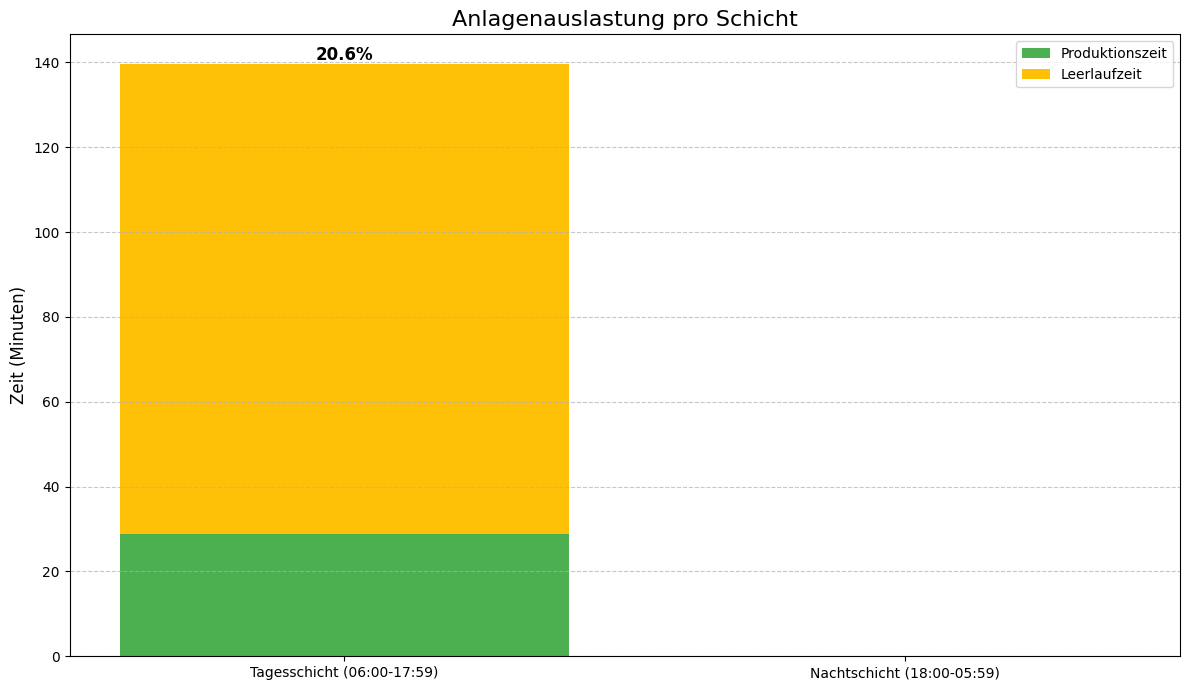

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 2. HAUPT-SQL-ABFRAGE: Ermittelt die gesamte Produktions- und Gesamtdauer pro Schicht
# Die gesamte Logik zur Zeitermittlung ist nun in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = """
WITH
-- Schritt 1: Container-Details (Start-/Endzeit) für jeden gültigen Container ermitteln
container_details AS (
    WITH
    container_zuordnung AS (
        SELECT
            timestamp,
            weight_g,
            SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
                OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
        FROM messungen
    ),
    container_mit_id AS (
        SELECT
            timestamp,
            weight_g,
            (container_id_roh + 1) AS container_id
        FROM container_zuordnung
    ),
    gueltige_container AS (
        SELECT container_id
        FROM container_mit_id
        GROUP BY container_id
        HAVING MAX(weight_g) BETWEEN 7000 AND 12000
    )
    SELECT
        MIN(cmi.timestamp) AS start_time,
        MAX(cmi.timestamp) AS end_time
    FROM gueltige_container gc
    JOIN container_mit_id cmi ON gc.container_id = cmi.container_id
    GROUP BY gc.container_id
),
-- Schritt 2: Schichtzuordnung für jeden Container
container_mit_schicht AS (
    SELECT
        start_time,
        end_time,
        CASE
            WHEN CAST(strftime('%H', end_time) AS INTEGER) >= 6 AND CAST(strftime('%H', end_time) AS INTEGER) < 18
            THEN 'Tagesschicht (06:00-17:59)'
            ELSE 'Nachtschicht (18:00-05:59)'
        END AS schicht
    FROM container_details
)
-- Schritt 3: Finale Aggregation der Zeitdauern pro Schicht
SELECT
    schicht,
    -- Gesamtdauer der Schicht (vom ersten Start bis zum letzten Ende)
    (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 * 60.0 AS gesamtdauer_min,
    -- Summe der einzelnen Container-Befüllzeiten (reine Produktionszeit)
    SUM((JULIANDAY(end_time) - JULIANDAY(start_time)) * 24.0 * 60.0) AS produktionszeit_min
FROM container_mit_schicht
GROUP BY schicht;
"""

# ------------------------------------------------------------------
# 3. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_gefunden = pd.read_sql_query(haupt_sql_abfrage, verbindung)

# ------------------------------------------------------------------
# 4. Sicherstellen, dass immer beide Schichten angezeigt werden
# ------------------------------------------------------------------
alle_schichten_df = pd.DataFrame({
    'schicht': ["Tagesschicht (06:00-17:59)", "Nachtschicht (18:00-05:59)"]
})
final_stats = pd.merge(alle_schichten_df, ergebnis_gefunden, on='schicht', how='left').fillna(0)

# ------------------------------------------------------------------
# 5. Auslastung (Verfügbarkeit) und Leerlauf berechnen
# ------------------------------------------------------------------
final_stats['leerlaufzeit_min'] = final_stats['gesamtdauer_min'] - final_stats['produktionszeit_min']
final_stats['auslastung_prozent'] = (
    (final_stats['produktionszeit_min'] / final_stats['gesamtdauer_min']) * 100
).fillna(0)


# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 40: Anlagenauslastung (Verfügbarkeit) pro Schicht ===")
print("Die Auslastung ist das Verhältnis von reiner Produktionszeit zur Gesamtdauer.")
print("-" * 70)

for _, row in final_stats.iterrows():
    print(f"\n--- {row['schicht']} ---")
    print(f"  - Gesamtdauer der Schicht (Aktivität): {row['gesamtdauer_min']:.1f} Min.")
    print(f"  - Reine Produktionszeit (Befüllung):   {row['produktionszeit_min']:.1f} Min.")
    print(f"  - Leerlaufzeit (Pausen dazwischen):  {row['leerlaufzeit_min']:.1f} Min.")
    print(f"  -------------------------------------------------------------")
    print(f"  = Anlagenauslastung (Verfügbarkeit): {row['auslastung_prozent']:.1f}%")

print("-" * 70)

# ------------------------------------------------------------------
# 7. Visualisierung: Gestapeltes Balkendiagramm
# ------------------------------------------------------------------
if not final_stats.empty:
    fig, ax = plt.subplots(figsize=(12, 7))

    # Balken für Produktionszeit
    ax.bar(final_stats['schicht'], final_stats['produktionszeit_min'], label='Produktionszeit', color='#4CAF50')
    # Balken für Leerlaufzeit (darauf gestapelt)
    ax.bar(final_stats['schicht'], final_stats['leerlaufzeit_min'], bottom=final_stats['produktionszeit_min'], label='Leerlaufzeit', color='#FFC107')

    ax.set_ylabel('Zeit (Minuten)', fontsize=12)
    ax.set_title('Anlagenauslastung pro Schicht', fontsize=16)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Beschriftung mit Prozentwerten
    for i, row in final_stats.iterrows():
        gesamthoehe = row['gesamtdauer_min']
        if gesamthoehe > 0:
            ax.text(i, gesamthoehe, f"{row['auslastung_prozent']:.1f}%", ha='center', va='bottom', fontsize=12, weight='bold')

    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------------
# 8. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


  Die in KPI 40 gezeigte Rechnung („(Geplante Betriebszeit – Stillstandszeit) / Geplante Betriebszeit × 100“) ist in der Praxis tatsächlich der häufigste und einfachste Weg, um die Verfügbarkeit einer Anlage zu ermitteln. Sie entspricht weitgehend dem Standard, wie er in Normen wie DIN EN 62740 beschrieben wird. Trotzdem gibt es verschiedene Varianten und ergänzende Methoden, um diesen Kennwert aussagekräftiger zu machen oder besser in den Gesamtkontext von OEE (Overall Equipment Effectiveness) einzubetten:

---

## 1. Klassischer Ansatz (bereits gezeigt)

**Formel**

$$
\text{Verfügbarkeit (\%)}
= \frac{T_{\text{geplant}} - T_{\text{Stillstand, ungeplant}}}{T_{\text{geplant}}}
\times 100
$$

* **Geplante Betriebszeit** = Arbeitszeit laut Schichtplan (z. B. 480 Minuten).
* **Stillstandszeit (ungeplant)** = Summe aller ungeplanten Ausfälle innerhalb dieser Zeitspanne.
* Vorteil: sehr einfach, übersichtlich, schnell berechenbar.
* Nachteil: differenziert nicht zwischen verschiedenen An­lass­grün­den (z. B. Wartung versus Sensorfehler versus Materialmangel).

---

## 2. Unterscheidung geplanter vs. ungeplanter Stillstand

Ein verfeinerter Ansatz trennt die geplanten Unterbrechungen (z. B. Reinigung, Wechsel der Palettensorte, definierte Rüstzeit) von den ungeplanten:

1. **Geplante Stillstandszeit $T_{\text{plan}}$**

   $$
   \text{z. B. Rüstzeit, Reinigung, geplante Wartung}
   $$
2. **Ungeplante Stillstandszeit $T_{\text{unpl}}$**

   $$
   \text{z. B. Maschinenausfall, Sensorfehler, Materialmangel}
   $$

Dann definiert man die **SOLL-Betriebszeit** oft als

$$
T_{\text{SOLL}} = T_{\text{Schicht}} - T_{\text{plan}}
$$

und rechnet

$$
\text{Verfügbarkeit}
= \frac{T_{\text{SOLL}} - T_{\text{unpl}}}{T_{\text{SOLL}}} \times 100.
$$

* **Vorteil:** Man sieht sofort, wie viel Zeit für tatsächlich geplante Instandhaltungen reserviert wurde und wie viel zusätzlich verloren ging.
* **Beispiel:**

  * Schichtzeit = 480 Min.
  * Geplante Reinigung (Rüstzeit) = 60 Min.
  * Ungeplanter Ausfall (Reparatur) = 30 Min.
  * $T_{\text{SOLL}} = 480 - 60 = 420$ Min.
  * $\text{Verfügbarkeit} = (420 - 30) / 420 × 100 ≈ 92{,}9\%$.

---

## 3. Zeitbasierte Verfügbarkeit vs. Ereignisbasierte Verfügbarkeit

### 3.1 Zeitbasiert (wie oben)

* Misst einfach, wie viel Minuten/Stunden eine Linie lief.
* Benötigt nur Summen der Stillstände und Schichtplan.

### 3.2 Ereignisbasiert (Maschinendaten, Sensor-Logs)

* Jeder Unterbrechungsgrund (Stopp-Kategorie) wird automatisiert protokolliert.
* Man kann dann neben der reinen %-Verfügbarkeit noch Kennzahlen wie **MTBF** (Mean Time Between Failures) und **MTTR** (Mean Time To Repair) berechnen:

  $$
  \text{MTBF} = \frac{\text{Gesamtbetriebszeit}}{\text{Anzahl der Ausfälle}},
  \quad
  \text{MTTR} = \frac{\text{Summe aller Reparaturzeiten}}{\text{Anzahl der Reparaturen}}.
  $$
* Aus MTBF und MTTR ergibt sich wiederum die Verfügbarkeit (rein rechnerisch) als

  $$
  \text{Verfügbarkeit} = \frac{\text{MTBF}}{\text{MTBF} + \text{MTTR}}.
  $$
* **Vorteil:** Man erhält detaillierte Einblicke, wie oft Ausfälle passieren und wie lange Reparaturen dauern.
* **Nachteil:** Setzt eine sehr präzise automatische Datenerfassung voraus (z. B. Maschinensensoren, OPC-UA-Log, Betriebsleitsystem).

---

## 4. Berücksichtigung der geplanten Stillstände (Geplante Verfügbarkeit)

In manchen Unternehmen wird zusätzlich auch eine „lose“ Kennzahl **„Geplante Verfügbarkeit“** ausgewiesen, um zu dokumentieren, wie viel Zeit für planmäßige Wartungs- oder Reinigungsfenster eingeplant ist – etwa:

$$
\text{Geplante Verfügbarkeit}
= \frac{T_{\text{Schicht}} - T_{\text{plan}}}{T_{\text{Schicht}}} \times 100.
$$

* Wird zusammen mit der reinen Verfügbarkeit (inklusive ungeplante Stopps) ausgewiesen, um Transparenz darüber zu schaffen, wie viel Zeit in Schichten faktisch für produktive Arbeit zur Verfügung gestanden hat.

---

## 5. Berichte nach DIN EN 62740 (Ergänzende OEE-KPIs)

Laut DIN EN 62740 (zusätzliche OEE-Kennzahlen) gibt es neben **Verfügbarkeit** noch:

1. **Leistungsgrad**

   $$
   \frac{\text{Ist-Geschwindigkeit}}{\text{Soll-Geschwindigkeit}} \times 100.
   $$

   Z. B. Geschwindigkeit in kg/h oder Stück/h; vergleicht tatsächliche Ausbringung mit theoretischer Maximalleistung.

2. **Qualitätsrate**

   $$
   \frac{\text{Anzahl fehlerfreier Einheiten}}{\text{Gesamtzahl Einheiten}} \times 100.
   $$

   Z. B. Anteil «gut» zu «gut + mittel + schlecht».

3. **OEE**

   $$
   \text{OEE} = \text{Verfügbarkeit} \times \text{Leistungsgrad} \times \text{Qualitätsrate} \,/\, 10000 (\text{wenn alle in Prozent angegeben}).
   $$

Diese erweiterten Kennzahlen helfen, **Verfügbarkeit** in einen Gesamtzusammenhang zu stellen und nicht isoliert zu betrachten.

---

## Mögliche Erweiterungen für Gemüseverarbeitung

1. **Automatische Erfassung geplanter Stopps**

   * Anstatt geplant/vorab manuell „Reinigung 60 Min.“ einzutragen, kann ein kleiner Sensor oder ein Touchpanel-Prozess erfassen, wann genau Reinigung gestartet/beendet wird. Dann entstehen keine Schätzwerte, sondern präzise geplante Stillstandsdaten.

2. **Kategorisierung der Stillstände**

   * Man trennt:

     * Materialbedingte Stopps (z. B. keine frischen Paletten verfügbar).
     * Maschinenbedingte Stopps (Sensorfehler, Motorausfall).
     * Bedienerbedingte Stopps (Eingriff, Qualitätssicherung).
   * Aus dieser Detaillierung kann die Gesamtverfügbarkeit mit Filter „Nur Maschinenausfälle“, „Nur Materialausfälle“ etc. neu berechnet werden.

3. **Integration mit Produktionsleitsystem (PLS/SCADA)**

   * Die Anlage liefert automatisch Statuscodes.
   * Die Software kann alle Übergänge „RUN → STOP“ protokollieren und Dauer der STOPs millisekundengenau addieren.
   * Vorteil: Minimale manuelle Erfassung, höchstmögliche Genauigkeit.

4. **Bewertung von geplanten Wartungsfenstern in Echtzeit**

   * Anlage soll jeden Sonntag von 06:00 bis 08:00 Uhr planmäßig stillstehen für Wartung. Dieser Block ist im System weiß markiert (kein „Verfügbarkeitsverlust“ aufzuschreiben).
   * Alle übrigen Stopps werden automatisch als ungeplant erfasst.
   * Sehr praxisnah, wenn die Gemüseverarbeitungs­linie regelmäßig z. B. täglich, wöchentlich Spül-/Desinfektionszyklen hat.

---

### Zusammenfassung

* **Standard**:

  $$
  \text{Verfügbarkeit}
  = \frac{T_{\text{Schicht}} - T_{\text{Stillstand, ungeplant}}}{T_{\text{Schicht}}} \times 100.
  $$
* **Erweiterung**:

  * Trennung zwischen **geplantem** und **ungeplantem** Stillstand,
  * Einsatz von **MTBF/MTTR**-Kennzahlen,
  * Einbindung in **OEE** (Leistungsgrad, Qualitätsrate),
  * Automatisierte Datenerfassung per Sensor/PLS statt manueller Eingabe.

Für einen Gemüseverarbeitungsbetrieb lohnt es sich langfristig, Stopps nach ihren Ursachen sauber zu kategorisieren und – sofern möglich – automatisch aus Systemlogs auszulesen, statt sie rein manuell zu dokumentieren. So steigt die Genauigkeit der Verfügbarkeitskennzahl, und man kann gezielt Verbesserungsmaßnahmen ableiten (z. B. weniger Materialengpässe, verbesserte Sensorwartung, optimierte Reinigungsprozesse).


#41.Leistung (Performance)

**Formeln zur Methodologie (auf Deutsch)**

1. **Ist-Produktionsleistung (Ist-Leistung)**

   * In Stück/h (bei stückbasierter Erfassung):

     $$
     P_{\text{ist, Stück/h}}
     = \frac{N_{\text{gesamt}}}{T_{\text{gesamt (h)}}}
     $$

     wobei
     $N_{\text{gesamt}}$ = Gesamtzahl verarbeiteter Einheiten (Stück) einer Charge oder Schicht,
     $T_{\text{gesamt (h)}}$ = Gesamte Bearbeitungszeit in Stunden.

   * In kg/h (bei gewichtsbasierter Erfassung):

     $$
     P_{\text{ist, kg/h}}
     = \frac{G_{\text{ist (kg)}}}{T_{\text{gesamt (h)}}}
     $$

     wobei $G_{\text{ist (kg)}}$ = Gesamtgewicht (in kg) der fertig verarbeiteten Ware.

2. **Maximale (Soll-)Produktionsleistung $P_{\text{soll}}$**

   * Laut DIN EN 62740 würde man normalerweise eine **theoretische Maximalleistung** der Maschine zugrunde legen (z. B. Maschinenfabrikat-Angaben). In der Praxis ist dieser Wert oft nicht bekannt oder wird nicht voll ausgenutzt.
   * Viele Unternehmen setzen deshalb einen realistischen **Soll-Leistungswert** (z. B. 50 % der theoretischen Maximal­leistung) oder einen aus Erfahrungswerten abgeleiteten „Zielwert“ fest.

3. **Performance (in %)**

   $$
   \text{Performance (\'Leistung\')}
   = \frac{P_{\text{ist}}}{P_{\text{soll}}} \times 100 \;[\%]
   $$

   * Hier kann $P_{\text{soll}}$ entweder die tatsächliche maximal erreichbare Maschinenleistung oder ein festgelegter Zielwert sein (z. B. 50 Stück/h oder 200 kg/h).

4. **Alternativ: Soll-Ist-Vergleich (Abweichung)**
   Wenn man statt einer Prozentzahl „Performance“ lieber den **prozentualen Abstand** zum Zielwert darstellen möchte, verwendet man:

   $$
   \Delta_{\text{Leistung}}
   = \frac{P_{\text{ist}} - P_{\text{soll}}}{P_{\text{soll}}} \times 100 \;[\%].
   $$

-

### Wichtige Kommentare zum Vorgehen (auf Deutsch)

1. **DIN EN 62740-Standard**

   * Dieser Standard empfiehlt, **Leistung** als Verhältnis von Ist- zu Soll-Leistung in Prozent auszudrücken.
   * Praktisch setzt man entweder die **Maschinen-Hersteller-Angaben** als Maximalleistung an oder – falls diese nicht verfügbar oder nicht vollständig gewollt ist – einen **realen Zielwert**, den man von Erfahrungswerten oder Benchmarks (z. B. 50 % der angegebenen Maximalgeschwindigkeit) ableitet.

2. **Soll-Leistung in Gemüseverarbeitung**

   * Weil Gemüseverarbeitung stark schwankt (je nach Qualität der Ware, Sortenauswahl, Personalsituation), ist der **theoretische Maximalwert** kaum realistisch.
   * Deshalb verwenden viele Betriebe einen **festgelegten Zielwert** (z. B. 50 Stück/h oder 200 kg/h), der zu Beginn der Schicht manuell eingegeben wird.
   * Dieser Zielwert spiegelt in der Regel etwa **50 % der Maschinenkapazität** wider – ausreichend Puffer für unvorhergesehene Verzögerungen (z. B. kurzzeitige Verschmutzungen, Temperatur­schwankungen).

3. **Interpretation der Performance**

   * **Performance = 100 %**: Ist-Leistung entspricht exaktem Ziel.
   * **Performance > 100 %**: Ist-Leistung liegt über dem Ziel – in Ausnahmefällen möglich, wenn starke Optimierungen stattfanden (z. B. besonders gute Qualität der Ware, sehr eingespieltes Team).
   * **Performance < 100 %**: Ziel nicht erreicht, mögliche Ursachen:

     * Schlechter Rohstoff (Wurmgänge, faulige Stellen)
     * Sensor- oder Maschinenprobleme (z. B. Waagenkalibrierung)
     * Personalausfall oder Fehlbedienung
     * Unerwartete Störungen (elektrische Aussetzer)

4. **Erweiterungsmöglichkeiten**

   * **Datengetriebene Soll-Anpassung**: Man könnte Soll-Leistung pro Wochentag, pro Sortenkategorie (z. B. Grünkohl vs. Weißkohl) unterschiedlich definieren.
   * **Rollierendes Ziel**: Soll-Leistung wird ständig aktualisiert, z. B. anhand eines gleitenden Durchschnitts der letzten 5 Schichten.
   * **Detailanalyse**: MTBF/MTTR-Daten verknüpfen, um zu schauen, ob Leistungseinbrüche vor allem nach ungeplanten Stillständen auftreten.

Mit diesem Code lassen sich automatisiert auf Basis tatsächlicher Container-Daten (Gewicht, Stückzahl, Dauer) die **Ist-Leistung** ermitteln und in Relation zu einem **manuellen Zielwert** setzen. Die Performance-Prozentzahl zeigt dann sofort, ob die Linie im Gemüsebetrieb in der jeweiligen Schicht das angestrebte Arbeitstempo gehalten hat.


In [ ]:
import pandas as pd
import sqlite3

# ------------------------------------------------------------------
# 1. Manuelle Definition der Soll-Werte
# Diese Werte dienen als Basis für die Qualitätsbewertung.
# ------------------------------------------------------------------
# Auswahl der Metrik: 'stueck' für Stück/h oder 'kg' für kg/h
metrik = 'stueck'

# Soll-Leistung (Zielwert) festlegen
if metrik == 'stueck':
    soll_leistung = 120.0   # Ziel: 120 Stück/Stunde
else:
    soll_leistung = 500.0  # Ziel: 500 kg/Stunde

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt alle benötigten Produktionsdaten
# Die gesamte Logik zur Ermittlung von Stückzahl, Gewicht und Zeit ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.timestamp
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
),
-- CTEs zur Ermittlung von Gesamtgewicht und Verarbeitungsdauer
container_details AS (
    SELECT
        MAX(weight_g) as finalgewicht_g,
        MIN(timestamp) as start_time,
        MAX(timestamp) as end_time
    FROM container_mit_id
    WHERE container_id IN (SELECT container_id FROM gueltige_container)
    GROUP BY container_id
)
-- Finale Aggregation aller benötigten Kennzahlen
SELECT
    (SELECT COUNT(*) FROM gueltige_stuecke) AS gesamt_einheiten,
    (SELECT SUM(finalgewicht_g) FROM container_details) AS istgesamt_g,
    -- Berechne die gesamte Verarbeitungsdauer in Stunden
    (SELECT (JULIANDAY(MAX(end_time)) - JULIANDAY(MIN(start_time))) * 24.0 FROM container_details) AS verarbeitungsdauer_h
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
produktions_daten = pd.read_sql_query(haupt_sql_abfrage, verbindung).iloc[0]

# ------------------------------------------------------------------
# 5. Finale Performance-Berechnung in Python
# ------------------------------------------------------------------
# Produktionsdaten aus der Abfrage extrahieren
gesamt_einheiten = produktions_daten['gesamt_einheiten']
istgesamt_kg = produktions_daten['istgesamt_g'] / 1000.0
verarbeitungsdauer_h = produktions_daten['verarbeitungsdauer_h']

# Ist-Leistung berechnen
if metrik == 'stueck' and verarbeitungsdauer_h > 0:
    ist_leistung = gesamt_einheiten / verarbeitungsdauer_h
    einheit_text = "Stück/h"
elif metrik == 'kg' and verarbeitungsdauer_h > 0:
    ist_leistung = istgesamt_kg / verarbeitungsdauer_h
    einheit_text = "kg/h"
else:
    ist_leistung = 0
    einheit_text = metrik + "/h"

# Performance berechnen
performance_prozent = (ist_leistung / soll_leistung) * 100 if soll_leistung > 0 else 0

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 41: Leistung (Performance) ===")
print("-" * 50)
print("BASISDATEN:")
print(f"  - Gesamtzahl verarbeiteter Einheiten: {int(gesamt_einheiten)} Stück")
print(f"  - Gesamtmenge verarbeiteter Ware:   {istgesamt_kg:.2f} kg")
print(f"  - Reale Verarbeitungsdauer:         {verarbeitungsdauer_h:.2f} Stunden")
print("-" * 50)
print("PERFORMANCE-BERECHNUNG:")
print(f"  - Ist-Leistung:                     {ist_leistung:.1f} {einheit_text}")
print(f"  - Soll-Leistung (Ziel):             {soll_leistung:.1f} {einheit_text}")
print(f"  --------------------------------------------------")
print(f"  = Performance:                      {performance_prozent:.1f}%")
print("-" * 50)

if performance_prozent >= 100:
    print("BEWERTUNG: 🟢 Exzellent - Das Leistungsziel wurde erreicht oder übertroffen.")
elif performance_prozent >= 90:
    print("BEWERTUNG: ✅ Gut - Das Leistungsziel wurde fast erreicht.")
else:
    print("BEWERTUNG: 🟠 Verbesserungswürdig - Das Leistungsziel wurde nicht erreicht.")


# ------------------------------------------------------------------
# 7. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()


=== KPI 41: Leistung (Performance) ===
--------------------------------------------------
BASISDATEN:
  - Gesamtzahl verarbeiteter Einheiten: 296 Stück
  - Gesamtmenge verarbeiteter Ware:   1168.70 kg
  - Reale Verarbeitungsdauer:         2.33 Stunden
--------------------------------------------------
PERFORMANCE-BERECHNUNG:
  - Ist-Leistung:                     127.2 Stück/h
  - Soll-Leistung (Ziel):             120.0 Stück/h
  --------------------------------------------------
  = Performance:                      106.0%
--------------------------------------------------
BEWERTUNG: 🟢 Exzellent - Das Leistungsziel wurde erreicht oder übertroffen.


#42.Qualitätsrate (Quality)

**Formeln zur Methodologie (auf Deutsch)**

1. **Anzahl fehlerfreier Einheiten**

   $$
   N_{\text{fehlerfrei}}
   = \text{Anzahl aller Einheiten (Stück), die die Qualitätsprüfung bestanden haben}
   $$

2. **Gesamtproduktion**

   $$
   N_{\text{gesamt}}
   = \text{Anzahl aller produzierten Einheiten (Stück) einer Charge oder Schicht}
   $$

3. **Qualitätsrate (in %)**

   $$
   \text{Qualitätsrate}
   = \frac{N_{\text{fehlerfrei}}}{N_{\text{gesamt}}} \times 100
   $$

   – Ein Wert nahe 100 % bedeutet, dass praktisch alle Einheiten ohne Mangel waren.

---

**Erläuterung der wichtigsten Punkte (auf Deutsch)**

1. **Datenstruktur „charge\_data“**

   * Jede Charge (z. B. „Charge\_A“, „Charge\_B“…) enthält:

     * `einheiten_gesamt`: Gesamtanzahl aller verarbeiteten Einheiten (Stück).
     * `einheiten_defekt`: Anzahl fehlerhafter Einheiten (faulige, stark beschädigte oder verschmutzte Köpfe), die nicht als „gut“ gewertet werden.

2. **Berechnung der Qualitätsrate**

   * Zuerst wird die Anzahl der **fehlerfreien Einheiten** ermittelt:

     $$
       N_{\text{fehlerfrei}} = N_{\text{gesamt}} - N_{\text{defekt}}.
     $$
   * Anschließend rechnet man

     $$
       \text{Qualitätsrate}
       = \frac{N_{\text{fehlerfrei}}}{N_{\text{gesamt}}} \times 100.
     $$

3. **Warum diese Kennzahl oft erst später verfügbar ist**

   * Im Gemüsebetrieb werden defekte Köpfe nicht immer sofort „einzeln“ protokolliert.
   * Häufig werden nur stichprobenartige Qualitätsprüfungen durchgeführt (z. B. jede 100. Kopf wird manuell kontrolliert), oder es liegen erst nach Abschluss des Sortier- und Verpackungsprozesses belastbare Zahlen vor.
   * Deshalb kann die Qualitätsrate oft erst am Ende der Schicht oder sogar am Folgetag endgültig berechnet und in Systeme zurückgemeldet werden.

4. **Zielwerte variieren stark**

   * Ein **Zielwert von 98 %** fehlerfreier Ware ist in manchen Betrieben nur bei sehr gleichmäßig gut gewachsener Ware erreichbar.
   * In anderen Betrieben, die z. B. auf Billigmärkte oder Vakuumverpackung setzen, kann man **95 %** oder sogar **90 %** als akzeptabel ansehen.
   * Deshalb sollte die KPI-Definition zu Schichtbeginn oder in der Quartalsplanung gemeinsam mit Qualitätssicherung und Verkauf abgestimmt werden.

Mit dieser Methode stellt man sicher, dass die **Qualitätsrate** automatisch im System berechnet wird, sobald die „defekt“- und „gesamt“-Zahlen einer Charge vorliegen. Damit erhält man nach Abschluss der Verarbeitung direkt einen aussagekräftigen Wert, ob die Charge den internen oder externen Vorgaben entspricht.


=== KPI 42: Qualitätsrate (Quality) ===
--------------------------------------------------
Gesamtanzahl produzierter Einheiten:  296 Stück
Anzahl defekter Einheiten (manuell):  15 Stück
Anzahl fehlerfreier Einheiten:        281 Stück
--------------------------------------------------
Qualitätsrate:                        94.9%
--------------------------------------------------
BEWERTUNG: 🟠 Verbesserungswürdig - Die Ausschussrate ist erhöht.


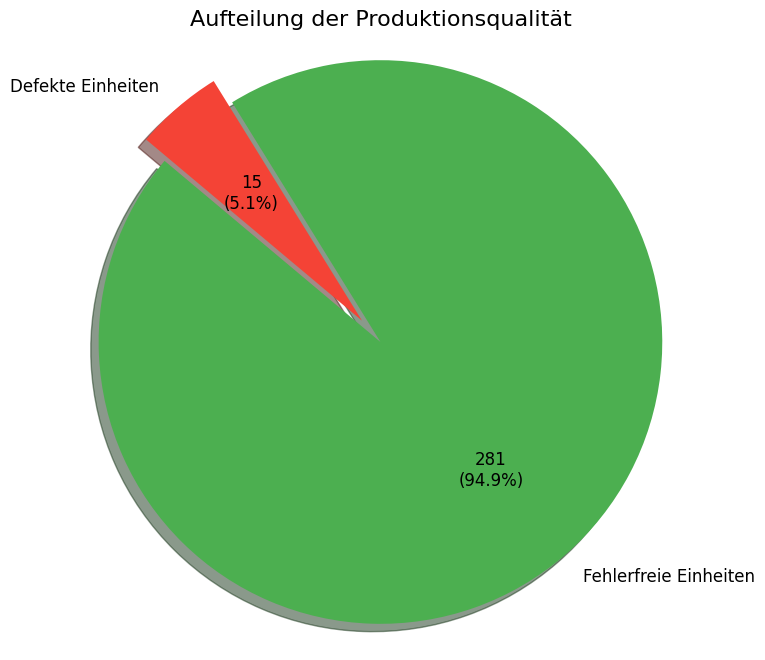

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Manuelle Definition der externen Parameter
#    Diese Werte werden typischerweise am Ende der Schicht von der Qualitätskontrolle geliefert.
# ------------------------------------------------------------------
defekte_einheiten_manuell = 15 # Beispiel: 15 Einheiten wurden als defekt klassifiziert

# ==================================================================
# === ALGORITHMUS-PARAMETER ===
# ==================================================================
FENSTERGROESSE_MESSUNGEN = 5
MAXIMALE_SCHWANKUNG_G = 20
MINIMALES_DELTA_G = 500
MAXIMALES_DELTA_G = 4000
TOLERANZ_PROZENT = 0.40

# ------------------------------------------------------------------
# 2. Verarbeitete CSV-Datei einlesen und Datenbankverbindung herstellen
# ------------------------------------------------------------------
csv_pfad = "/content/processed_data_for_sql.csv"
df = pd.read_csv(csv_pfad)
verbindung = sqlite3.connect(":memory:")
df.to_sql("messungen", verbindung, index=False, if_exists="replace")

# ==================================================================
# 3. HAUPT-SQL-ABFRAGE: Ermittelt die Gesamtanzahl der produzierten Einheiten
# Die gesamte Logik zur Einheiten-Erkennung ist in SQL gekapselt.
# ==================================================================
haupt_sql_abfrage = f"""
WITH
-- CTEs zur Identifizierung gültiger Einheiten (unsere Standardmethode)
container_zuordnung AS (
    SELECT
        timestamp, weight_g,
        SUM(CASE WHEN weight_g < -400 THEN 1 ELSE 0 END)
            OVER (ORDER BY timestamp ROWS UNBOUNDED PRECEDING) AS container_id_roh
    FROM messungen
),
container_mit_id AS (
    SELECT timestamp, weight_g, (container_id_roh + 1) AS container_id
    FROM container_zuordnung
),
gueltige_container AS (
    SELECT container_id
    FROM container_mit_id
    GROUP BY container_id
    HAVING MAX(weight_g) BETWEEN 7000 AND 12000
),
stabilitaetsfenster AS (
    SELECT c.container_id, c.timestamp, c.weight_g,
        MAX(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) -
        MIN(c.weight_g) OVER (PARTITION BY c.container_id ORDER BY c.timestamp ROWS BETWEEN CURRENT ROW AND {FENSTERGROESSE_MESSUNGEN - 1} FOLLOWING) AS gewichtsschwankung
    FROM container_mit_id c
    INNER JOIN gueltige_container g ON c.container_id = g.container_id
),
plateau_startpunkte AS (
    SELECT container_id, timestamp, weight_g
    FROM (
        SELECT *,
            CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END AS ist_stabil,
            LAG(CASE WHEN gewichtsschwankung <= {MAXIMALE_SCHWANKUNG_G} THEN 1 ELSE 0 END, 1, 0)
                OVER (PARTITION BY container_id ORDER BY timestamp) AS war_stabil
        FROM stabilitaetsfenster
    )
    WHERE ist_stabil = 1 AND war_stabil = 0
),
plateau_deltas AS (
    SELECT container_id, timestamp,
        weight_g - LAG(weight_g, 1, weight_g) OVER (PARTITION BY container_id ORDER BY timestamp) as delta_g
    FROM plateau_startpunkte
),
median_gewicht_pro_container AS (
    SELECT container_id, AVG(delta_g) as median_delta_g
    FROM (
        SELECT container_id, delta_g,
            ROW_NUMBER() OVER (PARTITION BY container_id ORDER BY delta_g) as rn,
            COUNT(*) OVER (PARTITION BY container_id) as anzahl
        FROM plateau_deltas
        WHERE delta_g BETWEEN {MINIMALES_DELTA_G} AND {MAXIMALES_DELTA_G}
    )
    WHERE rn IN (anzahl / 2, anzahl / 2 + 1)
    GROUP BY container_id
),
gueltige_stuecke AS (
    SELECT
        pd.timestamp
    FROM plateau_deltas pd
    JOIN median_gewicht_pro_container mg ON pd.container_id = mg.container_id
    WHERE pd.delta_g BETWEEN mg.median_delta_g * (1 - {TOLERANZ_PROZENT}) AND mg.median_delta_g * (1 + {TOLERANZ_PROZENT})
)
-- Finale Zählung aller gültigen Einheiten
SELECT
    COUNT(*) AS gesamt_einheiten
FROM gueltige_stuecke;
"""

# ------------------------------------------------------------------
# 4. SQL-Abfrage ausführen
# ------------------------------------------------------------------
ergebnis_df = pd.read_sql_query(haupt_sql_abfrage, verbindung)
gesamt_einheiten = 0
if not ergebnis_df.empty:
    gesamt_einheiten = ergebnis_df['gesamt_einheiten'].iloc[0]

# ------------------------------------------------------------------
# 5. Finale Berechnung der Qualitätsrate in Python
# ------------------------------------------------------------------
if gesamt_einheiten > 0:
    fehlerfreie_einheiten = gesamt_einheiten - defekte_einheiten_manuell
    qualitaetsrate_prozent = (fehlerfreie_einheiten / gesamt_einheiten) * 100
else:
    fehlerfreie_einheiten = 0
    qualitaetsrate_prozent = 0

# ------------------------------------------------------------------
# 6. Ergebnisse ausgeben
# ------------------------------------------------------------------
print("=== KPI 42: Qualitätsrate (Quality) ===")
print("-" * 50)
print(f"Gesamtanzahl produzierter Einheiten:  {int(gesamt_einheiten)} Stück")
print(f"Anzahl defekter Einheiten (manuell):  {defekte_einheiten_manuell} Stück")
print(f"Anzahl fehlerfreier Einheiten:        {int(fehlerfreie_einheiten)} Stück")
print("-" * 50)
print(f"Qualitätsrate:                        {qualitaetsrate_prozent:.1f}%")
print("-" * 50)

if qualitaetsrate_prozent >= 98:
    print("BEWERTUNG: 🟢 Exzellent - Sehr hohe Produktqualität.")
elif qualitaetsrate_prozent >= 95:
    print("BEWERTUNG: ✅ Gut - Die Qualität entspricht den Standarderwartungen.")
else:
    print("BEWERTUNG: 🟠 Verbesserungswürdig - Die Ausschussrate ist erhöht.")

# ------------------------------------------------------------------
# 7. Visualisierung: Tortendiagramm
# ------------------------------------------------------------------
if gesamt_einheiten > 0:
    labels = ['Fehlerfreie Einheiten', 'Defekte Einheiten']
    sizes = [fehlerfreie_einheiten, defekte_einheiten_manuell]
    colors = ['#4CAF50', '#F44336'] # Grün, Rot
    explode = (0, 0.1)  # Hebt den "defekt"-Teil hervor

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(sizes) / 100, p),
            shadow=True, startangle=140, textprops={'fontsize': 12})

    plt.title('Aufteilung der Produktionsqualität', fontsize=16)
    plt.axis('equal')  # Stellt sicher, dass der Kuchen rund ist.
    plt.show()

# ------------------------------------------------------------------
# 8. Datenbankverbindung schließen
# ------------------------------------------------------------------
verbindung.close()
